## Initialize

In [2]:
import numpy as np
import os 
import pandas as pd 
import random 
import shutil
import sys  
import matplotlib.pyplot as plt
import logging

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
logging.logThreads = False
logging.logProcesses = False



chapters = ['chapter01', 'chapter02', 'chapter03']
sys.path.append(os.path.abspath(f'../code/'))

for chapter in chapters:
    base_path = os.path.abspath(f'../code/{chapter}/')
    sys.path.append(base_path)


import tic_tac_toe as c1 
import ten_armed_testbed as c2
import grid_world as c3
import chapter04 as c4



# auto load the changes of referenced codes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# if new methods are created in referenced codes, run the following code.
%reload_ext autoreload

代码来自https://github.com/ShangtongZhang/reinforcement-learning-an-introduction

## chapter 1

In [23]:
state = c1.State()
print(f'state.data=\n{state.data}')
print(f'state.hash_val={state.hash_val}')
print(f'state.is_end()={state.is_end()}') 
state.print_state()

state.data=
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
state.hash_val=None
state.is_end()=False
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------


In [24]:
states = c1.get_all_states() 
print(len(states))

5478


In [25]:
# check hash_val


state = c1.State()
print(state.hash(), np.sum([np.power(3, i) for i in range(9)]) )
state = state.next_state(0, 0, 1)
print(state.hash(), np.sum([np.power(3, i) for i in range(9)]) + np.power(3, 8))

9841.0 9841
16402.0 16402


In [26]:
i = 0 
for key, value in states.items():
    i = i+1
    if i>=11: break
    state, is_end = value
    print('-'*20, i, key, is_end, '-'*20)
    state.print_state()

-------------------- 1 9841.0 False --------------------
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 2 16402.0 False --------------------
-------------
| * | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 3 14215.0 False --------------------
-------------
| * | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 4 14944.0 False --------------------
-------------
| * | x | * | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 5 14701.0 False --------------------
-------------
| * | x | * | 
-------------
| x | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 6 14782.0 False --------------------
-------------
| * | x | * | 
-------------
| x | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 7 14755.0 False ----------

In [27]:
## check player

player = c1.Player(epsilon=0)
player.set_symbol(1)
print(f'len(player.estimations)={len(player.estimations)}') 
states = c1.get_all_states() 

i = 0 
for hash_val, value in player.estimations.items():
    i = i+1
    if i>=11: break
    print('-'*20, i, hash_val, value, '-'*20)
    states[hash_val][0].print_state()

len(player.estimations)=5478
-------------------- 1 9841.0 0.5 --------------------
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 2 16402.0 0.5 --------------------
-------------
| * | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 3 14215.0 0.5 --------------------
-------------
| * | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 4 14944.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 5 14701.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| x | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 6 14782.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| x | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 7 14755.0

In [7]:
c1.train(int(1e5))

Epoch 1000, player 1 winrate: 0.19, player 2 winrate: 0.08, tie_rate: 0.73
Epoch 2000, player 1 winrate: 0.18, player 2 winrate: 0.08, tie_rate: 0.74
Epoch 3000, player 1 winrate: 0.20, player 2 winrate: 0.09, tie_rate: 0.71
Epoch 4000, player 1 winrate: 0.15, player 2 winrate: 0.07, tie_rate: 0.78
Epoch 5000, player 1 winrate: 0.13, player 2 winrate: 0.06, tie_rate: 0.81
Epoch 6000, player 1 winrate: 0.12, player 2 winrate: 0.05, tie_rate: 0.83
Epoch 7000, player 1 winrate: 0.11, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 8000, player 1 winrate: 0.10, player 2 winrate: 0.04, tie_rate: 0.86
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.04, tie_rate: 0.87
Epoch 10000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 11000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 12000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 13000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 14000, player 1

In [8]:
c1.compete(int(1e3))

load policy from _policy_first.bin
load policy from _policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [9]:
c1.play()

load policy from _policy_second.bin
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:w
-------------
| 0 | * | 0 | 
-------------
| 0 | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:x
-------------
| 0 | * | 0 | 
-------------
| 0 | x | 0 | 
-------------
| x | * | 0 | 
-------------
Input your position:e
-------------
| x | * | * | 
-------------
| 0 | x | 0 | 
-------------
| x | * | 0 | 
-------------
Input your position:d
-------------
| x | * | * | 
-------------
| x | x | * | 
-------------
| x | * | 0 | 
-------------
You lose!
Do you want to play again(y/n):n


In [10]:
c1.play(True)

load policy from _policy_second.bin
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:a
value of player 2:
-------------------------
| 0.4923 | 0.3752 | 0.4975 | 
-------------------------
|   *   | 0.5010 | 0.4941 | 
-------------------------
| 0.4996 | 0.4858 | 0.4918 | 
-------------------------
-------------
| 0 | 0 | 0 | 
-------------
| * | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:c
value of player 2:
-------------------------
| 0.5000 | 0.5000 | 0.5000 | 
-------------------------
|   *   |   x   | 0.4999 | 
-------------------------
| 0.5040 | 0.5036 |   *   | 
-------------------------
-------------
| 0 | 0 | 0 | 
-------------
| * | x | 0 | 
-------------
| x | 0 | * | 
-------------
Input your position:e
value of player 2:
-------------------------
| 0.5000 | 0.4500 |   *   | 
-------------------------
|   *   |   x   | 0.5000 | 
-------------------------
|   x   | 0.4500 | 

### always update

无论是否greedy，都进行更新价值表，会发生什么?

In [11]:
c1.train(int(4e4), always_update_value=True, policy_prefix='4e4_at')

Epoch 1000, player 1 winrate: 0.20, player 2 winrate: 0.07, tie_rate: 0.73
Epoch 2000, player 1 winrate: 0.20, player 2 winrate: 0.10, tie_rate: 0.71
Epoch 3000, player 1 winrate: 0.16, player 2 winrate: 0.08, tie_rate: 0.77
Epoch 4000, player 1 winrate: 0.15, player 2 winrate: 0.07, tie_rate: 0.78
Epoch 5000, player 1 winrate: 0.14, player 2 winrate: 0.06, tie_rate: 0.81
Epoch 6000, player 1 winrate: 0.12, player 2 winrate: 0.05, tie_rate: 0.83
Epoch 7000, player 1 winrate: 0.11, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 8000, player 1 winrate: 0.10, player 2 winrate: 0.04, tie_rate: 0.86
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.04, tie_rate: 0.87
Epoch 10000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 11000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 12000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 13000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 14000, player 1

In [12]:
c1.train(int(4e4), always_update_value=False, policy_prefix='4e4')

Epoch 1000, player 1 winrate: 0.42, player 2 winrate: 0.17, tie_rate: 0.41
Epoch 2000, player 1 winrate: 0.26, player 2 winrate: 0.10, tie_rate: 0.64
Epoch 3000, player 1 winrate: 0.19, player 2 winrate: 0.07, tie_rate: 0.74
Epoch 4000, player 1 winrate: 0.15, player 2 winrate: 0.06, tie_rate: 0.79
Epoch 5000, player 1 winrate: 0.13, player 2 winrate: 0.05, tie_rate: 0.82
Epoch 6000, player 1 winrate: 0.11, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 7000, player 1 winrate: 0.10, player 2 winrate: 0.04, tie_rate: 0.86
Epoch 8000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 10000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 11000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 12000, player 1 winrate: 0.07, player 2 winrate: 0.02, tie_rate: 0.91
Epoch 13000, player 1 winrate: 0.07, player 2 winrate: 0.02, tie_rate: 0.91
Epoch 14000, player 1

In [13]:
c1.train(int(1e5), always_update_value=False, policy_prefix='1e5')

Epoch 1000, player 1 winrate: 0.14, player 2 winrate: 0.03, tie_rate: 0.83
Epoch 2000, player 1 winrate: 0.17, player 2 winrate: 0.04, tie_rate: 0.79
Epoch 3000, player 1 winrate: 0.15, player 2 winrate: 0.04, tie_rate: 0.81
Epoch 4000, player 1 winrate: 0.14, player 2 winrate: 0.04, tie_rate: 0.82
Epoch 5000, player 1 winrate: 0.12, player 2 winrate: 0.04, tie_rate: 0.85
Epoch 6000, player 1 winrate: 0.11, player 2 winrate: 0.03, tie_rate: 0.86
Epoch 7000, player 1 winrate: 0.10, player 2 winrate: 0.03, tie_rate: 0.87
Epoch 8000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.87
Epoch 9000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 10000, player 1 winrate: 0.09, player 2 winrate: 0.03, tie_rate: 0.88
Epoch 11000, player 1 winrate: 0.08, player 2 winrate: 0.03, tie_rate: 0.89
Epoch 12000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 13000, player 1 winrate: 0.07, player 2 winrate: 0.03, tie_rate: 0.90
Epoch 14000, player 1

In [14]:
c1.compete(int(1e3), player1_policy_prefix='4e4_at', player2_policy_prefix='4e4_at') 
c1.compete(int(1e3), player1_policy_prefix='4e4', player2_policy_prefix='4e4')
c1.compete(int(1e3), player1_policy_prefix='1e5', player2_policy_prefix='1e5')

load policy from 4e4_at_policy_first.bin
load policy from 4e4_at_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 4e4_policy_first.bin
load policy from 4e4_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 1e5_policy_first.bin
load policy from 1e5_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [15]:
c1.compete(turns=int(1e3), player1_policy_prefix='4e4', player2_policy_prefix='4e4_at') 
c1.compete(turns=int(1e3), player1_policy_prefix='4e4_at', player2_policy_prefix='4e4') 

load policy from 4e4_policy_first.bin
load policy from 4e4_at_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 4e4_at_policy_first.bin
load policy from 4e4_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [16]:
c1.compete(turns=int(1e3), player1_policy_prefix='4e4', player2_policy_prefix='1e5') 
c1.compete(turns=int(1e3), player1_policy_prefix='1e5', player2_policy_prefix='4e4') 

load policy from 4e4_policy_first.bin
load policy from 1e5_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 1e5_policy_first.bin
load policy from 4e4_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


In [17]:
c1.compete(turns=1, player1_policy_prefix='1e5', player2_policy_prefix='4e4')

load policy from 1e5_policy_first.bin
load policy from 4e4_policy_second.bin
value of player 1:
-------------------------
| 0.5000 | 0.5000 | 0.5000 | 
-------------------------
| 0.4998 | 0.5000 | 0.4997 | 
-------------------------
| 0.5000 | 0.5000 | 0.5009 | 
-------------------------
value of player 2:
-------------------------
| 0.4943 | 0.4902 | 0.4939 | 
-------------------------
| 0.4921 | 0.5000 | 0.4913 | 
-------------------------
| 0.4926 | 0.4929 |   *   | 
-------------------------
value of player 1:
-------------------------
| 0.5000 | 0.4988 | 0.5000 | 
-------------------------
| 0.5000 |   x   | 0.5000 | 
-------------------------
| 0.4975 | 0.4995 |   *   | 
-------------------------
value of player 2:
-------------------------
| 0.4500 | 0.4500 | 0.5021 | 
-------------------------
| 0.4500 |   x   |   *   | 
-------------------------
| 0.4500 | 0.4500 |   *   | 
-------------------------
value of player 1:
-------------------------
| 0.1029 | 0.2391 |   x   | 
---

In [18]:
c1.compete(turns=1, player1_policy_prefix='4e4', player2_policy_prefix='4e4_at')

load policy from 4e4_policy_first.bin
load policy from 4e4_at_policy_second.bin
value of player 1:
-------------------------
| 0.5000 | 0.4998 | 0.5000 | 
-------------------------
| 0.4999 | 0.5027 | 0.5000 | 
-------------------------
| 0.5000 | 0.4996 | 0.5000 | 
-------------------------
value of player 2:
-------------------------
| 0.4729 | 0.3550 | 0.4988 | 
-------------------------
| 0.3938 |   *   | 0.3562 | 
-------------------------
| 0.4748 | 0.2725 | 0.4727 | 
-------------------------
value of player 1:
-------------------------
| 0.5000 | 0.5000 |   x   | 
-------------------------
| 0.4995 |   *   | 0.5000 | 
-------------------------
| 0.5000 | 0.4987 | 0.5084 | 
-------------------------
value of player 2:
-------------------------
| 0.5048 | 0.5000 |   x   | 
-------------------------
| 0.5000 |   *   | 0.4500 | 
-------------------------
| 0.4500 | 0.5000 |   *   | 
-------------------------
value of player 1:
-------------------------
|   x   | 0.5124 |   x   | 
-

In [19]:
c1.compete(turns=int(1e3), player1_policy_prefix='4e4_at', player2_policy_prefix='1e5') 
c1.compete(turns=int(1e3), player1_policy_prefix='1e5', player2_policy_prefix='4e4_at') 

load policy from 4e4_at_policy_first.bin
load policy from 1e5_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00
load policy from 1e5_policy_first.bin
load policy from 4e4_at_policy_second.bin
1000 turns, player 1 win 0.00, player 2 win 0.00, tie_rate: 1.00


## chapter 2

### figure 2.1

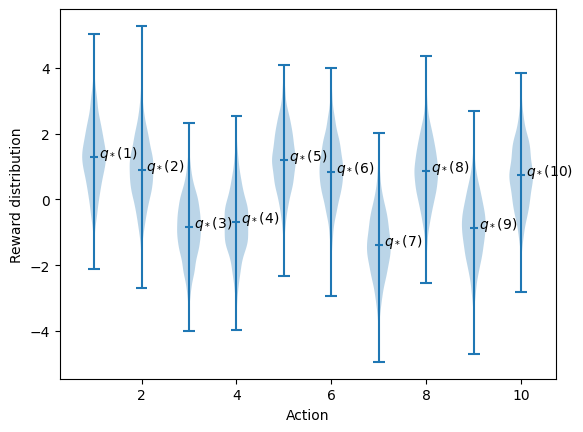

In [27]:
c2.figure_2_1(show=True) 

### figure 2.2

In [28]:
# c2.figure_2_2(show=True) 

Bandit(greedy, sample_averages)
    reward=1.02, best_action_rate=0.37
Bandit(ε-greedy=0.1, sample_averages)
    reward=1.37, best_action_rate=0.77
Bandit(ε-greedy=0.01, sample_averages)
    reward=1.25, best_action_rate=0.54


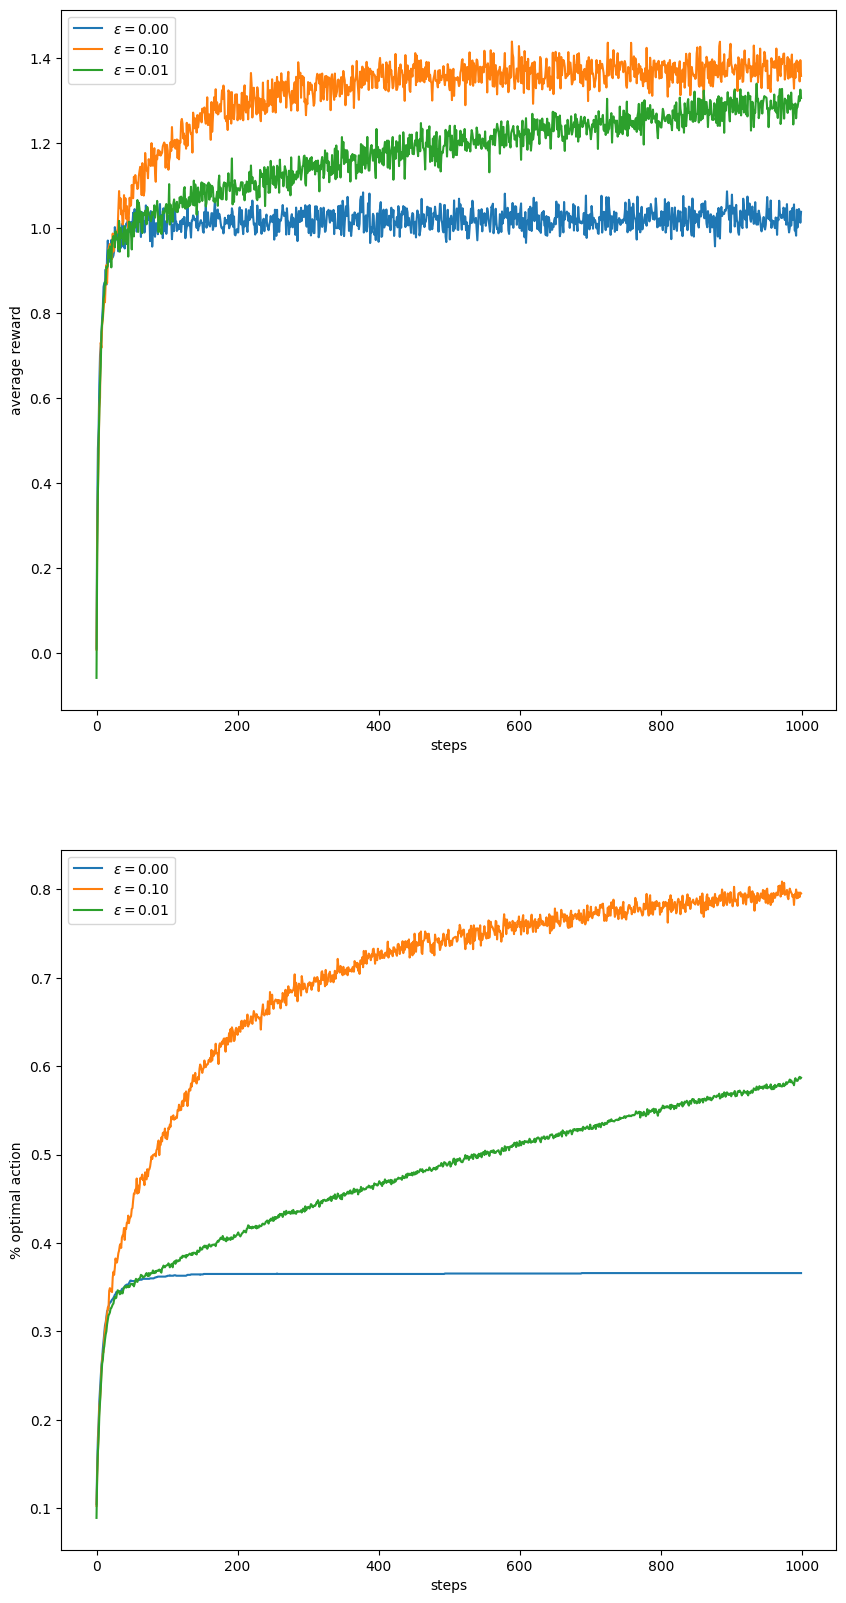

In [29]:
c2.figure_2_2(show=True, n_jobs=10) 

### exercise 2.5

In [30]:
# 练习2.5
# c2.exercise_2_5(show=True, runs=200, time=1000) 

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, sample_averages)
    reward=1.36, best_action_rate=0.72
    init_q_true=[-0.73, 0.35, -0.45, -0.68, -0.36, -1.01, -0.09, -0.55, -0.42, -1.57] 
    q_true=[-0.62, 0.32, -0.33, -0.38, -0.1, -1.25, 0.25, -0.24, -0.3, -1.47]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, step_size=0.1)
    reward=1.43, best_action_rate=0.72
    init_q_true=[0.25, 0.27, -0.7, -0.66, -0.04, 0.67, 0.97, -0.72, -0.44, 0.79] 
    q_true=[-0.24, -0.04, -0.98, -0.44, -0.05, 0.76, 0.82, -0.8, -0.73, 1.01]


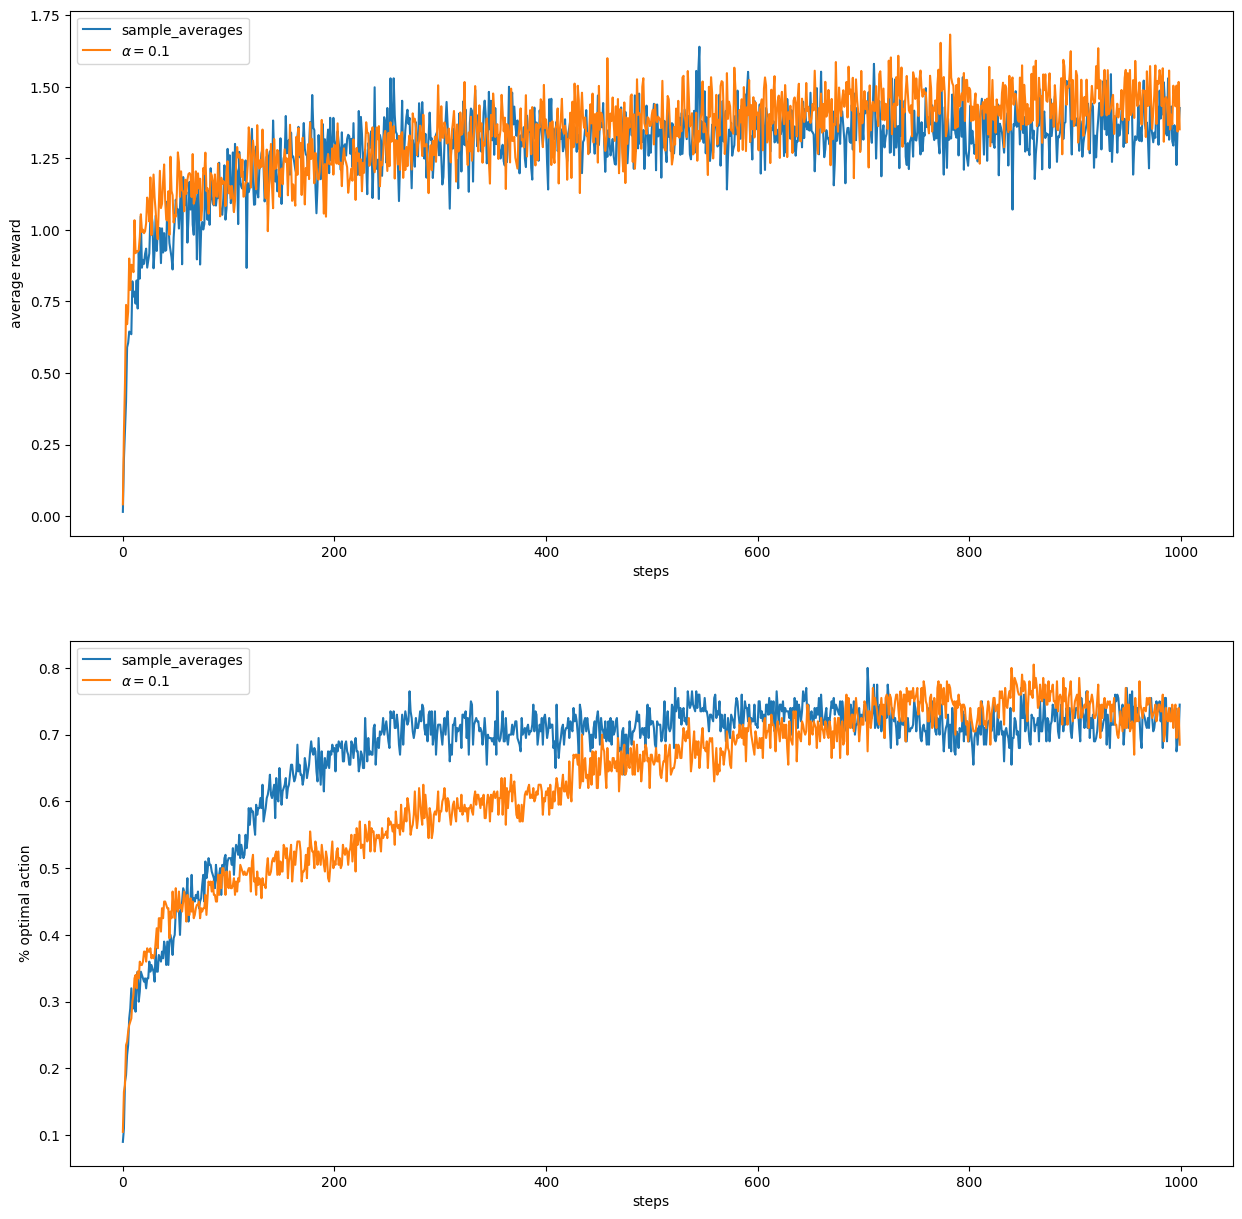

In [31]:
# 练习2.5
c2.exercise_2_5(show=True, runs=200, time=1000, n_jobs=10)

In [32]:
# c2.exercise_2_5(show=True, runs=2000, time=10000) 

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, sample_averages)
    reward=1.70, best_action_rate=0.61
    init_q_true=[0.7, -0.7, 0.55, 0.31, 0.44, 0.57, 0.06, 0.05, 0.46, -0.71] 
    q_true=[0.2, -0.21, -0.53, 1.02, -0.75, 0.49, 0.87, -0.52, 1.13, -0.75]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.1, step_size=0.1)
    reward=1.82, best_action_rate=0.80
    init_q_true=[1.01, -1.23, -0.96, 0.02, -0.14, 0.54, 0.47, -0.63, -0.53, -0.23] 
    q_true=[1.1, -2.47, -1.2, 0.93, 1.16, -0.1, 0.4, 0.59, 2.44, -0.11]


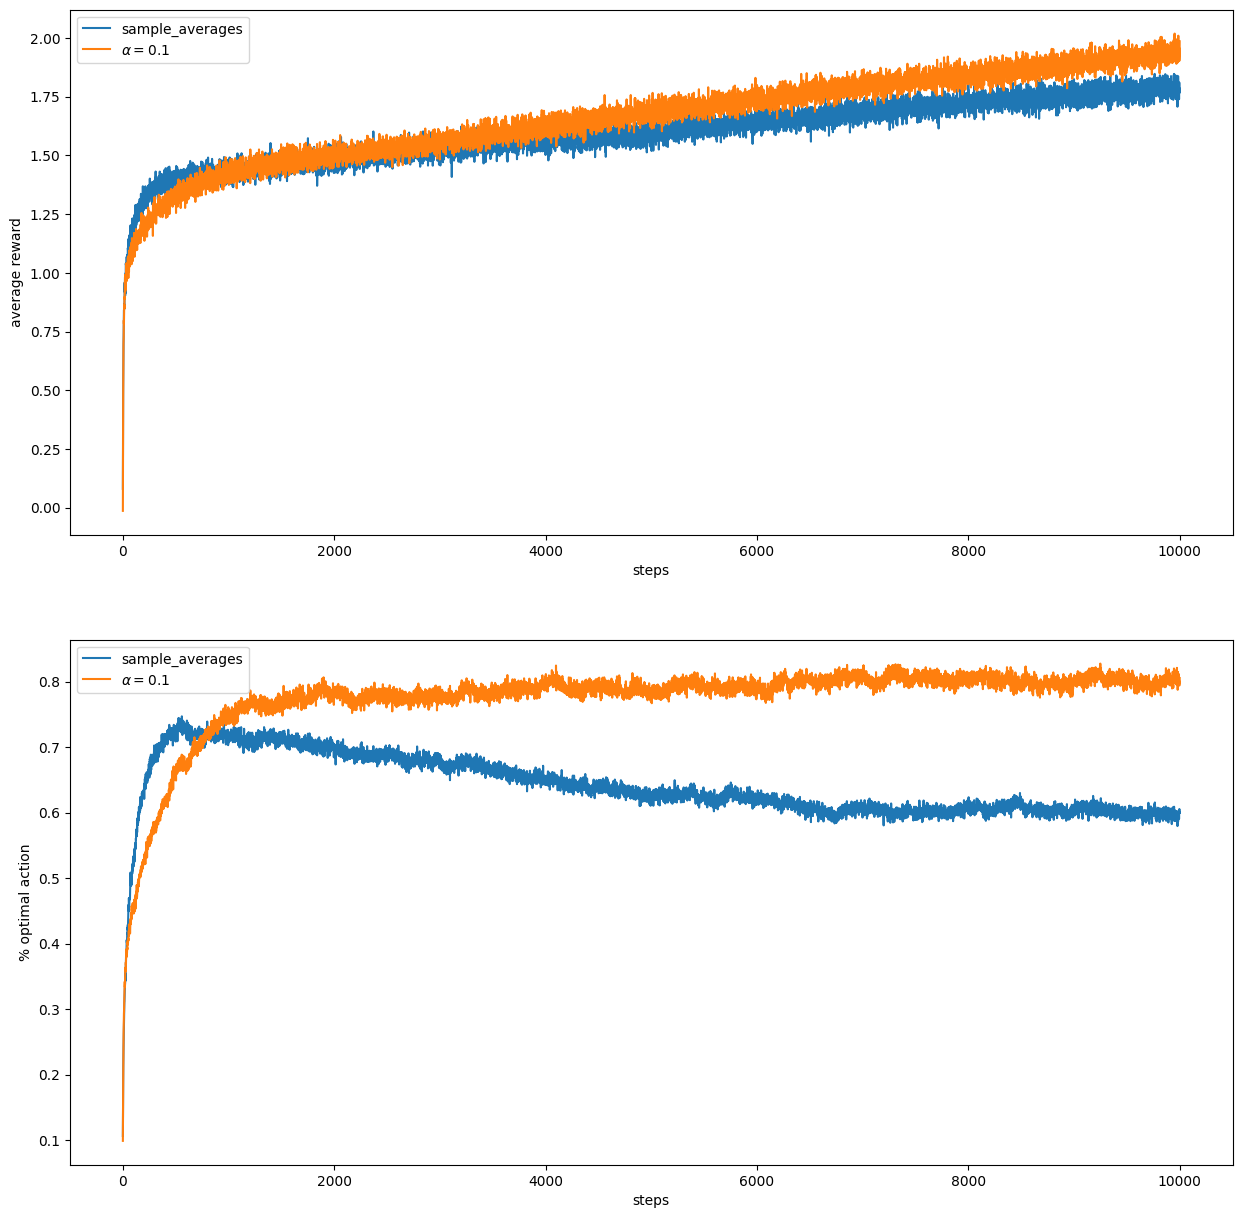

In [33]:
c2.exercise_2_5(show=True, runs=2000, time=10000, n_jobs=10) 

### figure 2.3

In [34]:
# c2.figure_2_3(show=True) 

Bandit(greedy, optimistic_initial=5, step_size=0.1)
    reward=1.47, best_action_rate=0.84
Bandit(ε-greedy=0.1, step_size=0.1)
    reward=1.33, best_action_rate=0.72


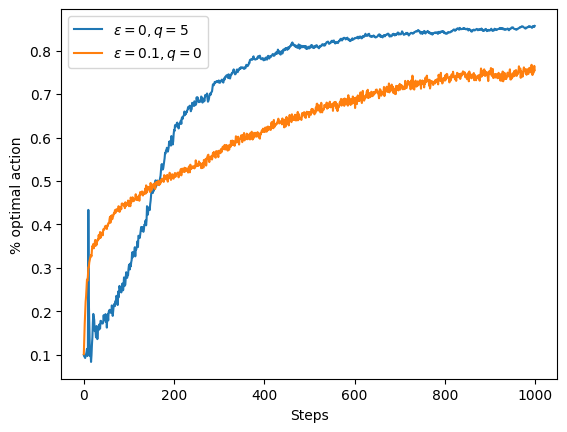

In [35]:
c2.figure_2_3(show=True, n_jobs=10) 

### figure 2.4

In [36]:
# c2.figure_2_4(show=True) 

Bandit(greedy, UCB_param=2, sample_averages)
    reward=1.46, best_action_rate=0.83
Bandit(ε-greedy=0.1, sample_averages)
    reward=1.36, best_action_rate=0.78


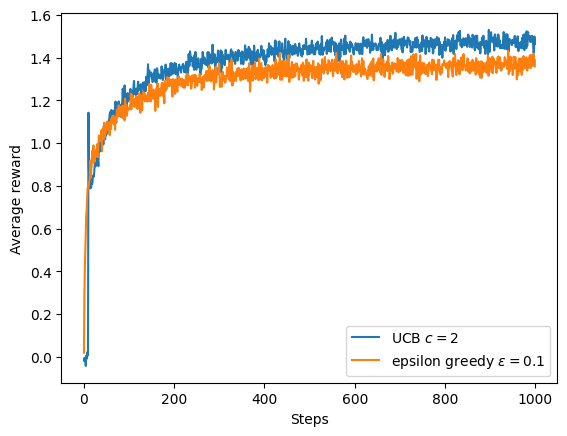

In [37]:
c2.figure_2_4(show=True, n_jobs=15) 

### figure 2.5

In [38]:
# c2.figure_2_5(show=True) 

Bandit(true_reward=4, greedy, gradient_baseline, step_size=0.1)
    reward=5.49, best_action_rate=0.84
Bandit(true_reward=4, greedy, gradient, step_size=0.1)
    reward=5.16, best_action_rate=0.46
Bandit(true_reward=4, greedy, gradient_baseline, step_size=0.4)
    reward=5.46, best_action_rate=0.71
Bandit(true_reward=4, greedy, gradient, step_size=0.4)
    reward=4.80, best_action_rate=0.28


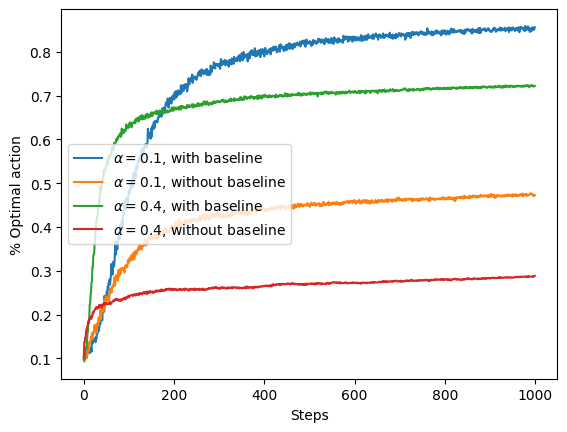

In [39]:
c2.figure_2_5(show=True, n_jobs=10) 

In [40]:
# c2.figure_2_5(show=True, true_reward=0) 

Bandit(greedy, gradient_baseline, step_size=0.1)
    reward=1.48, best_action_rate=0.84
Bandit(greedy, gradient, step_size=0.1)
    reward=1.49, best_action_rate=0.83
Bandit(greedy, gradient_baseline, step_size=0.4)
    reward=1.45, best_action_rate=0.72
Bandit(greedy, gradient, step_size=0.4)
    reward=1.42, best_action_rate=0.69


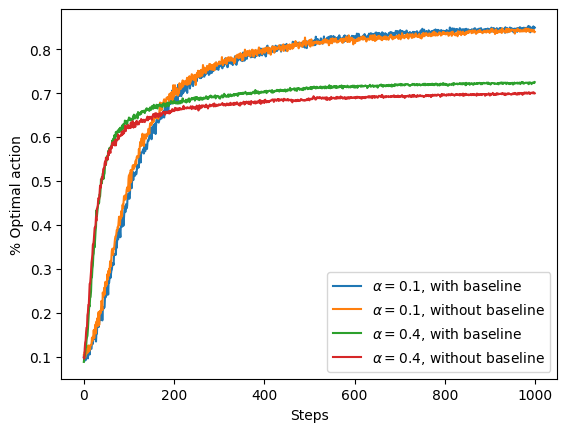

In [41]:
c2.figure_2_5(show=True, true_reward=0, n_jobs=10) 

### figure 2.6

In [42]:
# c2.figure_2_6(show=True) 

Bandit(ε-greedy=0.0078125, sample_averages)
    reward=1.24, best_action_rate=0.52
Bandit(ε-greedy=0.015625, sample_averages)
    reward=1.32, best_action_rate=0.62
Bandit(ε-greedy=0.03125, sample_averages)
    reward=1.40, best_action_rate=0.73
Bandit(ε-greedy=0.0625, sample_averages)
    reward=1.39, best_action_rate=0.77
Bandit(ε-greedy=0.125, sample_averages)
    reward=1.33, best_action_rate=0.78
Bandit(ε-greedy=0.25, sample_averages)
    reward=1.14, best_action_rate=0.70
Bandit(ε-greedy=0.0078125, step_size=0.1)
    reward=1.28, best_action_rate=0.55
Bandit(ε-greedy=0.015625, step_size=0.1)
    reward=1.30, best_action_rate=0.57
Bandit(ε-greedy=0.03125, step_size=0.1)
    reward=1.34, best_action_rate=0.64
Bandit(ε-greedy=0.0625, step_size=0.1)
    reward=1.34, best_action_rate=0.68
Bandit(ε-greedy=0.125, step_size=0.1)
    reward=1.30, best_action_rate=0.72
Bandit(ε-greedy=0.25, step_size=0.1)
    reward=1.14, best_action_rate=0.66
Bandit(greedy, gradient_baseline, step_size=0.

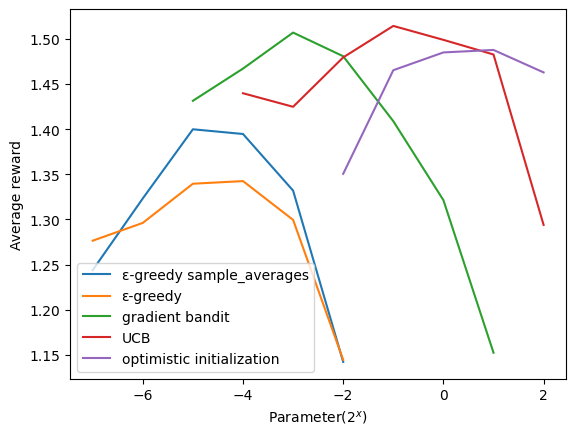

In [43]:
c2.figure_2_6(show=True, n_jobs=10) 

### exercise 2.11

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0078125, sample_averages)
    reward=1.24, best_action_rate=0.45
    init_q_true=[-0.02, -0.6, -0.06, 0.9, 0.83, 0.17, 1.7, -0.33, -0.51, -0.18] 
    q_true=[-0.22, -0.41, -0.11, 1.43, 0.78, 0.43, 2.26, -0.16, -0.95, -0.22]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.015625, sample_averages)
    reward=1.37, best_action_rate=0.57
    init_q_true=[1.22, -1.59, 2.09, 0.12, 0.36, -1.09, 0.21, -1.31, -0.1, -0.65] 
    q_true=[1.29, -1.66, 2.32, 0.02, 0.33, -1.56, 0.06, -2.14, 0.09, -1.05]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.03125, sample_averages)
    reward=1.38, best_action_rate=0.60
    init_q_true=[1.67, 0.73, -1.56, 0.23, -0.69, 0.11, 1.07, 0.58, 1.84, 0.86] 
    q_true=[1.77, 0.73, -1.76, 0.66, -0.99, 0.33, 0.52, 0.51, 2.15, 0.66]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0625, sample_averages)
    reward=1.51, best_action_rate=0.74
    init_q_true=[-1.39, -1.37, -0.36, 1

Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=0.5, sample_averages)
    reward=1.61, best_action_rate=0.80
    init_q_true=[0.01, -0.36, -1.71, 1.02, -1.21, 0.47, 0.07, 1.76, -0.32, -0.54] 
    q_true=[-0.09, 0.06, -1.16, 1.06, -1.2, 0.22, 0.2, 1.69, 0.26, -0.5]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=1.0, sample_averages)
    reward=1.58, best_action_rate=0.87
    init_q_true=[1.51, -0.57, -0.28, -1.17, 1.93, -1.28, -1.7, 0.78, 1.11, 0.97] 
    q_true=[1.29, -1.19, -0.09, -0.74, 1.38, -1.37, -2.21, 0.39, 1.43, 1.07]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=2.0, sample_averages)
    reward=1.66, best_action_rate=0.86
    init_q_true=[-0.49, -0.16, -0.73, 0.17, -0.35, 0.99, 0.84, 0.54, 0.87, 2.01] 
    q_true=[-0.67, -0.11, -1.08, 0.64, -0.17, 1.39, 0.53, 1.4, 1.28, 2.12]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=4.0, sample_averages)
    reward=1.34, best_action_rate=0.68
    init_q_true=[-0.

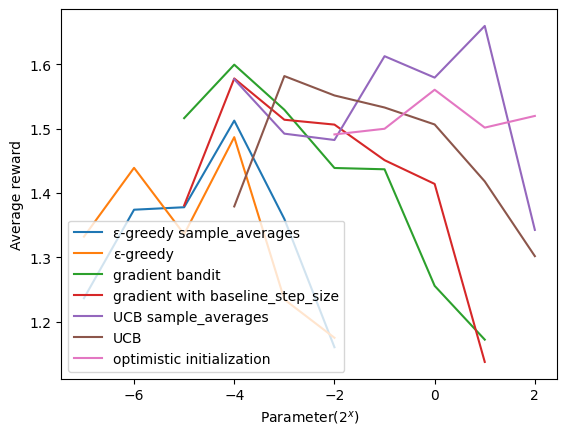

In [44]:
c2.exercise_2_11(show=True, runs=100, time=1000, n_jobs=10) 

In [45]:
# c2.exercise_2_11(show=True, runs=100, time=1000) 

Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0078125, sample_averages)
    reward=2.10, best_action_rate=0.59
    init_q_true=[0.2, -1.01, -1.08, 0.37, 0.32, 0.4, -0.84, -0.06, 1.17, -0.67] 
    q_true=[-0.26, 0.72, -0.59, 0.76, 0.35, 0.21, -1.36, -0.16, 0.83, -2.91]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.015625, sample_averages)
    reward=2.06, best_action_rate=0.58
    init_q_true=[-0.45, 0.76, -1.03, 1.25, -0.87, -0.34, 0.1, 0.15, 0.59, -1.39] 
    q_true=[0.91, -0.07, -1.65, 2.76, 0.46, -0.76, -0.42, -0.81, -1.79, -1.96]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.03125, sample_averages)
    reward=2.05, best_action_rate=0.59
    init_q_true=[0.32, -0.52, -1.57, 2.82, 0.5, 1.59, -0.82, -0.17, -0.66, -1.13] 
    q_true=[1.02, 0.55, 0.65, 4.52, 1.87, 1.53, -3.96, 0.17, -0.25, -2.18]
Bandit(random_walk_mean=0, random_walk_sd=0.01, ε-greedy=0.0625, sample_averages)
    reward=2.01, best_action_rate=0.58
    init_q_true=[-1.09, 1.53, 0.0

Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=0.5, sample_averages)
    reward=2.01, best_action_rate=0.54
    init_q_true=[0.55, 0.14, -0.72, -1.27, -1.5, -1.82, 1.16, -0.4, 0.35, -0.08] 
    q_true=[-0.56, 1.35, 0.73, -2.05, -2.74, -3.0, -1.6, -0.52, 1.22, 2.88]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=1.0, sample_averages)
    reward=2.14, best_action_rate=0.61
    init_q_true=[-0.23, -2.06, -0.54, 0.25, 0.4, -0.96, 1.8, -0.08, -0.87, 0.65] 
    q_true=[-1.37, -0.26, -1.37, 1.88, 0.51, 1.61, 0.43, -1.0, -1.08, -0.59]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=2.0, sample_averages)
    reward=2.20, best_action_rate=0.67
    init_q_true=[-0.69, -0.21, 1.1, 0.94, 1.4, -0.23, 0.65, -0.16, 2.52, 0.34] 
    q_true=[-2.6, 0.99, 2.78, 2.54, -0.81, 1.02, 2.47, -0.96, 0.39, -0.31]
Bandit(random_walk_mean=0, random_walk_sd=0.01, greedy, UCB_param=4.0, sample_averages)
    reward=2.22, best_action_rate=0.70
    init_q_true=[-1.

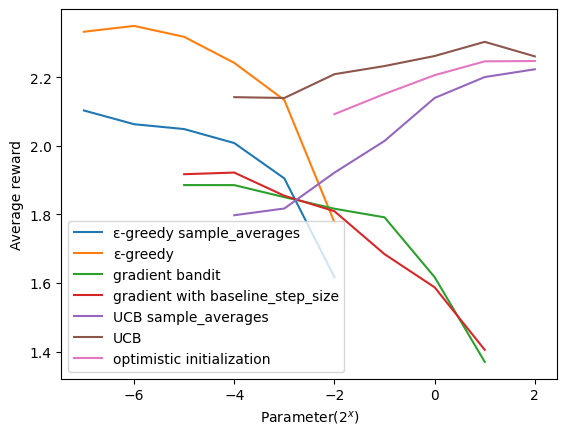

In [46]:
c2.exercise_2_11(show=True, runs=2000, time=20000, n_jobs=18)

In [47]:
#c2.exercise_2_11(show=True, runs=2000, time=20000) 

## chapter 3

### figure_3_2

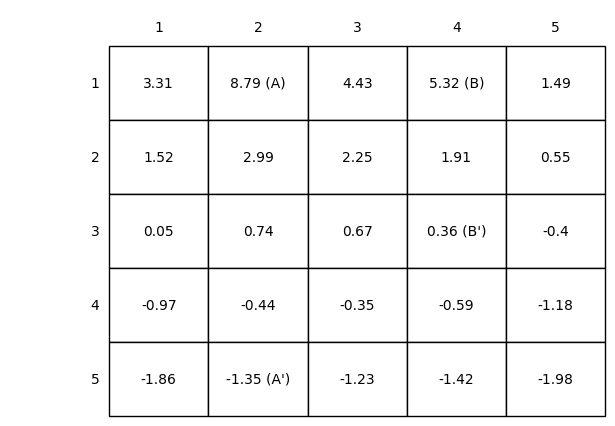

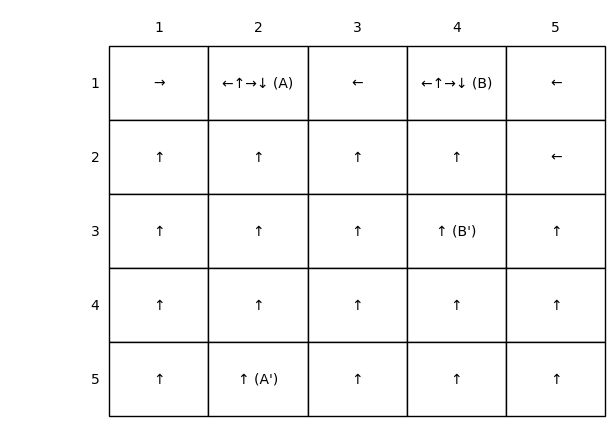

after 77 iteration the status value function converges


In [15]:
c3.figure_3_2(True)

### figure_3_2_linear_system

这个线性方程组 $Ax = b$ 的设定非常巧妙。

- 对角线为 $-1$
- 其他节点 $(i, j)$ 表示 $\pi(a|s)  \gamma$

其中的任一方程构建过程如下。第一个根据贝尔曼方程可得：

$$
\begin{split}\begin{aligned}
v_\pi(s) &= \sum_a \pi(a|s)  [r+\gamma v_\pi(s^a)] \\
\sum_a \pi(a|s)  \gamma v_\pi(s^a) - v_\pi(s) &= -\sum_a \pi(a|s) r \\
\begin{bmatrix} \pi(south|s)\gamma & \pi(north|s)\gamma & \pi(east|s)\gamma & \pi(west|s)\gamma & -1 \end{bmatrix} \begin{bmatrix} v_\pi(s^{north}) \\ v_\pi(s^{south}) \\ v_\pi(s^{east}) \\ v_\pi(s^{west}) \\ v_\pi(s) \end{bmatrix} &= -\sum_a \pi(a|s) r
\end{aligned}\end{split}
$$

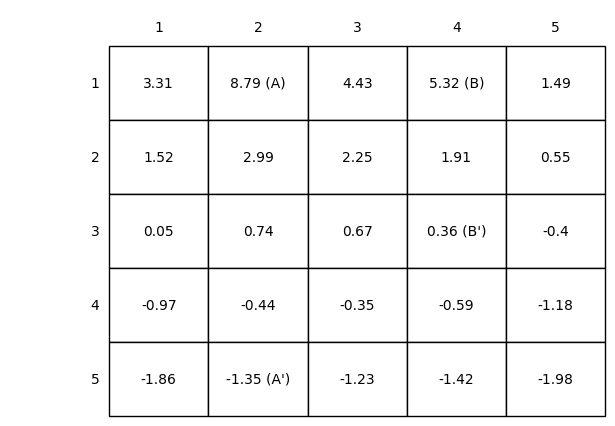

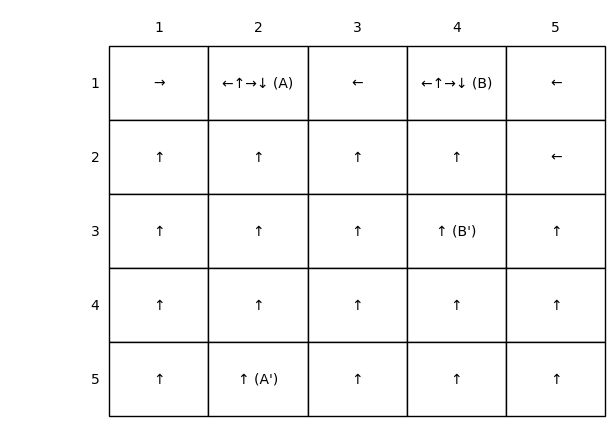

In [14]:
c3.figure_3_2_linear_system(True)

### figure_3_5

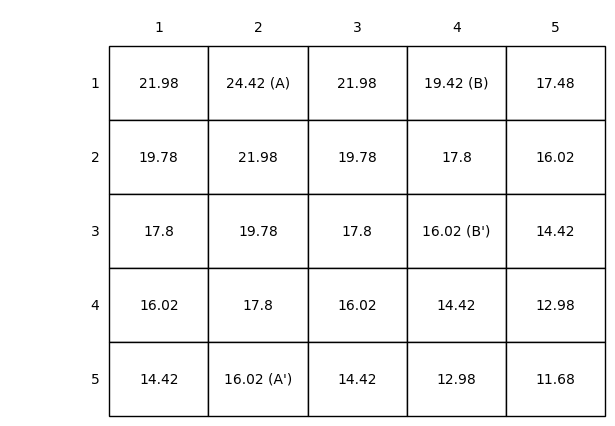

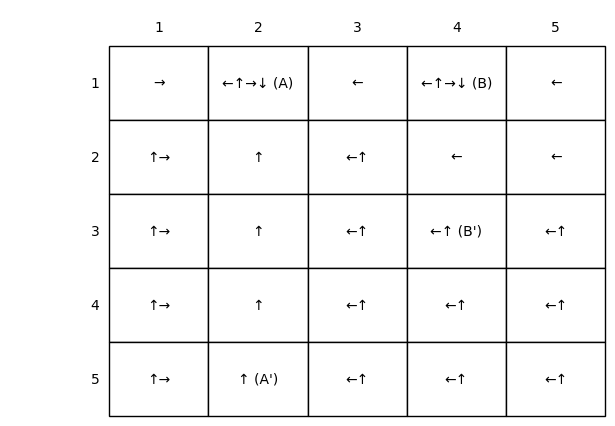

after 124 iteration the status value function converges


In [16]:
c3.figure_3_5(True)

## chapt 4

### figure_4_1

看起来 In-place 迭代次数要少，但是由于 Synchronous 可以并发处理，所以可能还是Synchronous更快。

In-place: 113 iterations


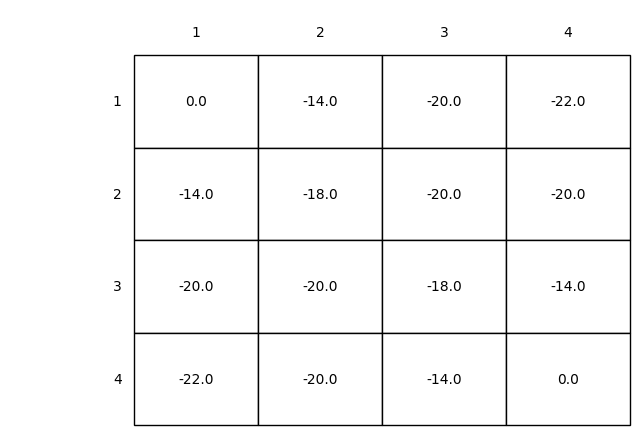

Synchronous: 172 iterations


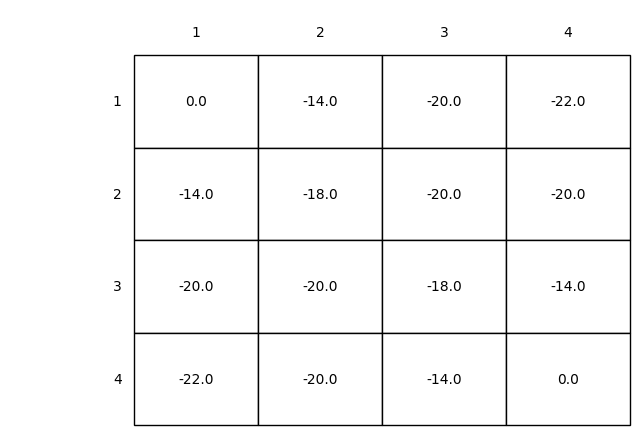

In [14]:
# 价值评估  
#                 value = 0
#                 for action in ACTIONS:
#                     (next_i, next_j), reward = step([i, j], action)
#                     value += ACTION_PROB * (reward + discount * state_values[next_i, next_j])
#                 new_state_values[i, j] = value
c4.grid_world.figure_4_1(True)

In-place: 3 iterations


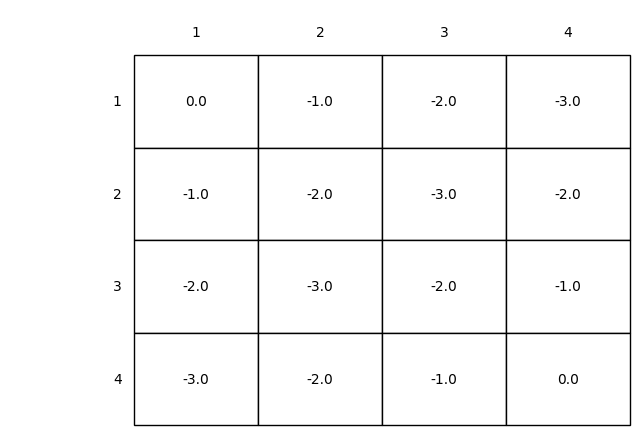

Synchronous: 3 iterations


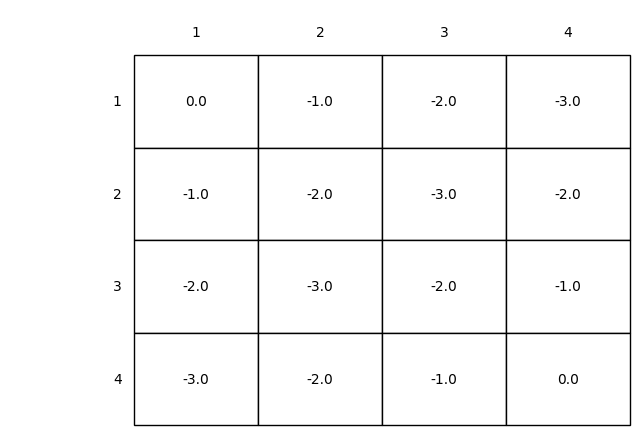

In [16]:
# 价值迭代  
#                 values = []
#                 for action in ACTIONS:
#                     (next_i, next_j), reward = step([i, j], action)
#                     values.append(reward + discount * state_values[next_i, next_j])
#                 new_state_values[i, j] = np.max(values)
c4.grid_world.figure_4_11(True)

### figure_4_2

**例4.2: 杰克汽车出租** 杰克为一个全国性的汽车租赁公司管理两个网点。每天，一些顾客会到网点租车。每租一辆车，杰克可以从租赁公司得到 10 美元报酬。但如果租车时，该网点没车，这次生意就泡汤了。汽车返回来后，还可以再次出租。为了保证网点有车，杰克可以在晚上把车在两个网点转移，每次转移的成本是 2 美元。为了简化问题，我们进行如下假定：

- 每个网点汽车需要的数量和返回的数量是泊松随机变量（Poisson random variables），也就是数量是 n 的概率为 $\frac{\lambda^n}{n!}e^{-\lambda}$。两个网点的租车需求 $\lambda $ 分别是 $3$ 和 $4$，而返回的数量的 $\lambda$ 分别是 $3$ 和 $2$。
- 每个网点的车辆不会超过20辆（任何多余的车都将会被送回租赁公司，从问题中消失）
- 一个晚上，最多五辆车可以进行转移。 
- 衰减因子 $\gamma=0.9$。

这个问题可以看做连续有限MDP，时间步骤是天数， 状态是每天结束时网点剩余车子的数量，动作是每晚车子在两个网点之间转移的净数量。 图4.2展示的是：从不转移任何车子的策略开始，到通过策略迭代找到的一系列策略。

以下程序中:


car_rental 对于[网上的版本](https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter04/car_rental.py)，做了一点修改。 去掉了 POISSON_UPPER_BOUND  的限制，这样更加符合实际的情况。但最优策略相同。

#### in_place
- in_place=True: 每一次价值函数被更新后，下一次更新可以用到最新的价值函数。
- in_place=False: 策略评估的一次迭代中，每次更新用到的价值函数是上一次迭代的值。
  ~~~
            old_value = value.copy()            
            for i in range(MAX_CARS + 1):
                for j in range(MAX_CARS + 1):
                    if in_place:
                        new_state_value = expected_return([i, j], policy[i, j], value, constant_returned_cars)
                    else:
                        new_state_value = expected_return([i, j], policy[i, j], old_value, constant_returned_cars)
                    value[i, j] = new_state_value
  ~~~

2023-03-10 00:05:04,500: INFO: after 10 iteration: max value change 20.18262117404106
2023-03-10 00:05:06,428: INFO: after 20 iteration: max value change 4.625852411120604
2023-03-10 00:05:08,317: INFO: after 30 iteration: max value change 0.9933278917516191
2023-03-10 00:05:10,198: INFO: after 40 iteration: max value change 0.20739982187330952
2023-03-10 00:05:12,075: INFO: after 50 iteration: max value change 0.04265863011210058
2023-03-10 00:05:13,997: INFO: after 60 iteration: max value change 0.008700678541003981
2023-03-10 00:05:15,903: INFO: after 70 iteration: max value change 0.0017660790119293779
2023-03-10 00:05:17,813: INFO: after 80 iteration: max value change 0.00035748603448837457
2023-03-10 00:05:21,182: INFO: policy stable False
2023-03-10 00:05:23,398: INFO: after 10 iteration: max value change 0.37818953552601897
2023-03-10 00:05:25,307: INFO: after 20 iteration: max value change 0.07062549257898354
2023-03-10 00:05:27,198: INFO: after 30 iteration: max value change 

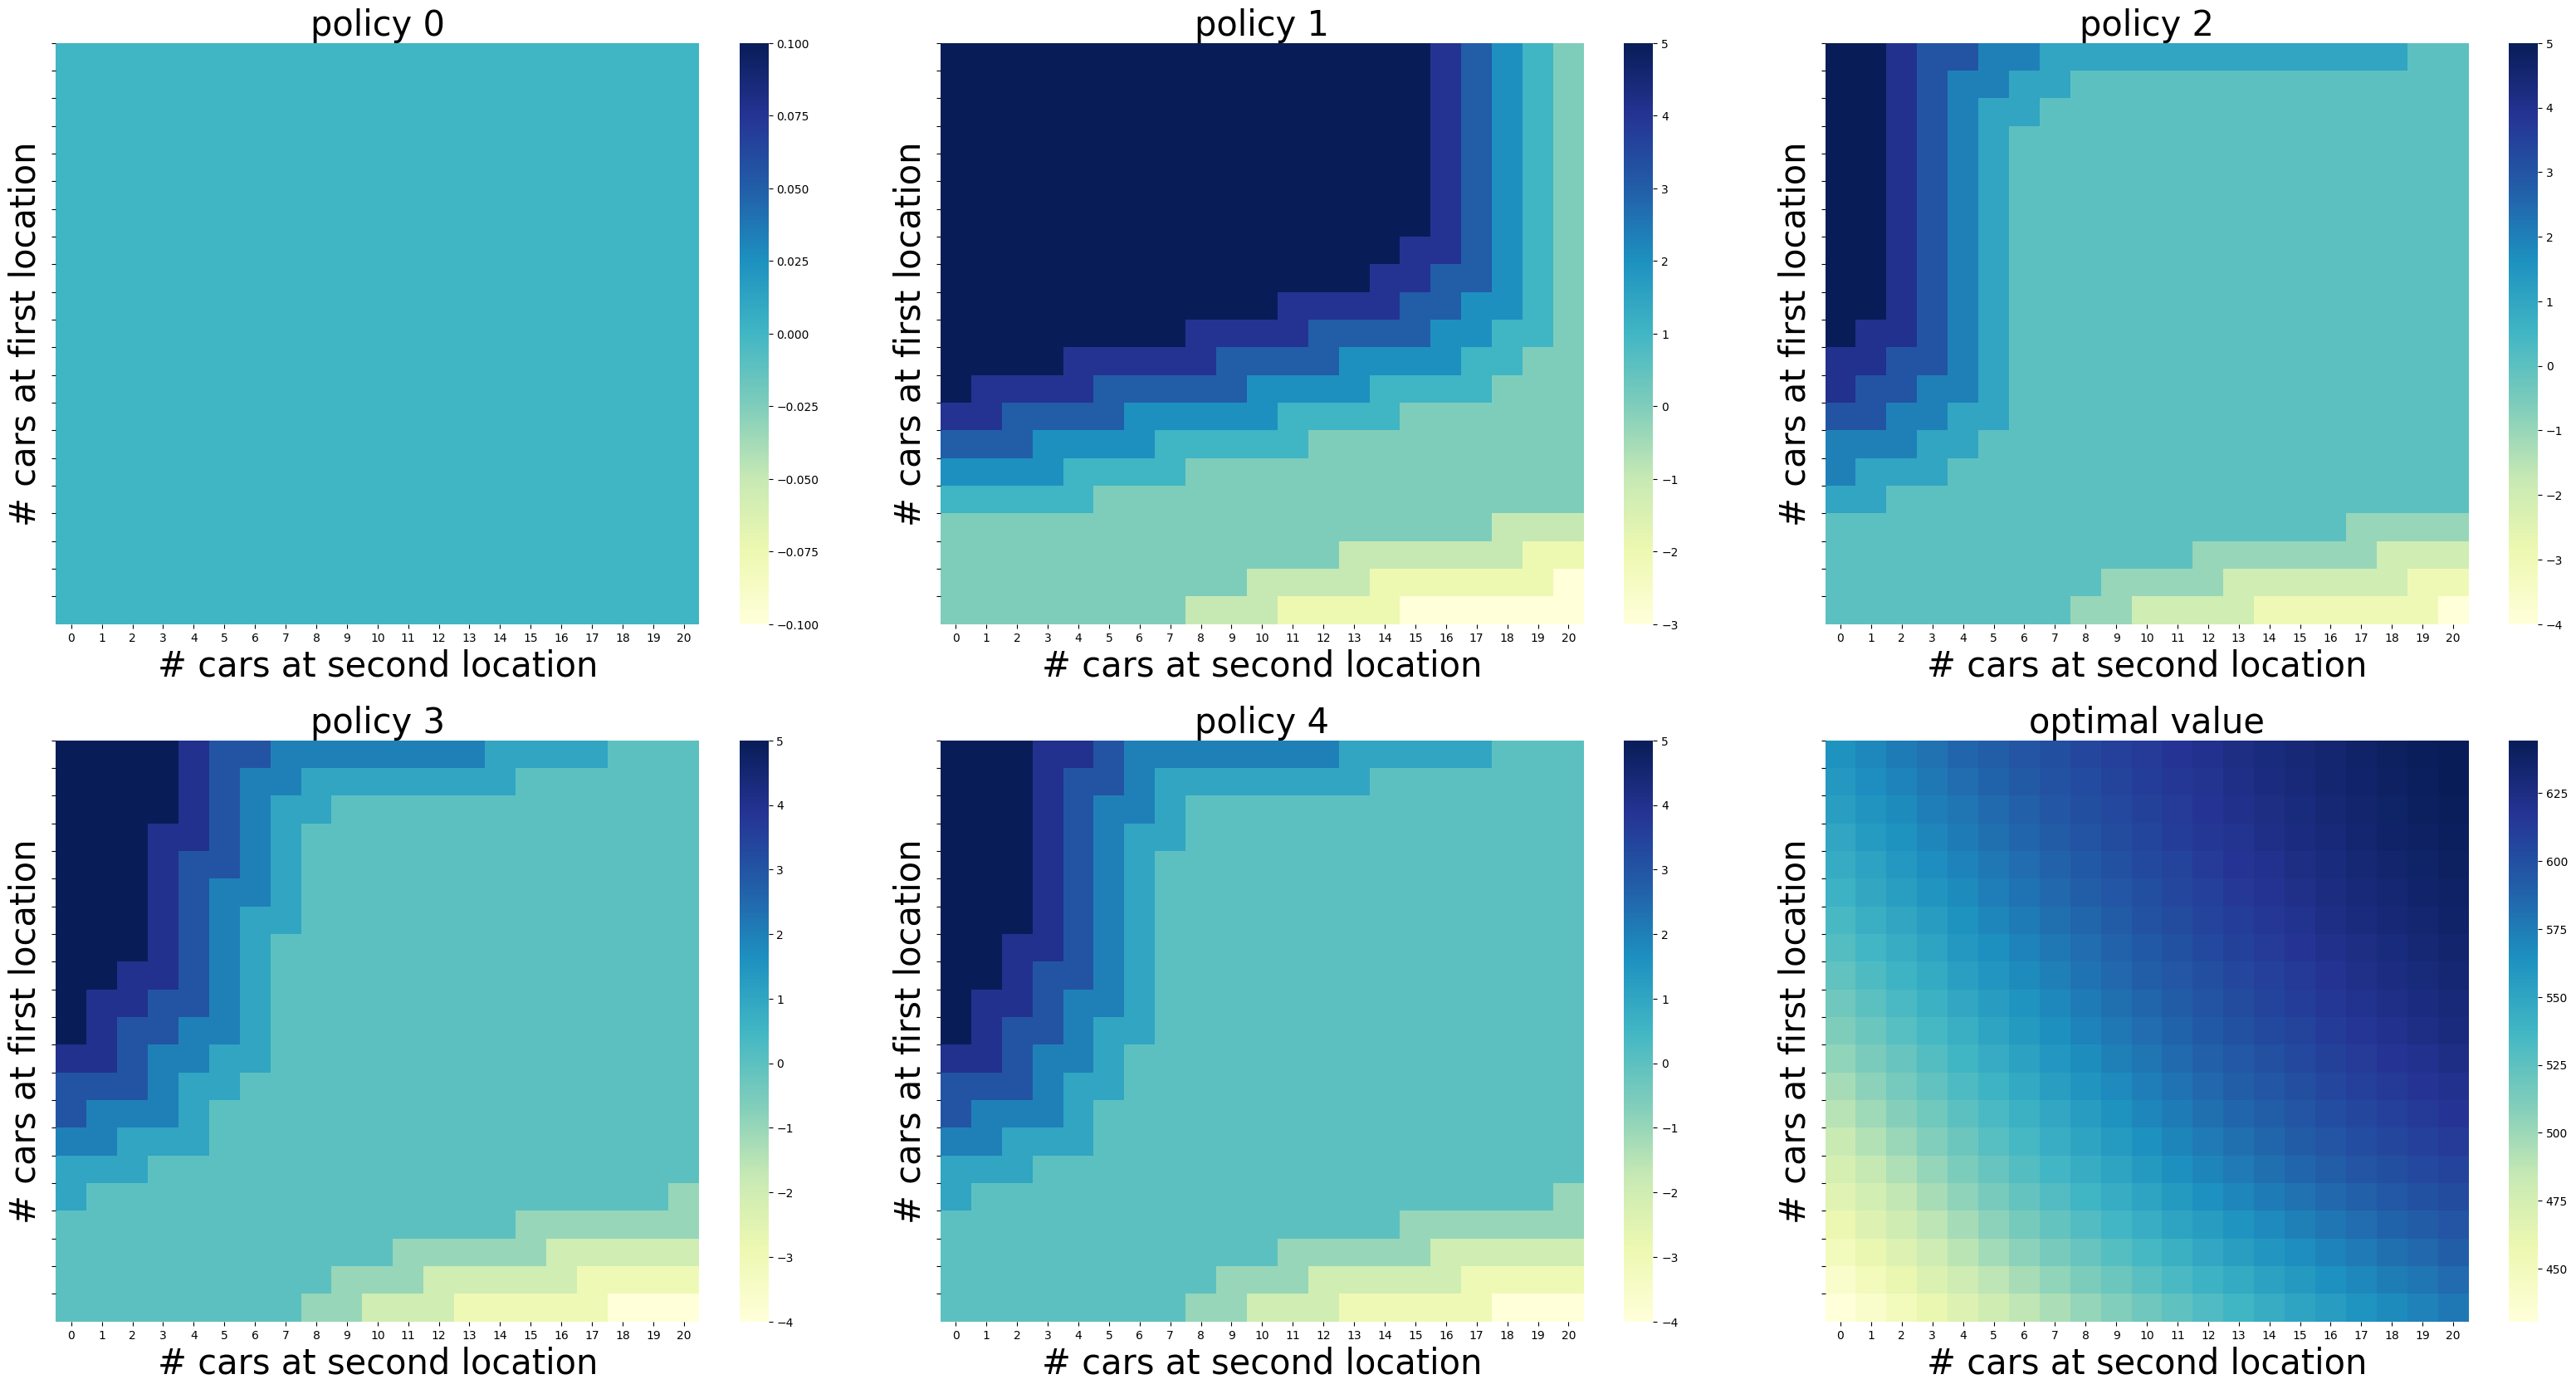

In [51]:
value, policy = c4.car_rental.figure_4_2(in_place=True, constant_returned_cars=True, show=True) 

In [56]:
print(np.round(value[0:10, 0:10]))
print(policy)

[[431. 440. 450. 460. 469. 478. 487. 495. 503. 510.]
 [440. 450. 460. 470. 479. 488. 497. 505. 512. 519.]
 [450. 460. 470. 479. 489. 497. 506. 514. 521. 529.]
 [459. 468. 478. 488. 497. 506. 515. 523. 530. 537.]
 [466. 476. 486. 496. 505. 514. 522. 530. 538. 545.]
 [474. 484. 494. 503. 512. 521. 529. 537. 544. 551.]
 [482. 492. 501. 510. 519. 528. 536. 543. 551. 557.]
 [490. 499. 508. 517. 526. 534. 542. 549. 556. 563.]
 [497. 506. 515. 524. 532. 540. 547. 555. 561. 568.]
 [504. 513. 522. 530. 538. 545. 553. 560. 566. 573.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

2023-03-10 01:09:33,200: INFO: after 10 iteration: max value change 22.172670293494832
2023-03-10 01:09:35,106: INFO: after 20 iteration: max value change 6.737979309562547
2023-03-10 01:09:36,966: INFO: after 30 iteration: max value change 2.3379688145662385
2023-03-10 01:09:38,833: INFO: after 40 iteration: max value change 0.8129558350602792
2023-03-10 01:09:40,692: INFO: after 50 iteration: max value change 0.28292056571115154
2023-03-10 01:09:42,545: INFO: after 60 iteration: max value change 0.0985215891066673
2023-03-10 01:09:44,428: INFO: after 70 iteration: max value change 0.03432281336085907
2023-03-10 01:09:46,314: INFO: after 80 iteration: max value change 0.011960752713093825
2023-03-10 01:09:48,173: INFO: after 90 iteration: max value change 0.004168858822822585
2023-03-10 01:09:50,059: INFO: after 100 iteration: max value change 0.0014532197855032791
2023-03-10 01:09:51,935: INFO: after 110 iteration: max value change 0.0005066200791361553
2023-03-10 01:09:53,840: INFO:

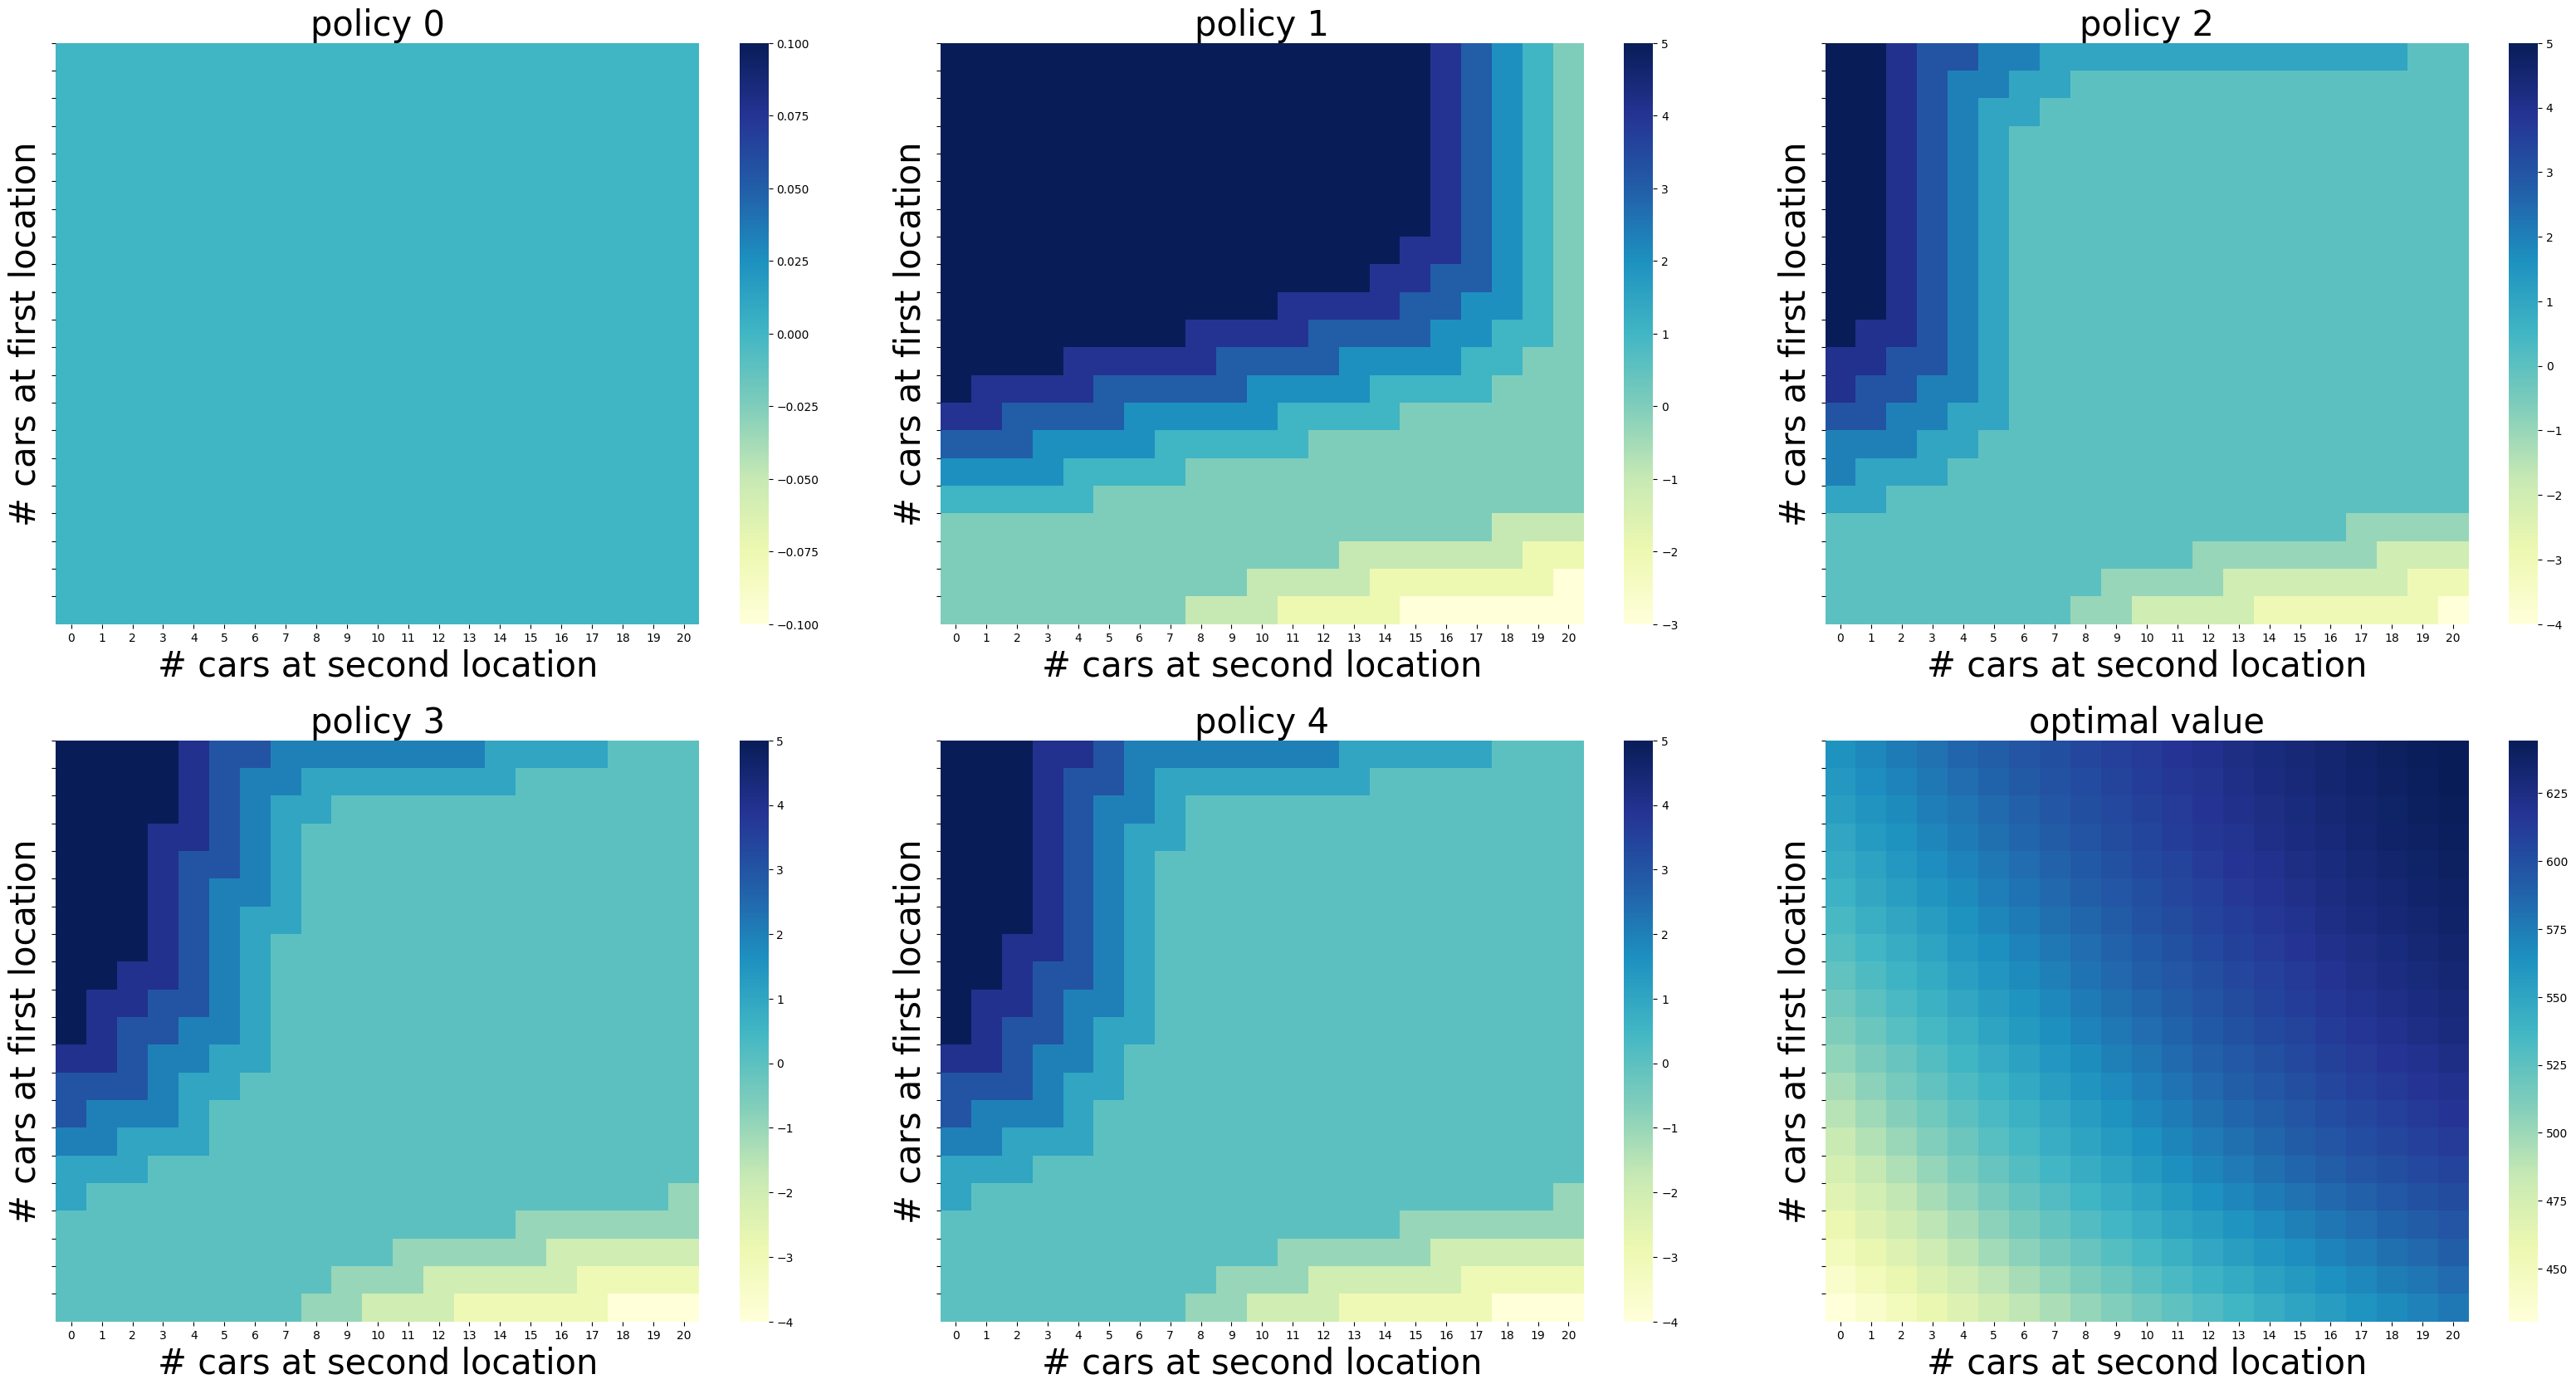

In [61]:
# inplace=False 比 inplace=True 运行时间要多30%
value, policy = c4.car_rental.figure_4_2(in_place=False, constant_returned_cars=True, show=True) 

In [62]:
print(np.round(value[0:10, 0:10]))
print(policy)

[[431. 440. 450. 460. 469. 478. 487. 495. 503. 510.]
 [440. 450. 460. 470. 479. 488. 497. 505. 512. 519.]
 [450. 460. 470. 479. 489. 497. 506. 514. 521. 529.]
 [459. 468. 478. 488. 497. 506. 515. 523. 530. 537.]
 [466. 476. 486. 496. 505. 514. 522. 530. 538. 545.]
 [474. 484. 494. 503. 512. 521. 529. 537. 544. 551.]
 [482. 492. 501. 510. 519. 528. 536. 543. 551. 557.]
 [490. 499. 508. 517. 526. 534. 542. 549. 556. 563.]
 [497. 506. 515. 524. 532. 540. 547. 555. 561. 568.]
 [504. 513. 522. 530. 538. 545. 553. 560. 566. 573.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

#### parallel

由于是并行运行，只能是in_place=False。
~~~
    value = Parallel(n_jobs=n_jobs)(delayed(expected_return)([i, j], policy[i, j], old_value, constant_returned_cars) 
                                    for i in range(MAX_CARS + 1) 
                                    for j in range(MAX_CARS + 1)) 
    value = np.array(value)
    value = value.reshape(MAX_CARS + 1, MAX_CARS + 1)
~~~

2023-03-10 01:11:51,321: INFO: after 10 iteration: max value change 22.172670293494832
2023-03-10 01:11:52,770: INFO: after 20 iteration: max value change 6.737979309562547
2023-03-10 01:11:54,147: INFO: after 30 iteration: max value change 2.3379688145662385
2023-03-10 01:11:55,603: INFO: after 40 iteration: max value change 0.8129558350602792
2023-03-10 01:11:57,091: INFO: after 50 iteration: max value change 0.28292056571115154
2023-03-10 01:11:58,507: INFO: after 60 iteration: max value change 0.0985215891066673
2023-03-10 01:11:59,926: INFO: after 70 iteration: max value change 0.03432281336085907
2023-03-10 01:12:01,385: INFO: after 80 iteration: max value change 0.011960752713093825
2023-03-10 01:12:02,913: INFO: after 90 iteration: max value change 0.004168858822822585
2023-03-10 01:12:04,270: INFO: after 100 iteration: max value change 0.0014532197855032791
2023-03-10 01:12:05,699: INFO: after 110 iteration: max value change 0.0005066200791361553
2023-03-10 01:12:07,085: INFO:

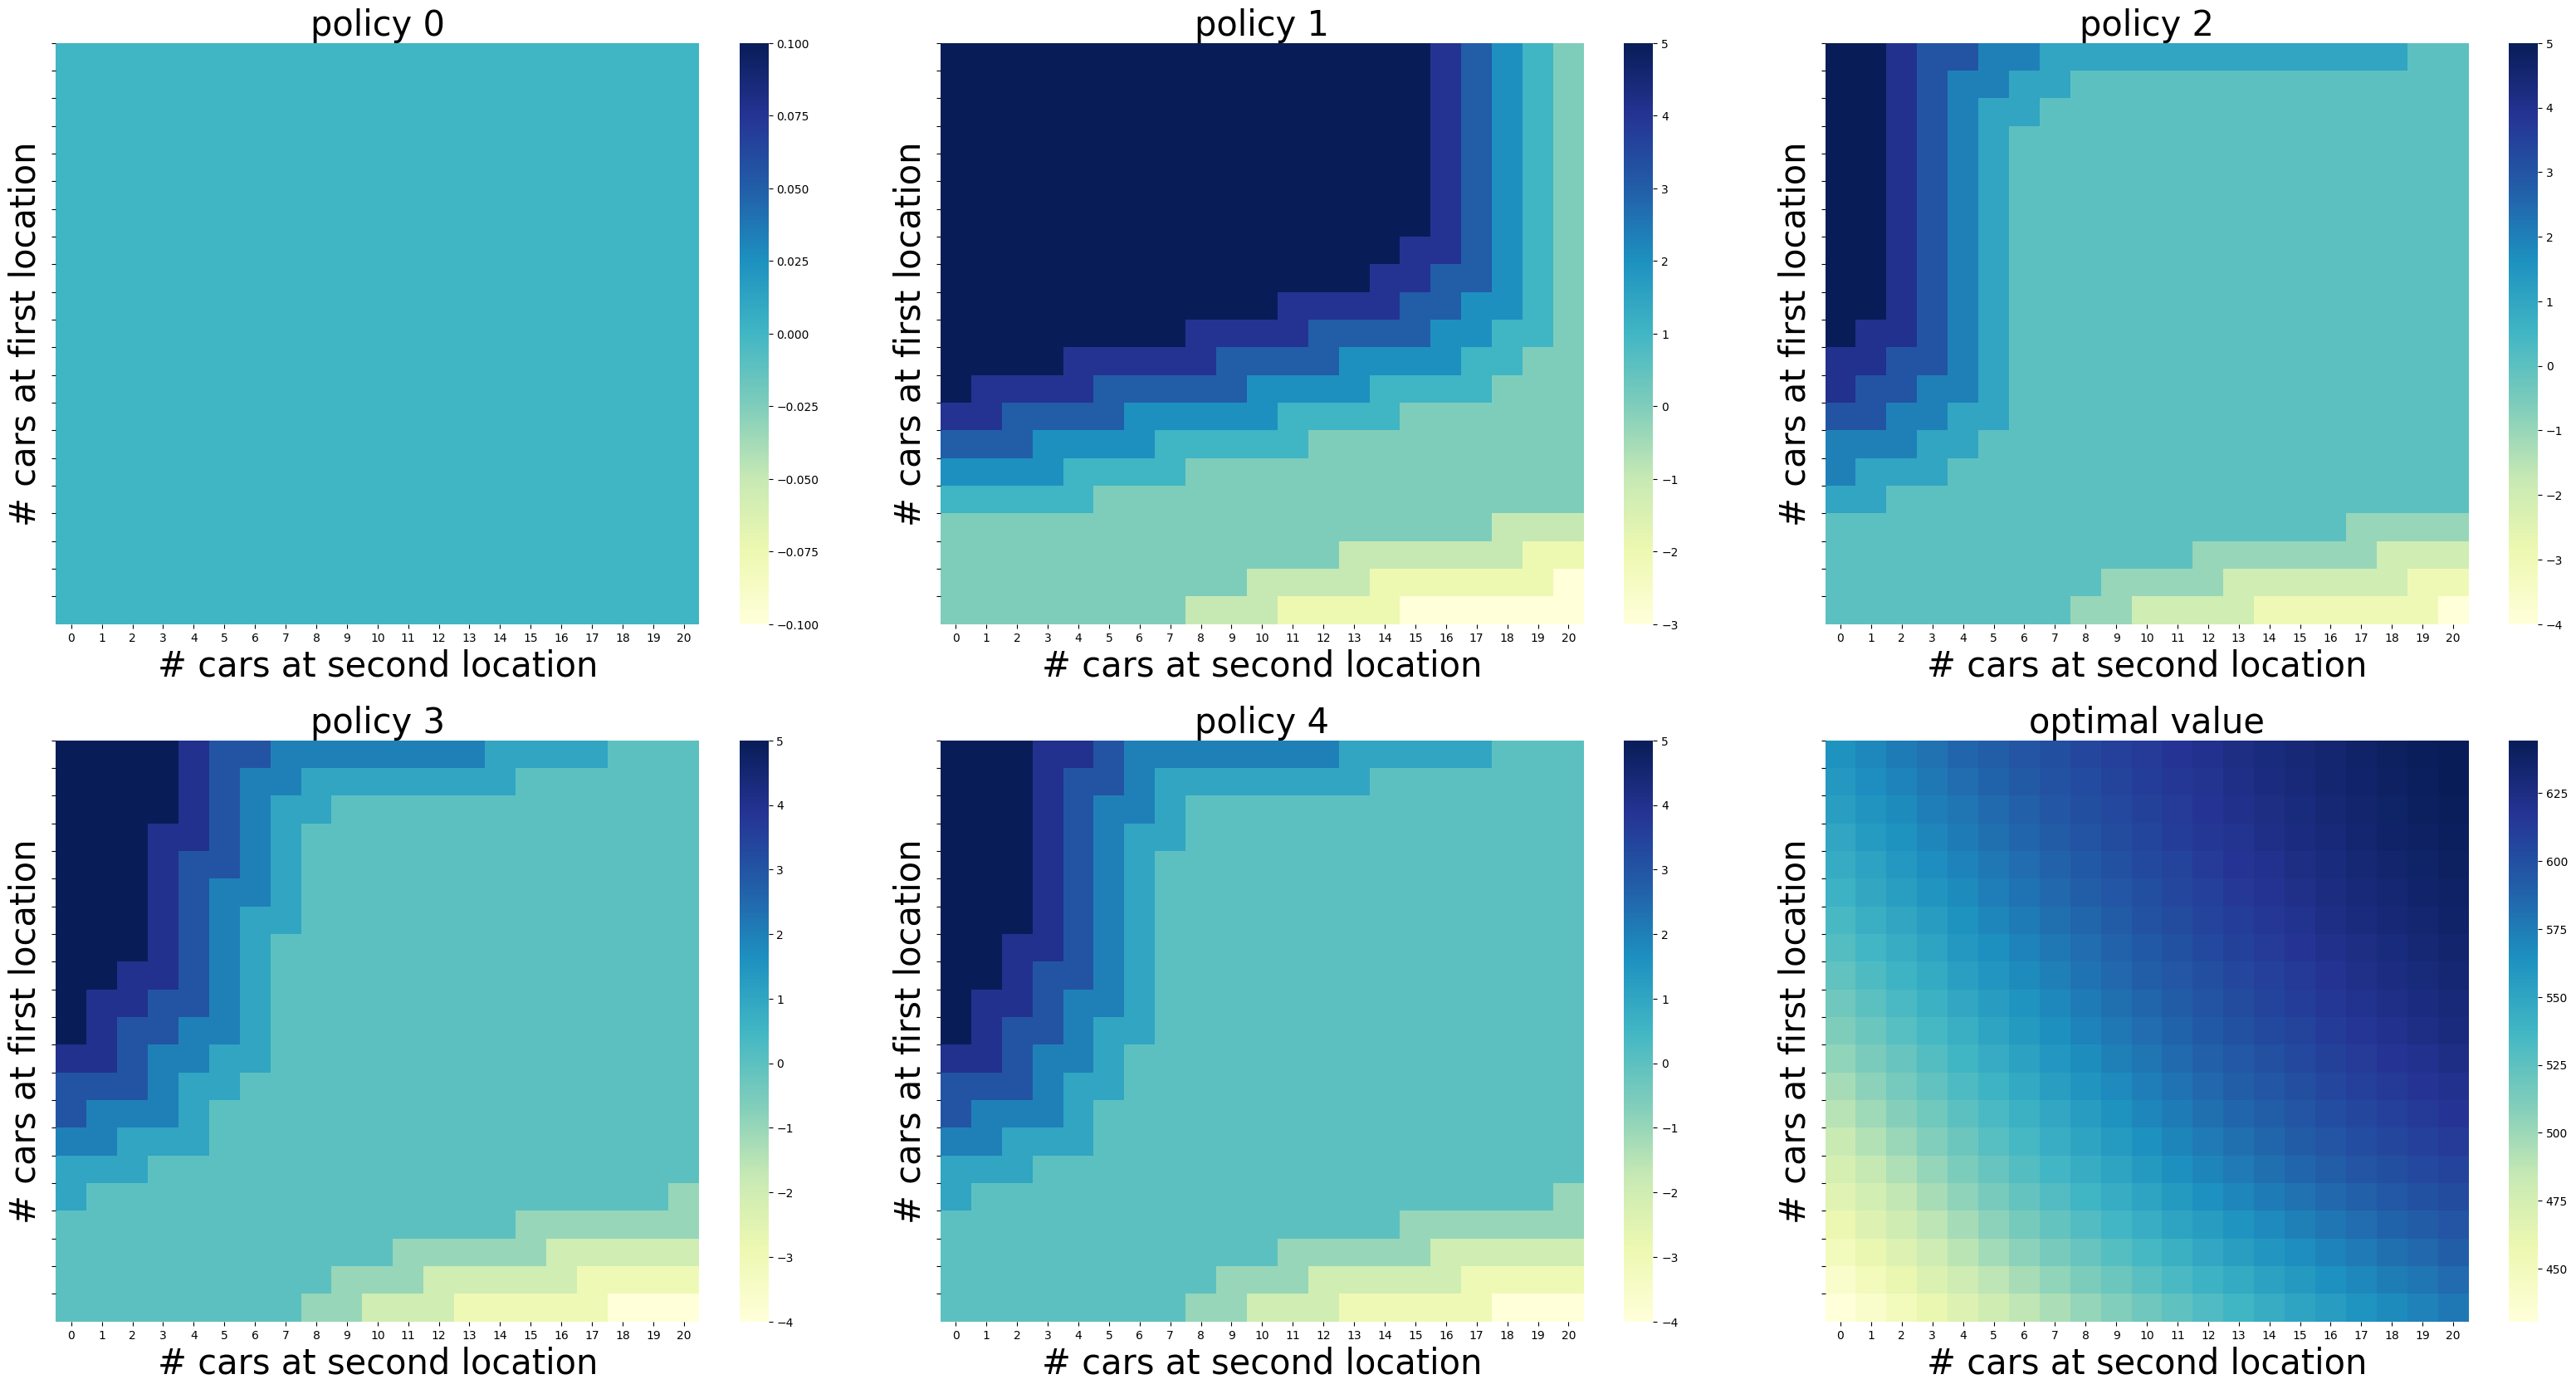

In [64]:
# 虽然并行度是10，但是只提高10多秒。原因每一个底层循环计算的都比较快。
value_p, policy_p = c4.car_rental.figure_4_2(in_place=False, constant_returned_cars=True, show=True, n_jobs=10) 

In [65]:
print(np.round(value_p[0:10, 0:10]))
print(policy_p)

[[431. 440. 450. 460. 469. 478. 487. 495. 503. 510.]
 [440. 450. 460. 470. 479. 488. 497. 505. 512. 519.]
 [450. 460. 470. 479. 489. 497. 506. 514. 521. 529.]
 [459. 468. 478. 488. 497. 506. 515. 523. 530. 537.]
 [466. 476. 486. 496. 505. 514. 522. 530. 538. 545.]
 [474. 484. 494. 503. 512. 521. 529. 537. 544. 551.]
 [482. 492. 501. 510. 519. 528. 536. 543. 551. 557.]
 [490. 499. 508. 517. 526. 534. 542. 549. 556. 563.]
 [497. 506. 515. 524. 532. 540. 547. 555. 561. 568.]
 [504. 513. 522. 530. 538. 545. 553. 560. 566. 573.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

In [66]:
np.testing.assert_array_equal(value, value_p)
np.testing.assert_array_equal(policy, policy_p)

INFO:root:after 10 iteration: max value change 21.08208381240354
INFO:root:after 20 iteration: max value change 6.221930138012453
INFO:root:after 50 iteration: max value change 0.234159297804581
INFO:root:after 60 iteration: max value change 0.07882248226928823
INFO:root:after 70 iteration: max value change 0.02654462350767517
INFO:root:after 80 iteration: max value change 0.00894114130107937
INFO:root:after 90 iteration: max value change 0.0030119821542484715
INFO:root:after 100 iteration: max value change 0.0010146877882561967
INFO:root:after 110 iteration: max value change 0.00034183957029654266
INFO:root:after 120 iteration: max value change 0.00011516405731981649
INFO:root:policy stable False
INFO:root:after 10 iteration: max value change 0.49282763232986326
INFO:root:after 20 iteration: max value change 0.1655309135642824
INFO:root:after 30 iteration: max value change 0.05575129545201207
INFO:root:after 40 iteration: max value change 0.018781954262749423
INFO:root:after 50 iterat

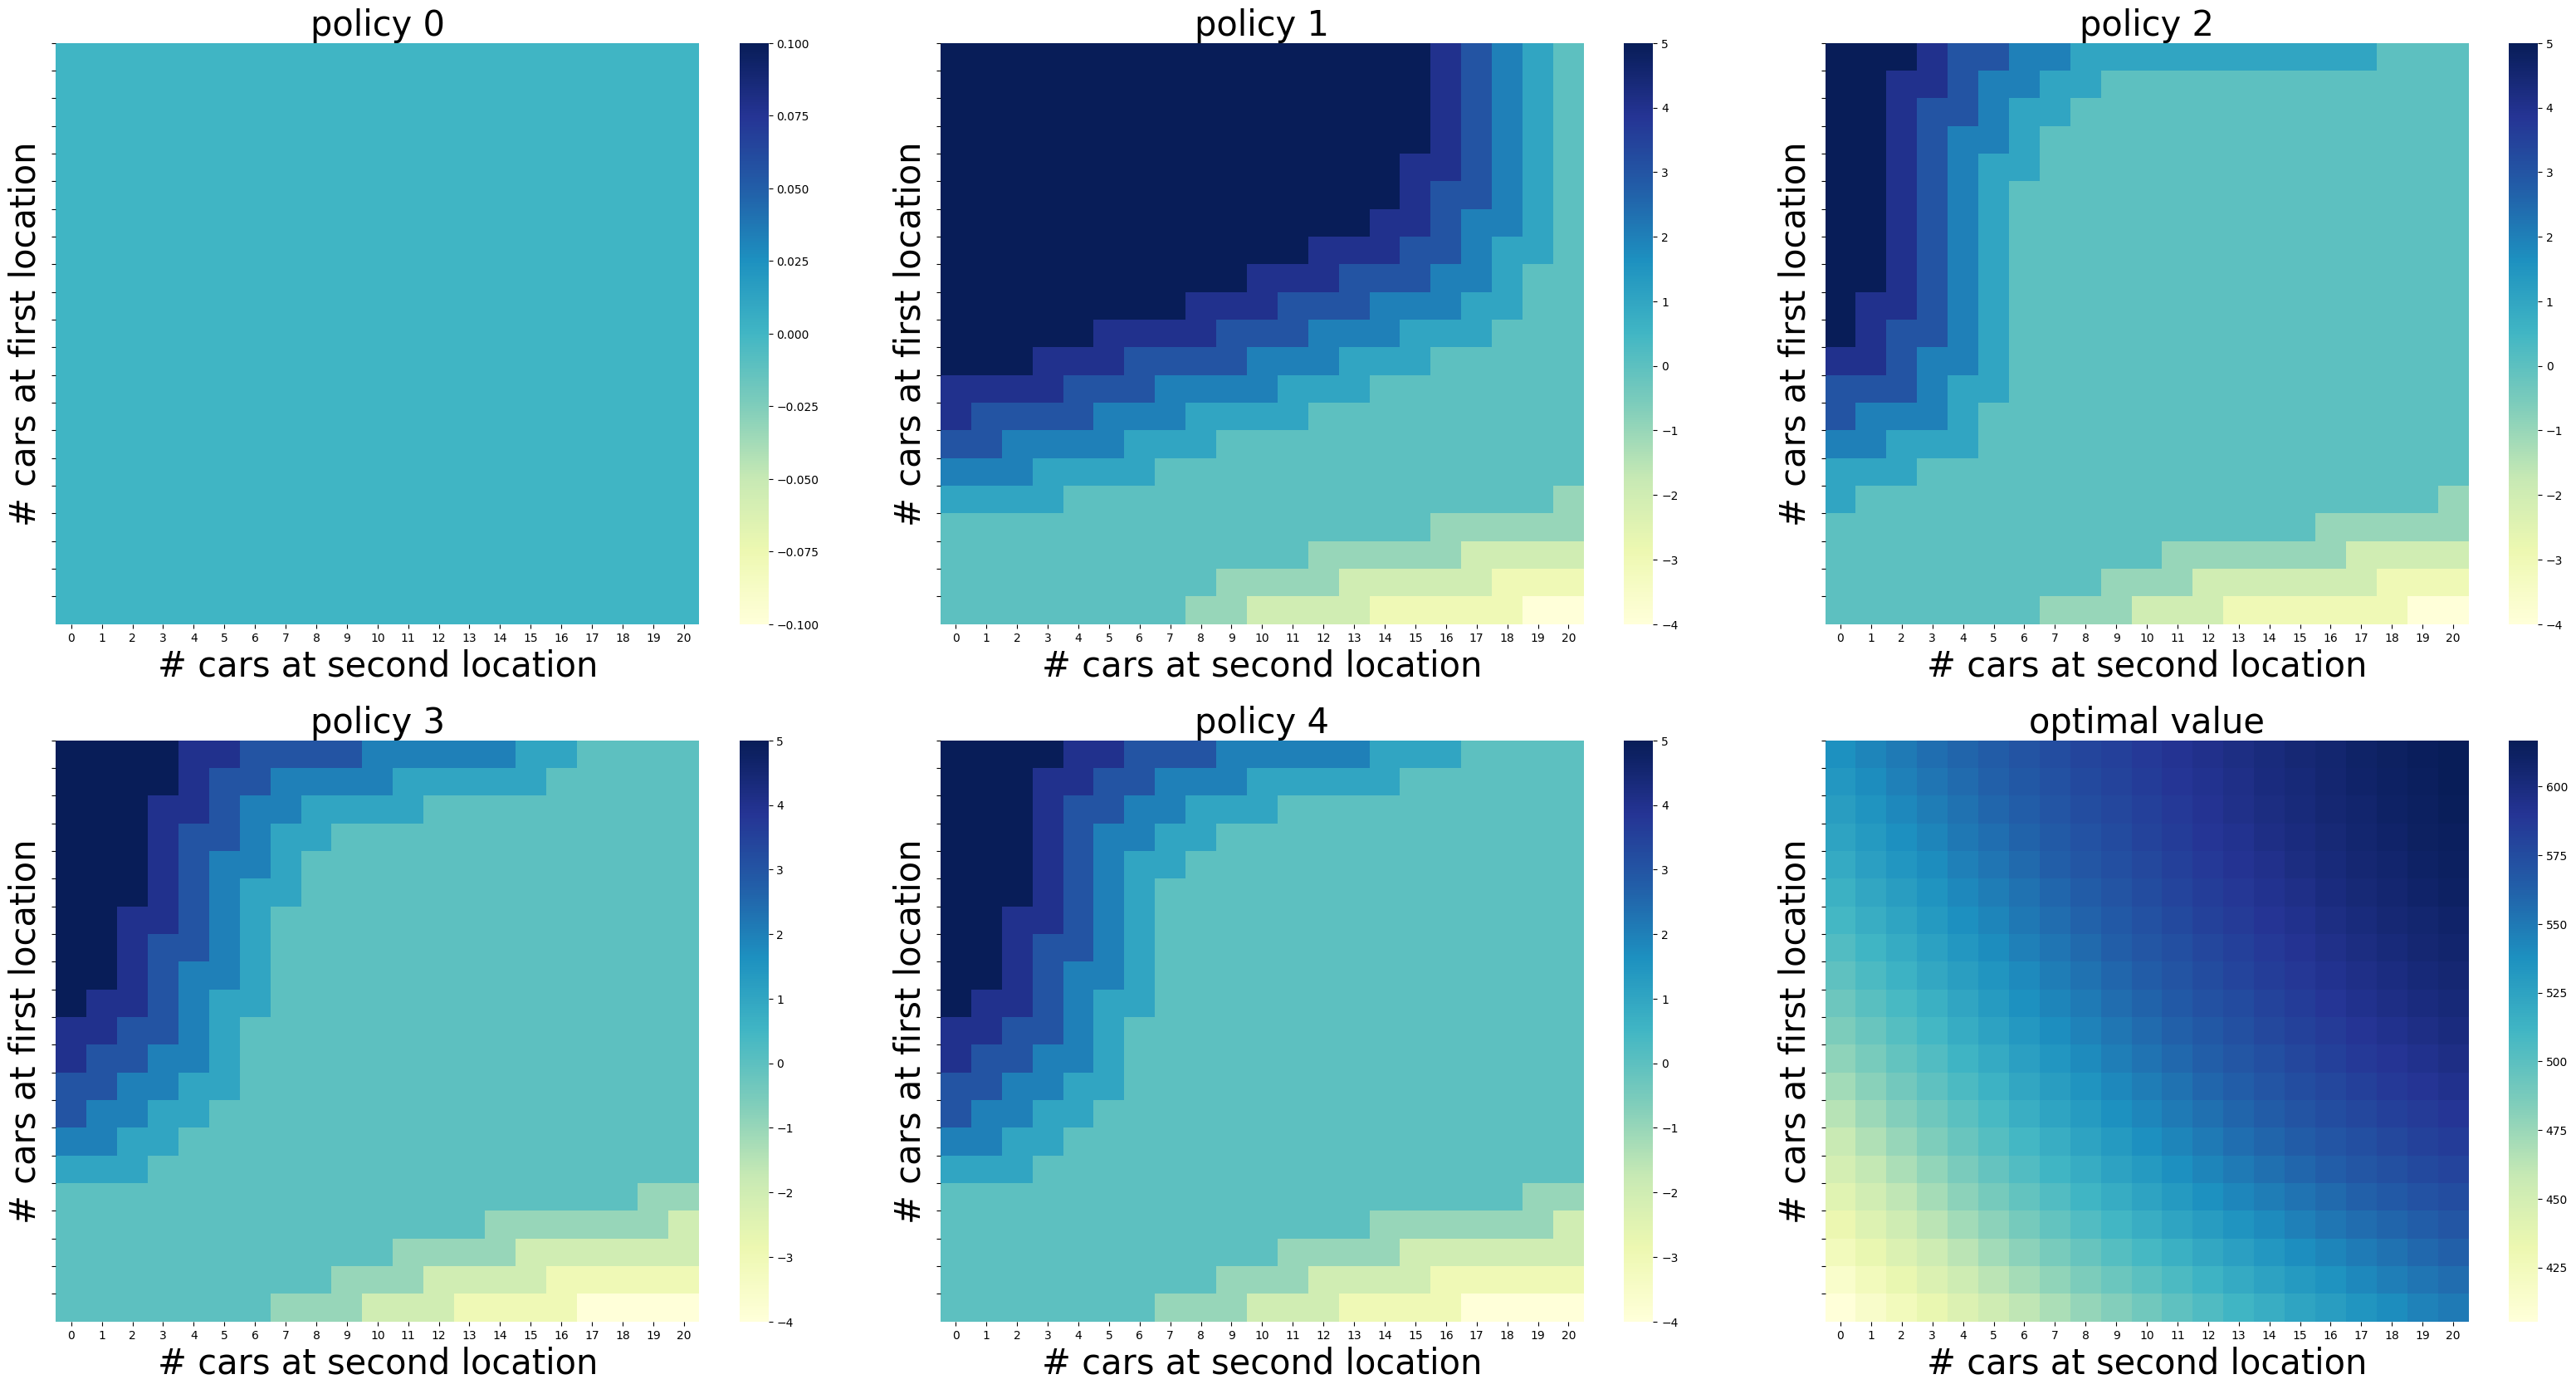

In [8]:
# 如果还车时，不是固定值，这个时候并行计算，能够提高很多。
value_p, policy_p = c4.car_rental.figure_4_2(in_place=False, constant_returned_cars=False, show=True, n_jobs=10) 

after 10 iteration: max value change 21.08208381240354
after 20 iteration: max value change 6.221930138012453
after 30 iteration: max value change 2.074211091078837
after 40 iteration: max value change 0.6962489608890792
after 50 iteration: max value change 0.234159297804581
after 60 iteration: max value change 0.07882248226928823
after 70 iteration: max value change 0.02654462350767517
after 80 iteration: max value change 0.00894114130107937
after 90 iteration: max value change 0.0030119821542484715
after 100 iteration: max value change 0.0010146877882561967
after 110 iteration: max value change 0.00034183957029654266
after 120 iteration: max value change 0.00011516405731981649
policy stable False
after 10 iteration: max value change 0.49282763232986326
after 20 iteration: max value change 0.1655309135642824
after 30 iteration: max value change 0.05575129545201207
after 40 iteration: max value change 0.018781954262749423
after 50 iteration: max value change 0.006327588886392732
after 

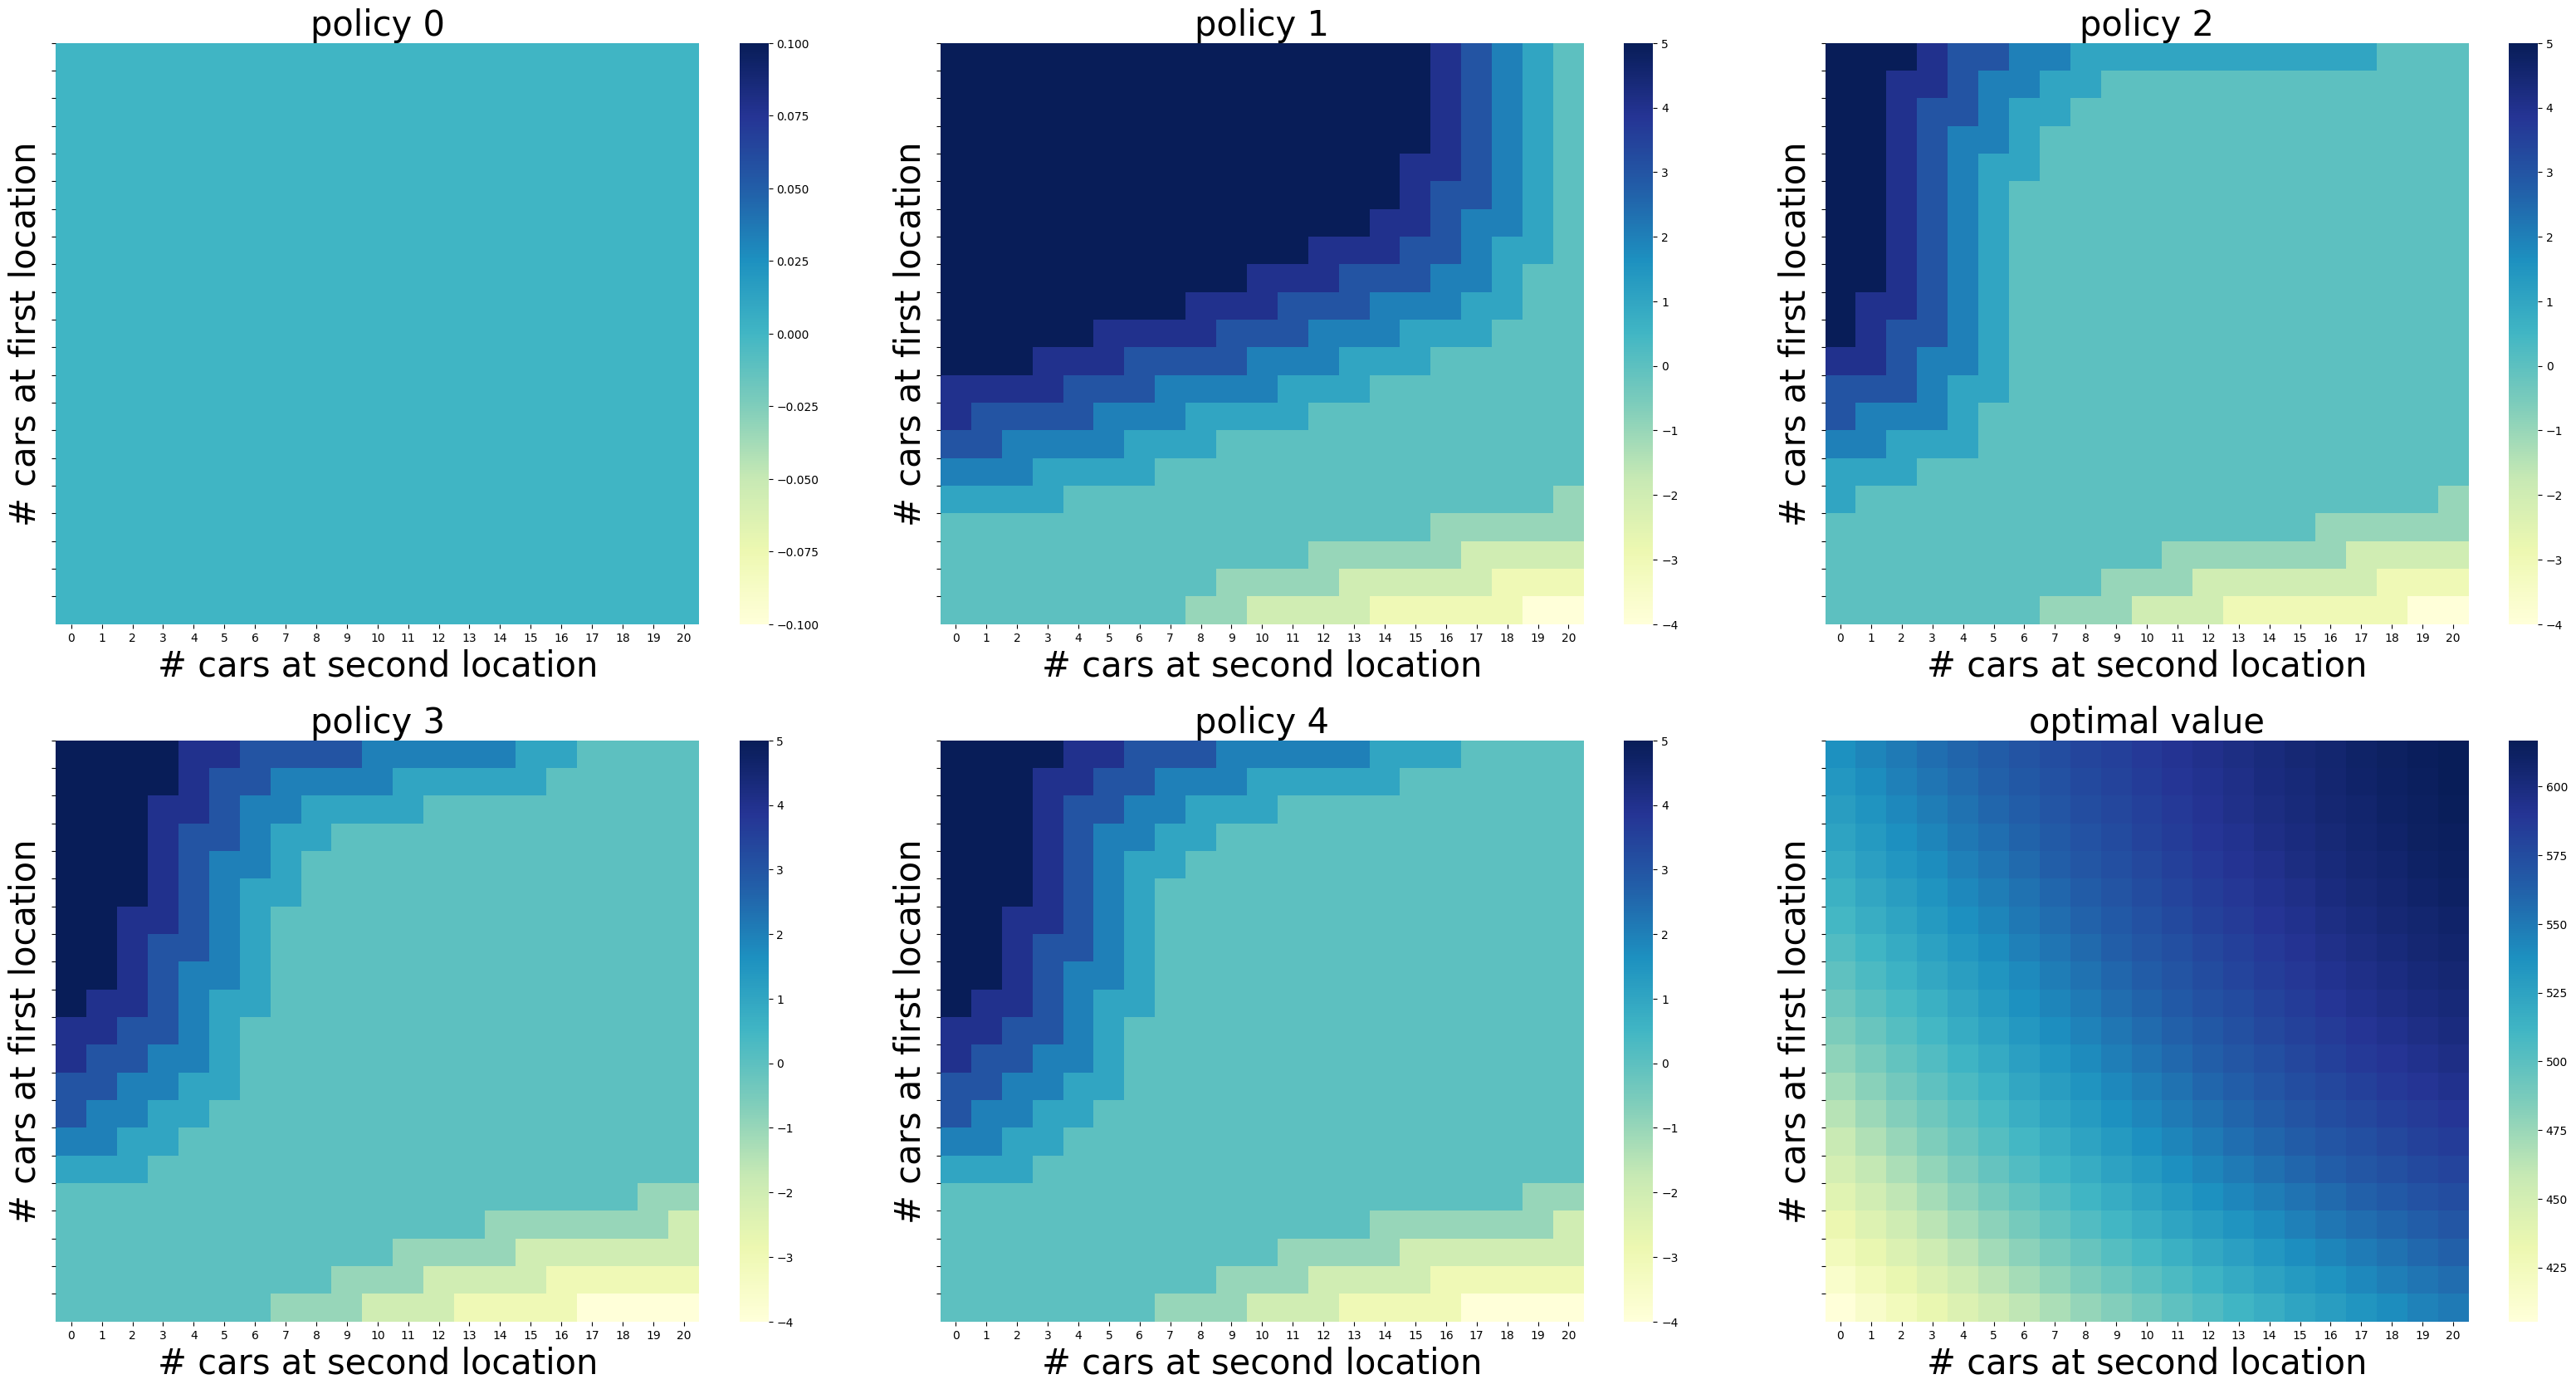

In [39]:
value, policy = c4.car_rental.figure_4_2(in_place=False, constant_returned_cars=False, show=True, n_jobs=1) 

#### constant_rented_cars

如果租车的数量也是固定呢? 和不固定比，策略和价值函数总体的轮廓几乎相同



2023-03-10 01:24:25,238: INFO: after 10 iteration: max value change 19.371024449999993
2023-03-10 01:24:25,756: INFO: after 20 iteration: max value change 6.754258588364962
2023-03-10 01:24:26,301: INFO: after 30 iteration: max value change 2.3550643486231024
2023-03-10 01:24:26,816: INFO: after 40 iteration: max value change 0.8211601634130261
2023-03-10 01:24:27,351: INFO: after 50 iteration: max value change 0.28632084485110454
2023-03-10 01:24:27,873: INFO: after 60 iteration: max value change 0.09983390555078131
2023-03-10 01:24:28,400: INFO: after 70 iteration: max value change 0.03480993045656078
2023-03-10 01:24:28,919: INFO: after 80 iteration: max value change 0.012137472251595227
2023-03-10 01:24:29,429: INFO: after 90 iteration: max value change 0.004232074891433513
2023-03-10 01:24:29,991: INFO: after 100 iteration: max value change 0.001475633271525112
2023-03-10 01:24:30,490: INFO: after 110 iteration: max value change 0.0005145215072843712
2023-03-10 01:24:30,973: INFO:

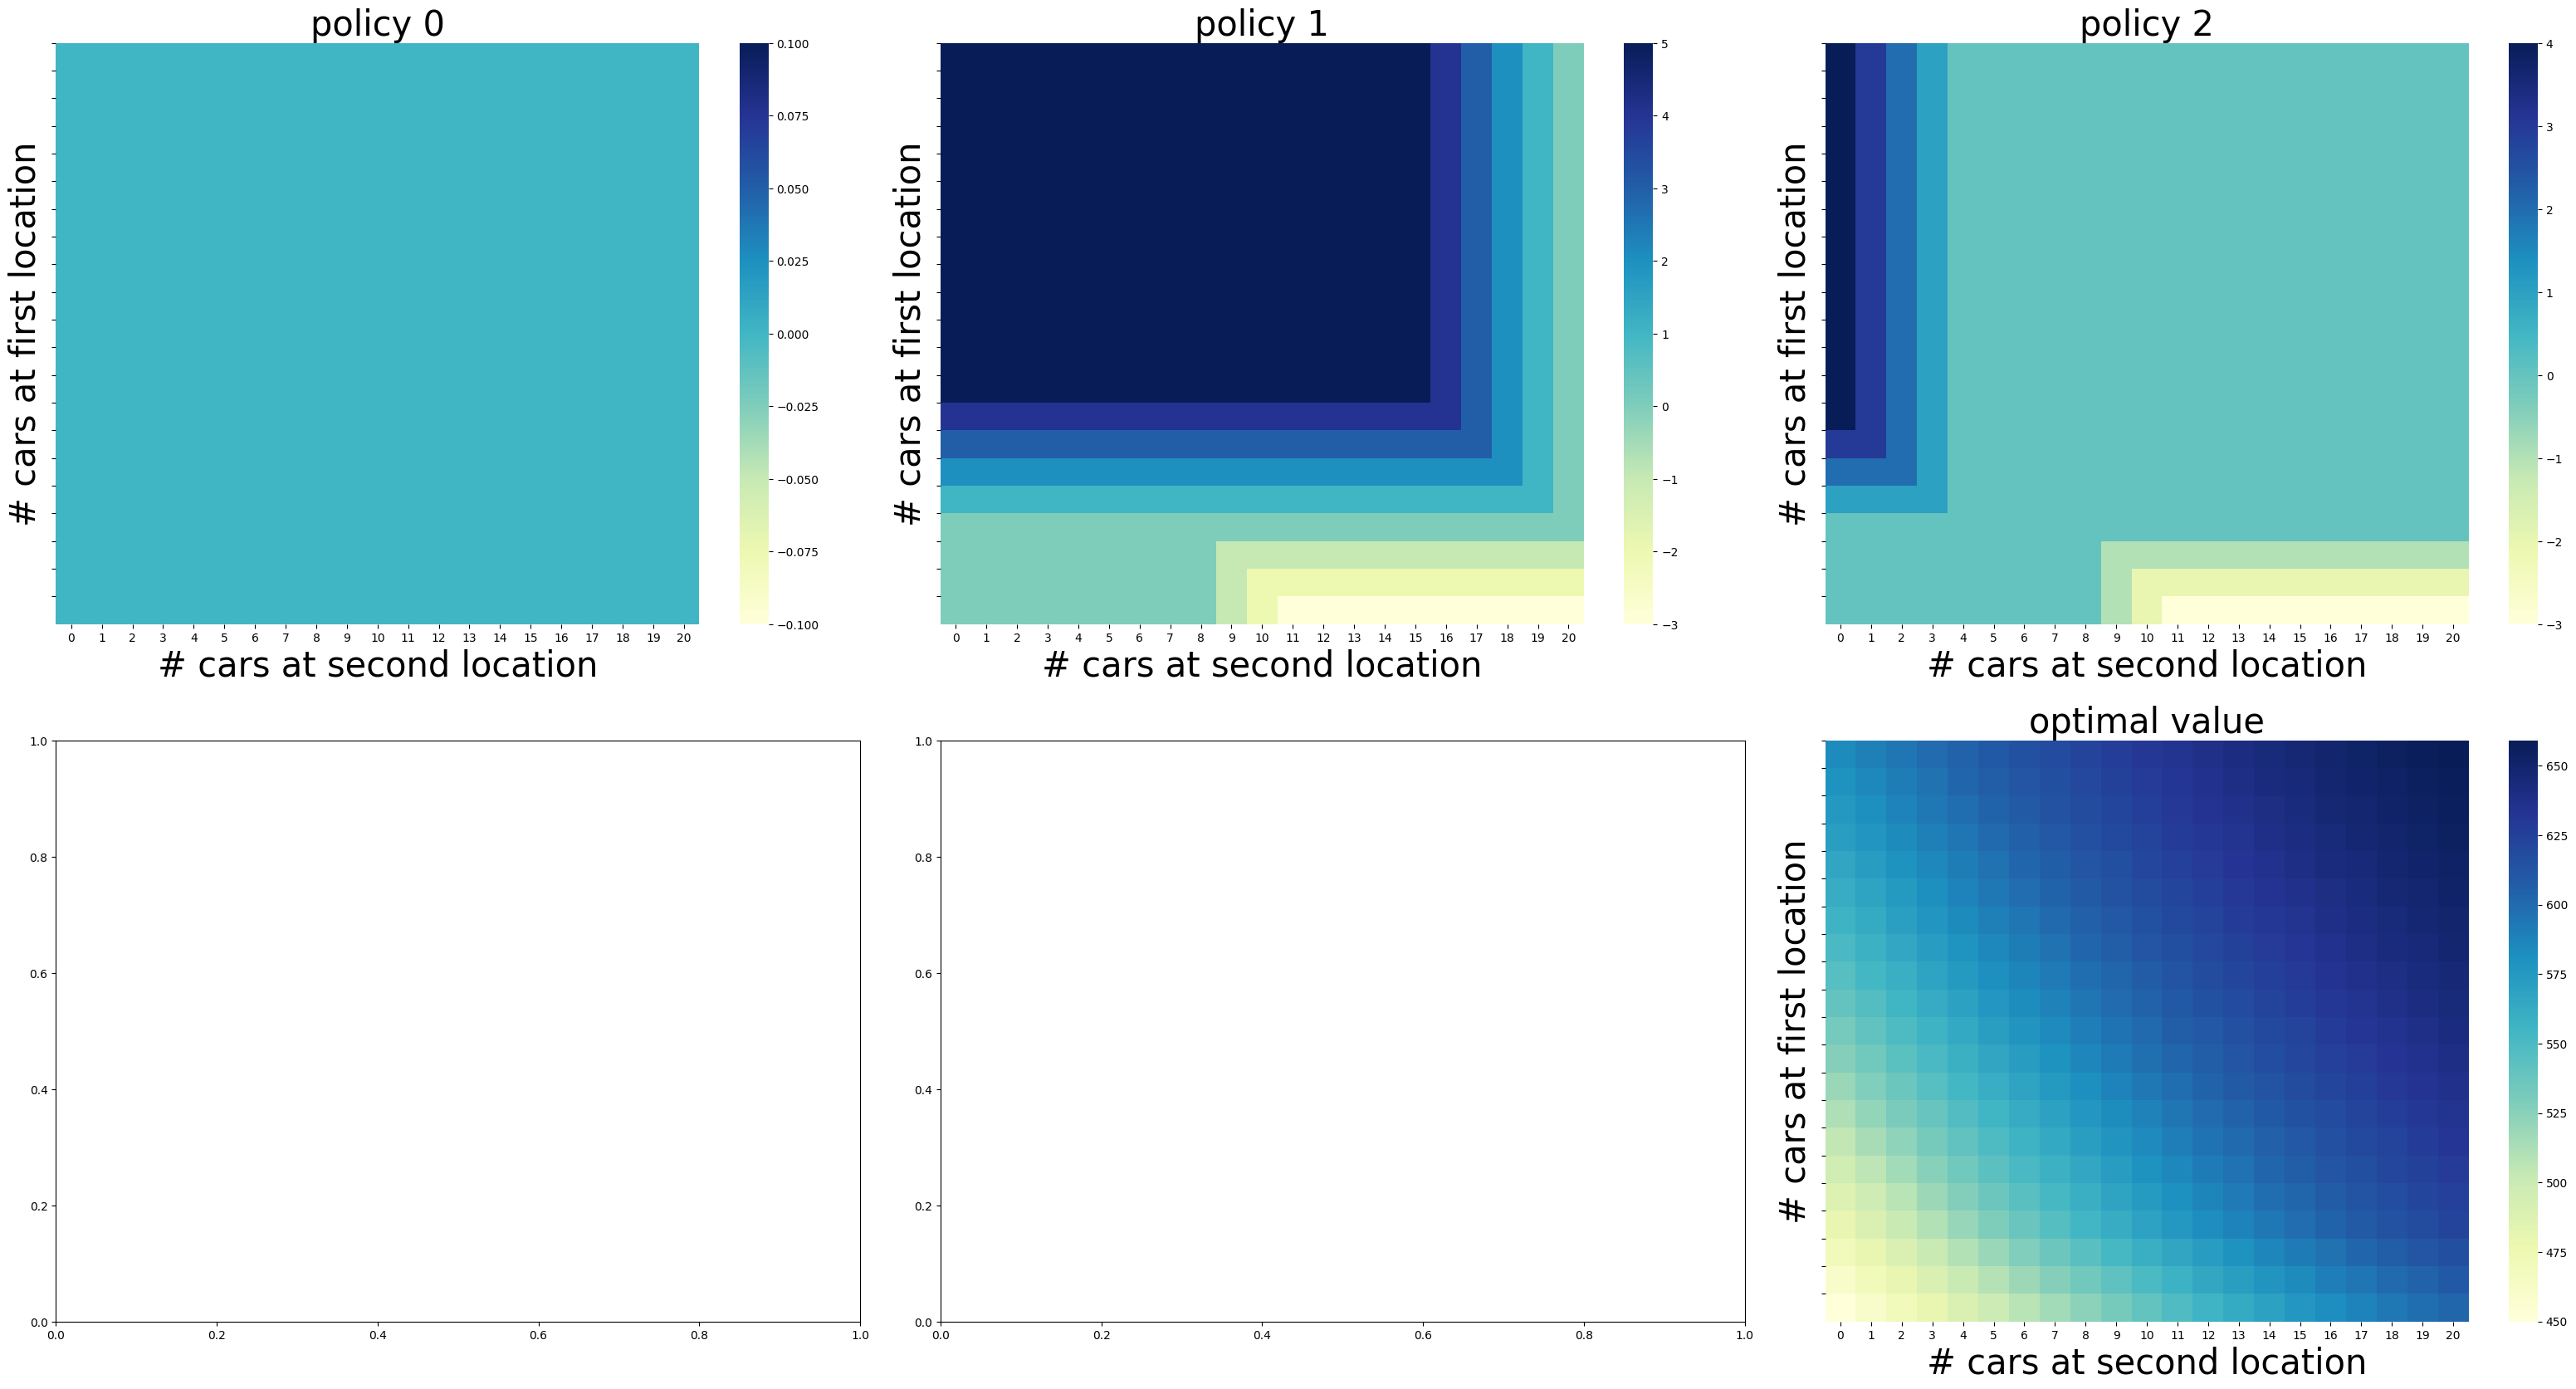

In [70]:
value, policy = c4.car_rental.figure_4_2(in_place=True, constant_rented_cars=True, constant_returned_cars=True, show=True) 

In [71]:
print(np.round(value[0:10, 0:10]))
print(policy)

[[450. 460. 470. 480. 490. 499. 508. 516. 524. 532.]
 [460. 470. 480. 490. 500. 509. 518. 526. 534. 542.]
 [470. 480. 490. 500. 510. 519. 528. 536. 544. 552.]
 [480. 490. 500. 510. 520. 529. 538. 546. 554. 561.]
 [488. 498. 508. 518. 527. 536. 544. 553. 560. 567.]
 [496. 506. 516. 525. 534. 543. 551. 558. 566. 573.]
 [504. 514. 523. 532. 541. 549. 557. 564. 571. 578.]
 [512. 521. 530. 539. 547. 555. 563. 569. 576. 583.]
 [519. 528. 537. 545. 553. 561. 568. 575. 581. 587.]
 [526. 535. 543. 551. 559. 566. 573. 579. 586. 592.]]
[[ 0  0  0  0  0  0  0  0  0 -1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3

2023-03-10 01:25:02,788: INFO: after 10 iteration: max value change 19.371024450000107
2023-03-10 01:25:03,316: INFO: after 20 iteration: max value change 6.754258588365076
2023-03-10 01:25:03,879: INFO: after 30 iteration: max value change 2.355064348623273
2023-03-10 01:25:04,424: INFO: after 40 iteration: max value change 0.8211601634131966
2023-03-10 01:25:04,917: INFO: after 50 iteration: max value change 0.2863208448511614
2023-03-10 01:25:05,429: INFO: after 60 iteration: max value change 0.09983390555100868
2023-03-10 01:25:05,964: INFO: after 70 iteration: max value change 0.03480993045673131
2023-03-10 01:25:06,492: INFO: after 80 iteration: max value change 0.012137472251765757
2023-03-10 01:25:07,030: INFO: after 90 iteration: max value change 0.004232074891660886
2023-03-10 01:25:07,576: INFO: after 100 iteration: max value change 0.0014756332716387988
2023-03-10 01:25:08,107: INFO: after 110 iteration: max value change 0.000514521507398058
2023-03-10 01:25:08,634: INFO: a

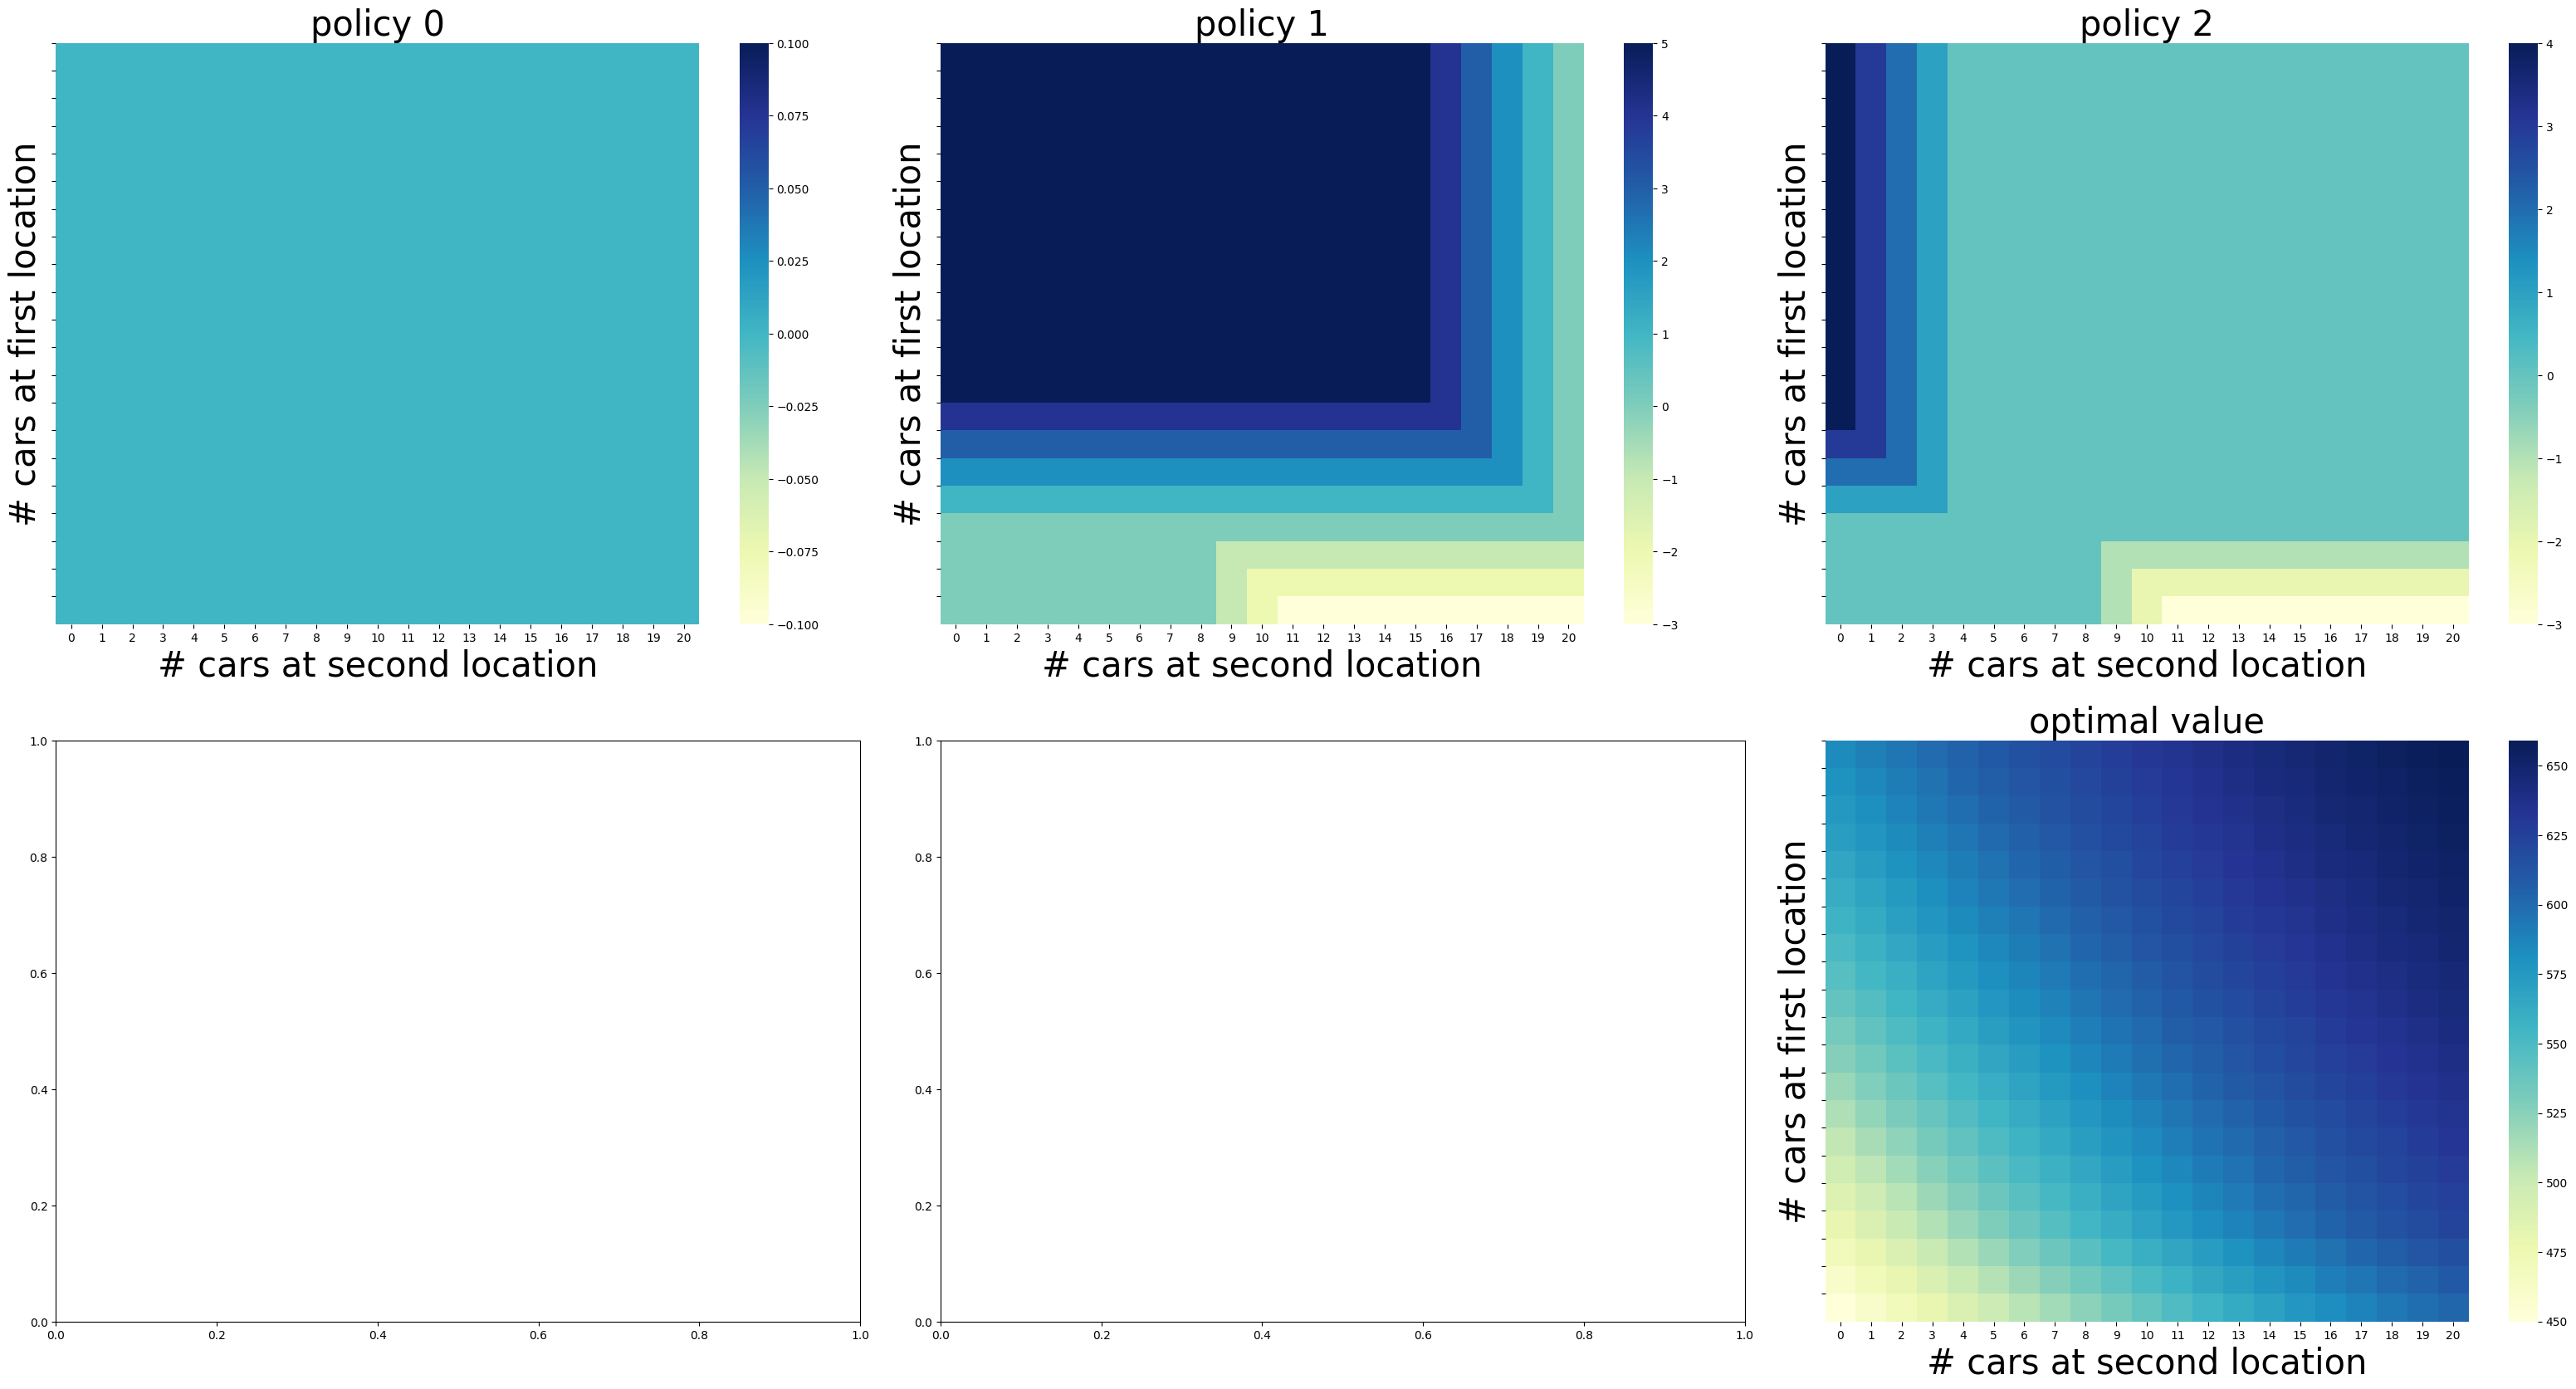

In [72]:
value, policy = c4.car_rental.figure_4_2(in_place=False, constant_rented_cars=True, constant_returned_cars=True, show=True) 

如果租车固定，但是还车不固定

2023-03-10 01:25:32,234: INFO: after 10 iteration: max value change 17.752462708291716
2023-03-10 01:25:33,493: INFO: after 20 iteration: max value change 2.5086262234527794
2023-03-10 01:25:34,784: INFO: after 30 iteration: max value change 0.3277435225938916
2023-03-10 01:25:36,147: INFO: after 40 iteration: max value change 0.04123964242188549
2023-03-10 01:25:37,456: INFO: after 50 iteration: max value change 0.005101323946576031
2023-03-10 01:25:38,779: INFO: after 60 iteration: max value change 0.0006260688161319194
2023-03-10 01:25:41,118: INFO: policy stable False
2023-03-10 01:25:42,757: INFO: after 10 iteration: max value change 0.5055692284079214
2023-03-10 01:25:44,167: INFO: after 20 iteration: max value change 0.06511492391689444
2023-03-10 01:25:45,556: INFO: after 30 iteration: max value change 0.008386296451192266
2023-03-10 01:25:46,953: INFO: after 40 iteration: max value change 0.0010800898368188427
2023-03-10 01:25:48,325: INFO: after 50 iteration: max value change

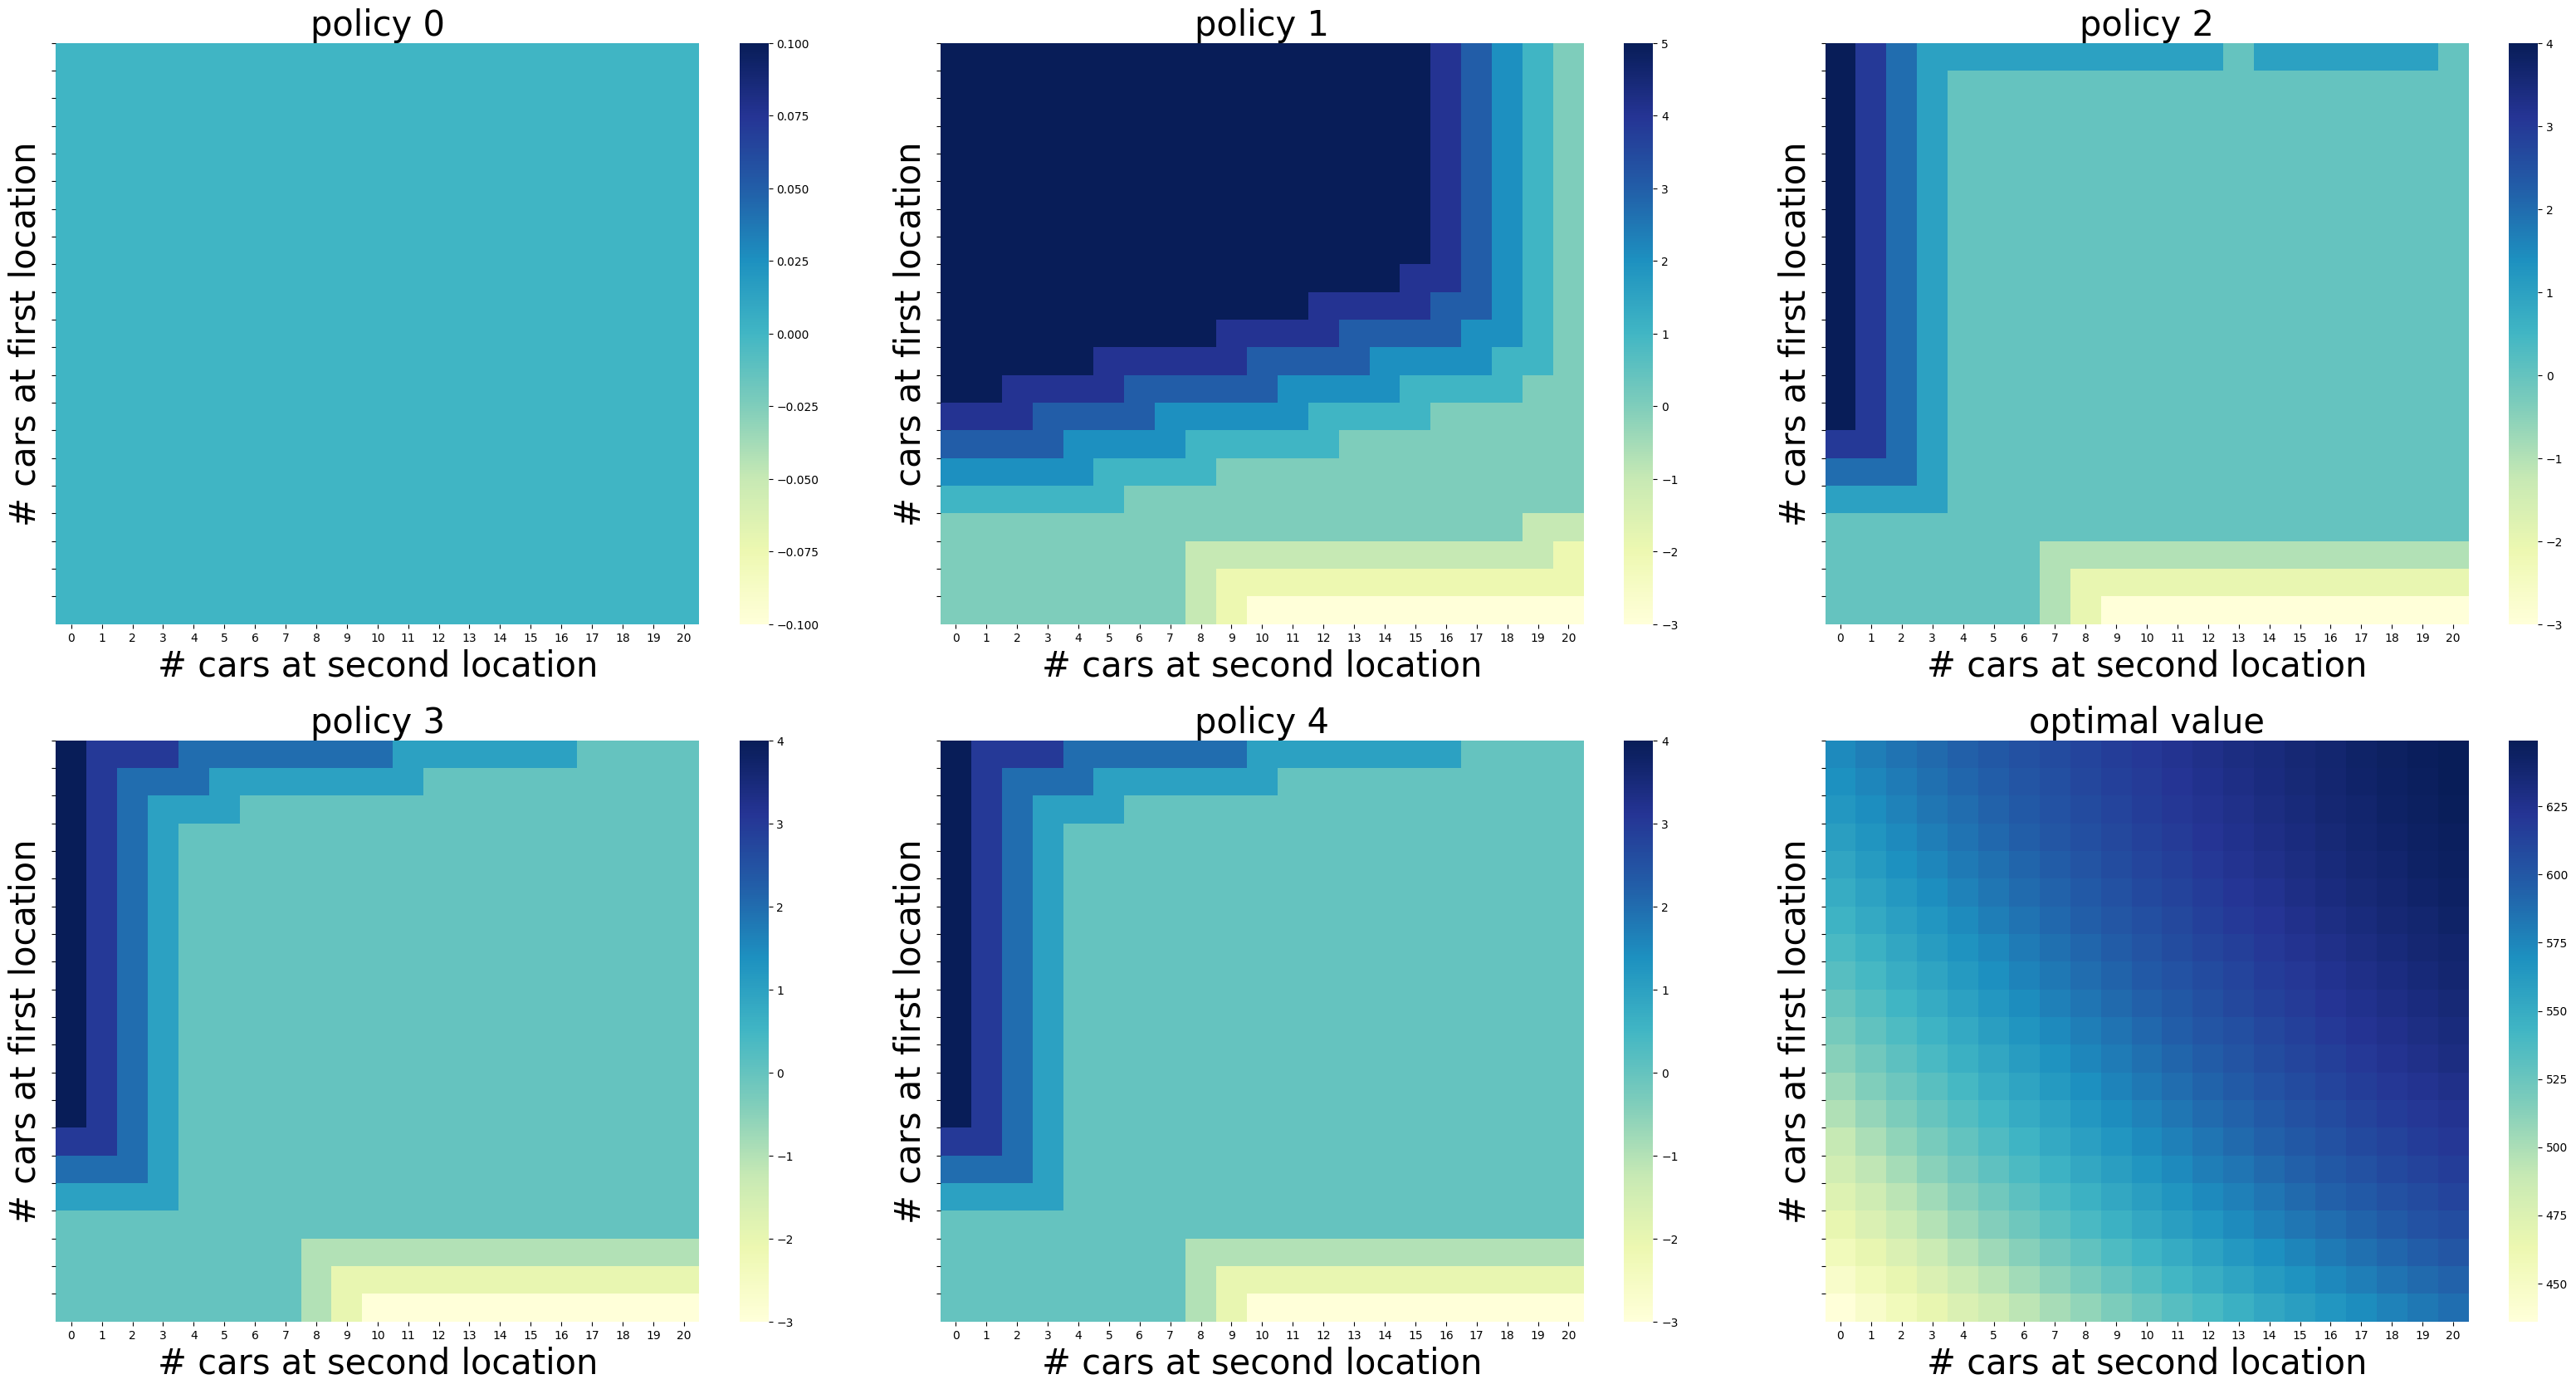

In [73]:
value, policy = c4.car_rental.figure_4_2(in_place=True, constant_rented_cars=True, constant_returned_cars=False, show=True) 

In [74]:
print(np.round(value[0:10, 0:10]))
print(policy)

[[436. 446. 456. 466. 476. 485. 493. 501. 509. 517.]
 [446. 456. 466. 476. 486. 495. 503. 511. 519. 527.]
 [456. 466. 476. 486. 496. 505. 513. 521. 529. 537.]
 [466. 476. 486. 496. 506. 515. 523. 531. 539. 546.]
 [474. 484. 494. 504. 514. 522. 531. 539. 546. 553.]
 [482. 492. 502. 512. 521. 530. 538. 546. 553. 560.]
 [490. 500. 510. 519. 528. 536. 544. 552. 559. 566.]
 [498. 508. 517. 526. 535. 543. 550. 558. 564. 571.]
 [506. 515. 524. 533. 541. 549. 556. 563. 570. 576.]
 [513. 522. 531. 539. 547. 554. 561. 568. 575. 581.]]
[[ 0  0  0  0  0  0  0  0 -1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3

2023-03-10 01:26:23,277: INFO: after 10 iteration: max value change 21.90215313756306
2023-03-10 01:26:24,558: INFO: after 20 iteration: max value change 6.742163424453793
2023-03-10 01:26:25,864: INFO: after 30 iteration: max value change 2.341831547091715
2023-03-10 01:26:27,189: INFO: after 40 iteration: max value change 0.8139343190827049
2023-03-10 01:26:28,515: INFO: after 50 iteration: max value change 0.28315343081840183
2023-03-10 01:26:29,841: INFO: after 60 iteration: max value change 0.09857608706090559
2023-03-10 01:26:31,196: INFO: after 70 iteration: max value change 0.03433550603710955
2023-03-10 01:26:32,468: INFO: after 80 iteration: max value change 0.011963704671302366
2023-03-10 01:26:33,765: INFO: after 90 iteration: max value change 0.00416954507875289
2023-03-10 01:26:35,065: INFO: after 100 iteration: max value change 0.001453379302574831
2023-03-10 01:26:36,430: INFO: after 110 iteration: max value change 0.0005066571561656019
2023-03-10 01:26:37,717: INFO: af

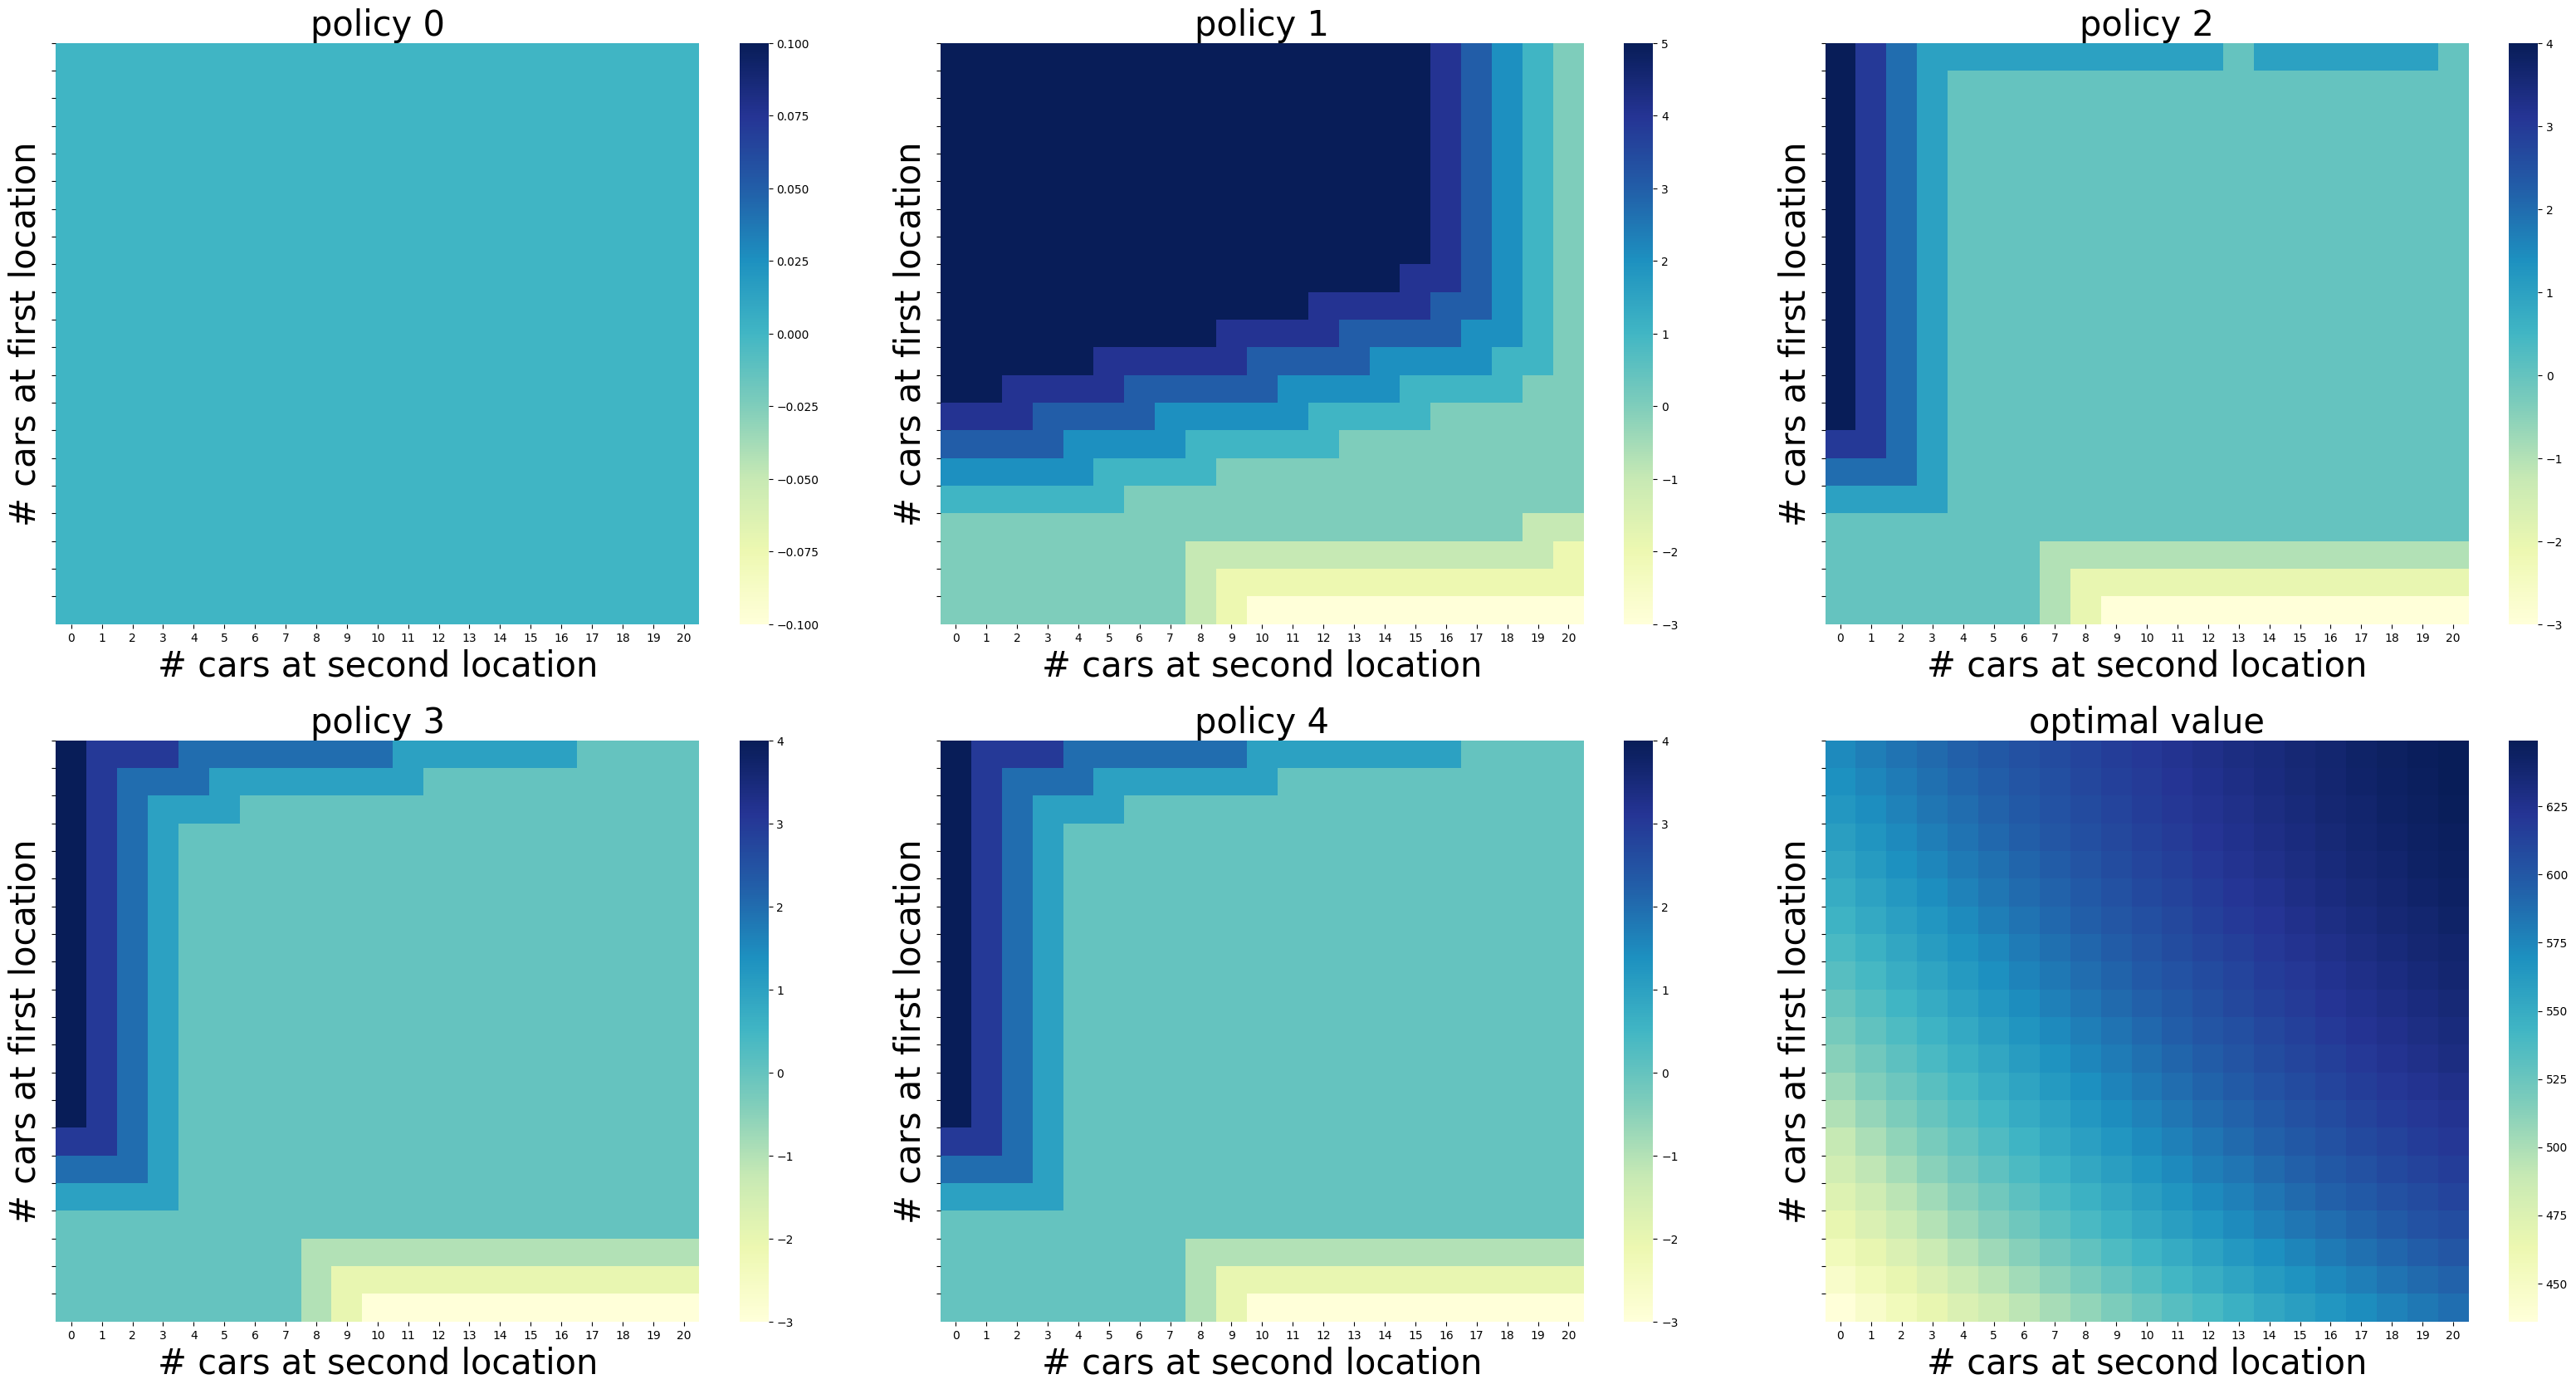

In [75]:
value, policy = c4.car_rental.figure_4_2(in_place=False, constant_rented_cars=True, constant_returned_cars=False, show=True) 

#### my implementation

自己写的方法，基本参考了c4.car_rental老的版本。只是不知道为啥性能会差不少。

after 10 iteration: delta=19.40385808254939
after 20 iteration: delta=4.252112693842776
after 30 iteration: delta=0.8720029351049448
after 40 iteration: delta=0.1737691018435612
after 50 iteration: delta=0.03409927655258116
after 60 iteration: delta=0.006633800647819044
after 70 iteration: delta=0.0012841759864272717
after 80 iteration: delta=0.0002478769196159192
policy stable = False
after 10 iteration: delta=0.3670218562992318
after 20 iteration: delta=0.065197614125168
after 30 iteration: delta=0.011569172929284832
after 40 iteration: delta=0.002052919695017863
after 50 iteration: delta=0.00036428526584586507
policy stable = False
after 10 iteration: delta=0.1097569388878128
after 20 iteration: delta=0.020714866829109724
after 30 iteration: delta=0.00389063733302919
after 40 iteration: delta=0.0007307265586291578
after 50 iteration: delta=0.00013724262737468962
policy stable = False
after 10 iteration: delta=0.0025834353657501197
policy stable = False
after 10 iteration: delta=0.00

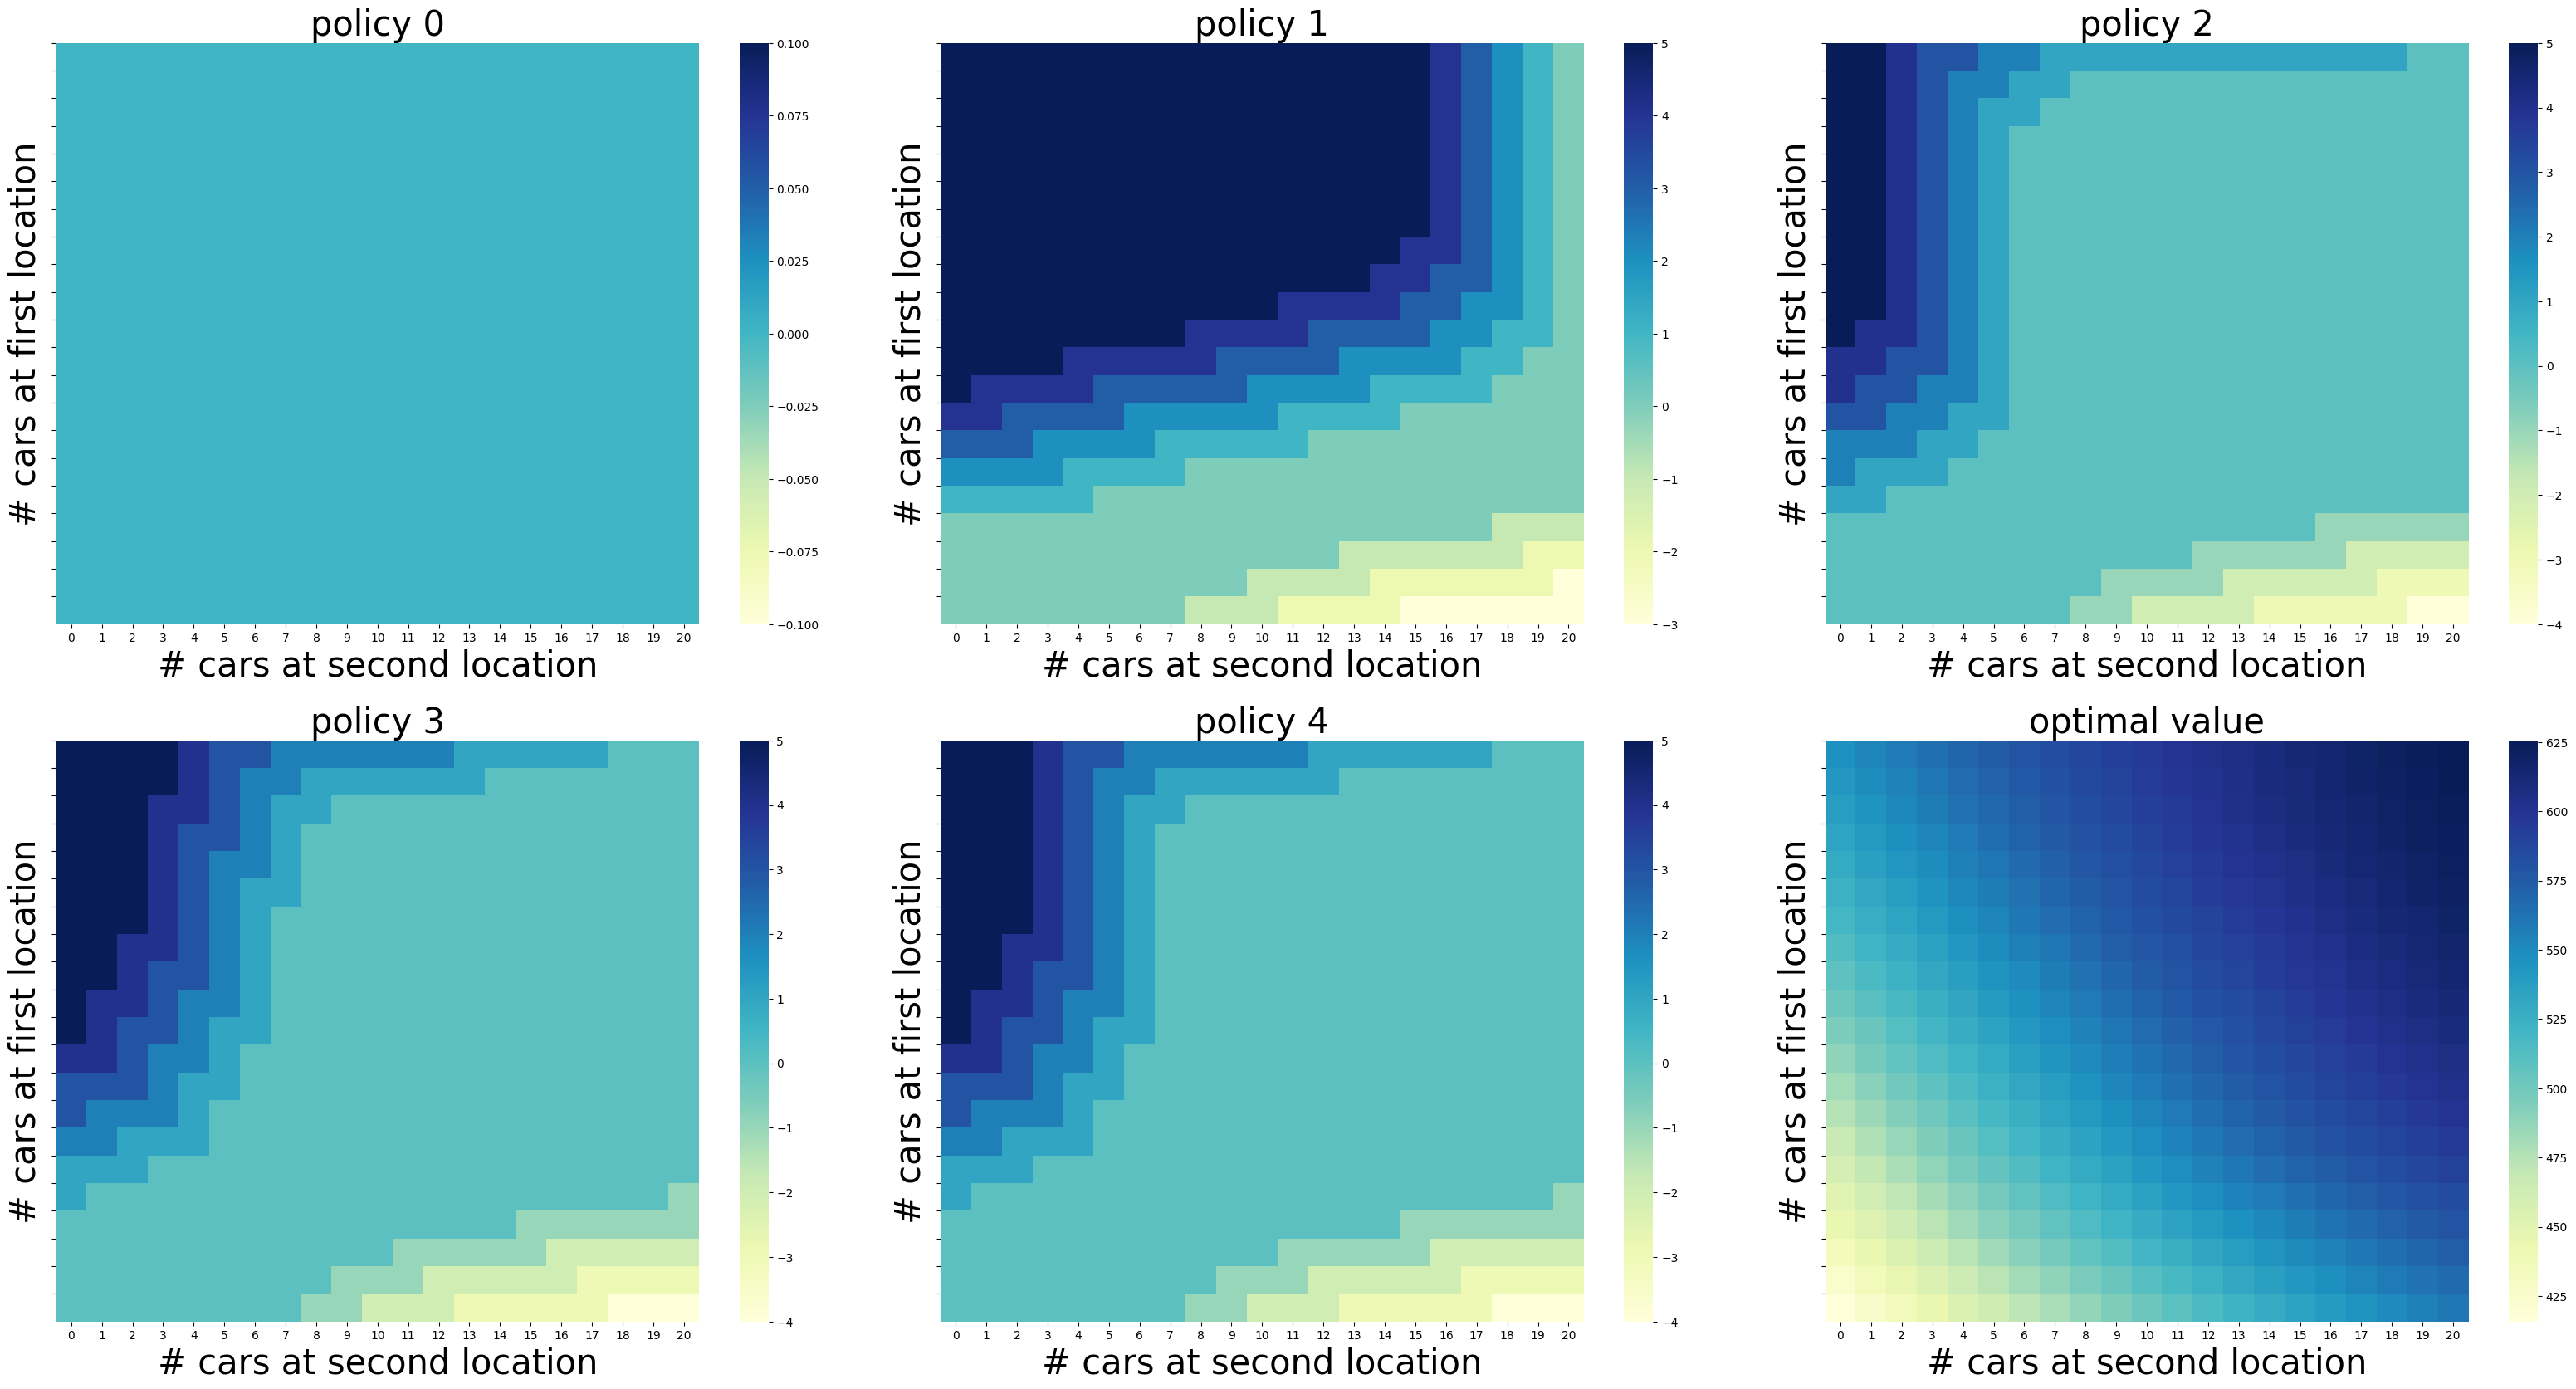

In [76]:
max_car_num = 20
rental = c4.car_rental_m.JackRental(in_place=True, max_car_num=max_car_num, theta=1e-4, 
                                    constant_return=True, verbose=True)
v, pi = rental.run() 

In [175]:
print(np.round(v[0:10, 0:10]))
print(pi)

[[416. 426. 436. 445. 454. 463. 472. 480. 487. 495.]
 [426. 436. 445. 455. 464. 473. 481. 489. 497. 504.]
 [435. 445. 455. 464. 474. 482. 491. 499. 506. 513.]
 [444. 454. 463. 473. 482. 491. 499. 507. 515. 522.]
 [452. 461. 471. 481. 490. 499. 507. 515. 522. 529.]
 [459. 469. 479. 488. 497. 506. 514. 522. 529. 536.]
 [467. 477. 486. 495. 504. 512. 520. 528. 535. 542.]
 [475. 484. 493. 502. 510. 518. 526. 534. 540. 547.]
 [482. 491. 500. 508. 516. 524. 532. 539. 546. 552.]
 [489. 498. 506. 514. 522. 530. 537. 544. 550. 557.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

after 10 iteration: delta=21.528226914981815
after 20 iteration: delta=6.326542908155261
after 30 iteration: delta=2.1274485428422167
after 40 iteration: delta=0.7169460132894301
after 50 iteration: delta=0.24181067758411245
after 60 iteration: delta=0.08160730527072246
after 70 iteration: delta=0.027552708054145114
after 80 iteration: delta=0.009305119859845945
after 90 iteration: delta=0.0031431251038611663
after 100 iteration: delta=0.001061832949858399
after 110 iteration: delta=0.00035874624597909133
after 120 iteration: delta=0.00012121127031150536
policy stable = False
after 10 iteration: delta=0.34252010980492287
after 20 iteration: delta=0.1156515397266844
after 30 iteration: delta=0.03908009612331398
after 40 iteration: delta=0.013205668631883327
after 50 iteration: delta=0.004462366196605672
after 60 iteration: delta=0.0015078912481385487
after 70 iteration: delta=0.0005095359546203326
after 80 iteration: delta=0.00017217878951214516
policy stable = False
after 10 iteration:

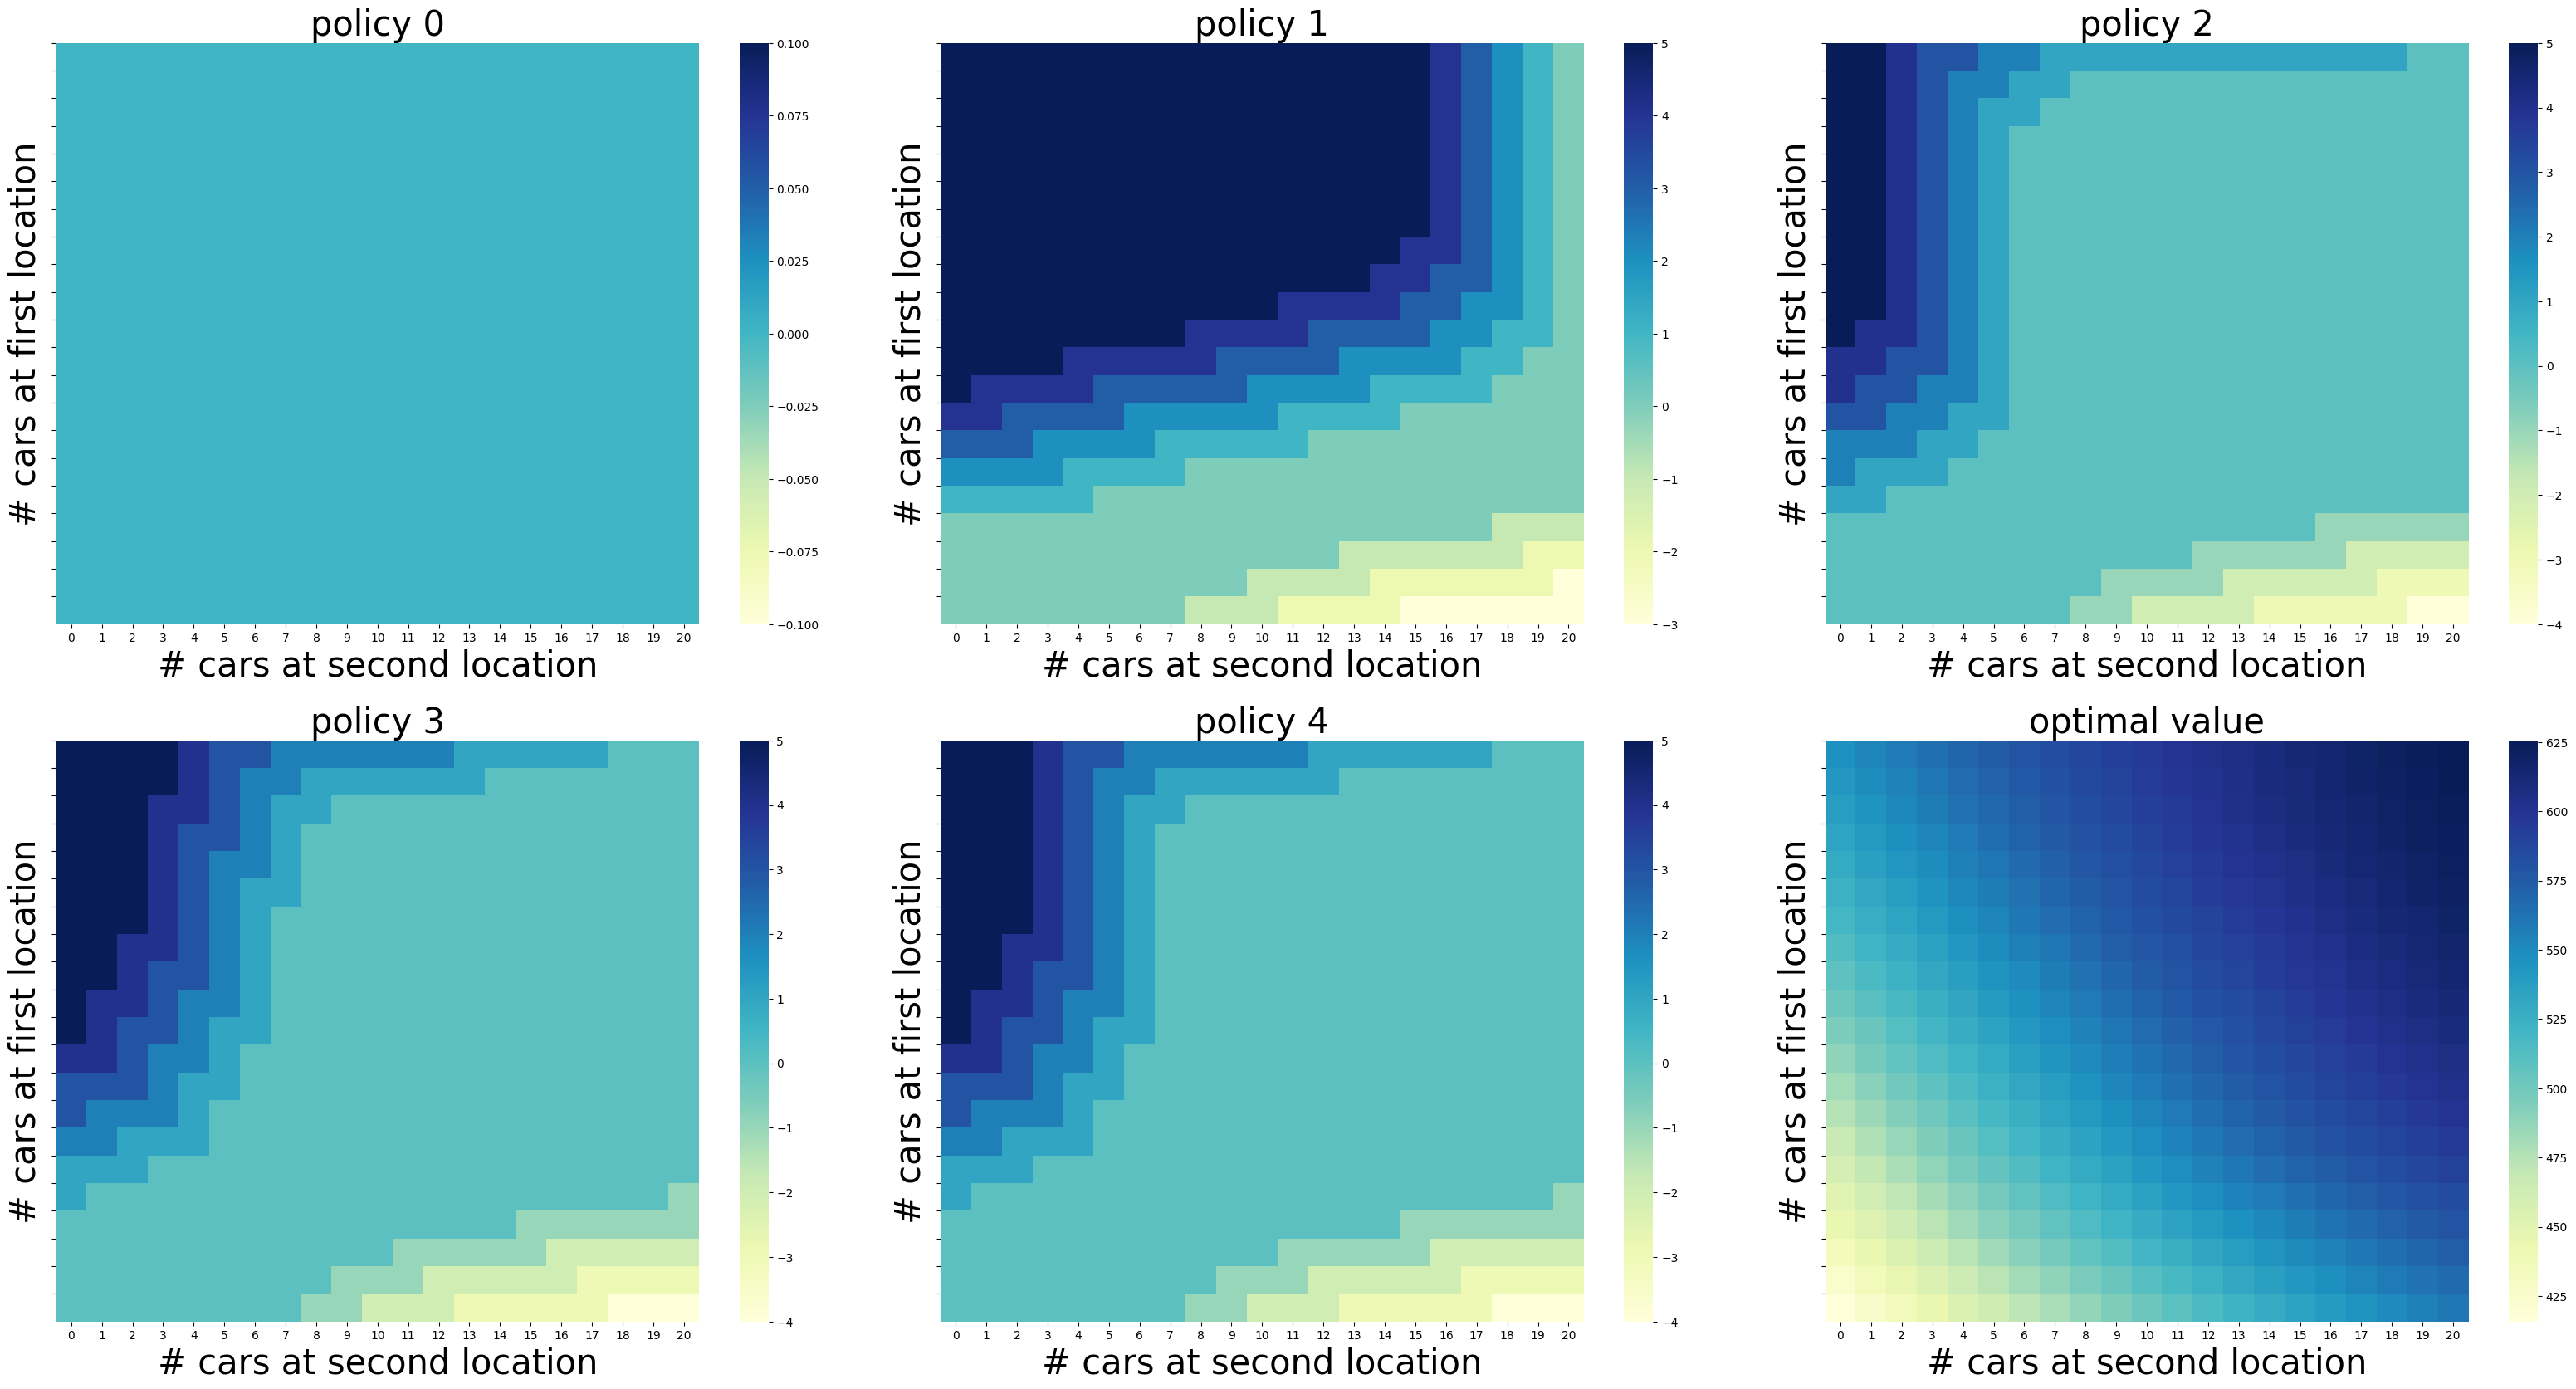

In [20]:
max_car_num = 20
rental = c4.car_rental_m.JackRental(in_place=False, max_car_num=max_car_num, theta=1e-4, 
                                    constant_return=True, verbose=True)
v, pi = rental.run()

In [21]:
print(np.round(v[0:10, 0:10]))
print(pi)

[[416. 426. 436. 445. 454. 463. 472. 480. 487. 495.]
 [426. 436. 445. 455. 464. 473. 481. 489. 497. 504.]
 [435. 445. 455. 464. 474. 482. 491. 499. 506. 513.]
 [444. 454. 463. 473. 482. 491. 499. 507. 515. 522.]
 [452. 461. 471. 481. 490. 499. 507. 515. 522. 529.]
 [459. 469. 479. 488. 497. 506. 514. 522. 529. 536.]
 [467. 477. 486. 495. 504. 512. 520. 528. 535. 542.]
 [475. 484. 493. 502. 510. 518. 526. 534. 540. 547.]
 [482. 491. 500. 508. 516. 524. 532. 539. 546. 552.]
 [489. 498. 506. 514. 522. 530. 537. 544. 550. 557.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

实现的第一版本中（当时没有参考 c4.car_rental），发现无法收敛。原因在于下面代码中，易车后，没有考虑租车和还车发生的概率。
~~~python
        returns = 0
        next_state, r = self.move(state, action)
        returns += r         
        next_state, r = self.rent(next_state)
        returns += r                 
        next_state, r = self.return_(next_state)
        returns += r
        
        returns += self.discount * v[next_state[0], next_state[1]]
        return returns      
~~~

In [34]:
max_car_num = 20
rental = c4.car_rental_m.JackRental(in_place=False, max_car_num=max_car_num, theta=1e-4, 
                                    constant_return=True, verbose=True)
v, pi = rental.run(fun=rental.expected_return_wrong)

after 10 iteration: delta=224.37239661
after 20 iteration: delta=142.24323988020785
after 30 iteration: delta=194.16265343214786
after 40 iteration: delta=176.53679676165694
after 50 iteration: delta=160.41461738176628
after 60 iteration: delta=190.64704412048013
after 70 iteration: delta=156.22711798201703
after 80 iteration: delta=196.5941451175638
after 90 iteration: delta=160.4734588373068
after 100 iteration: delta=163.41567403712475
after 110 iteration: delta=197.59894078917597
after 120 iteration: delta=191.47171022786358
after 130 iteration: delta=235.49116359116636
after 140 iteration: delta=185.72351307103162
after 150 iteration: delta=179.2399803192534
after 160 iteration: delta=186.58413117611735
after 170 iteration: delta=189.83425778759965
after 180 iteration: delta=227.2899713850618
after 190 iteration: delta=159.17909804741197
after 200 iteration: delta=174.5427810635066
after 210 iteration: delta=174.6496266751742
after 220 iteration: delta=148.90995587422964
after 230

KeyboardInterrupt: 

after 10 iteration: delta=19.371024450000107
after 20 iteration: delta=6.754258588365076
after 30 iteration: delta=2.355064348623273
after 40 iteration: delta=0.8211601634131966
after 50 iteration: delta=0.2863208448511614
after 60 iteration: delta=0.09983390555100868
after 70 iteration: delta=0.03480993045673131
after 80 iteration: delta=0.012137472251765757
after 90 iteration: delta=0.004232074891660886
after 100 iteration: delta=0.0014756332716387988
after 110 iteration: delta=0.000514521507398058
after 120 iteration: delta=0.00017940255668236205
policy stable = False
after 10 iteration: delta=0.8929104356225253
policy stable = False
after 10 iteration: delta=0.6299561473257427
policy stable = True


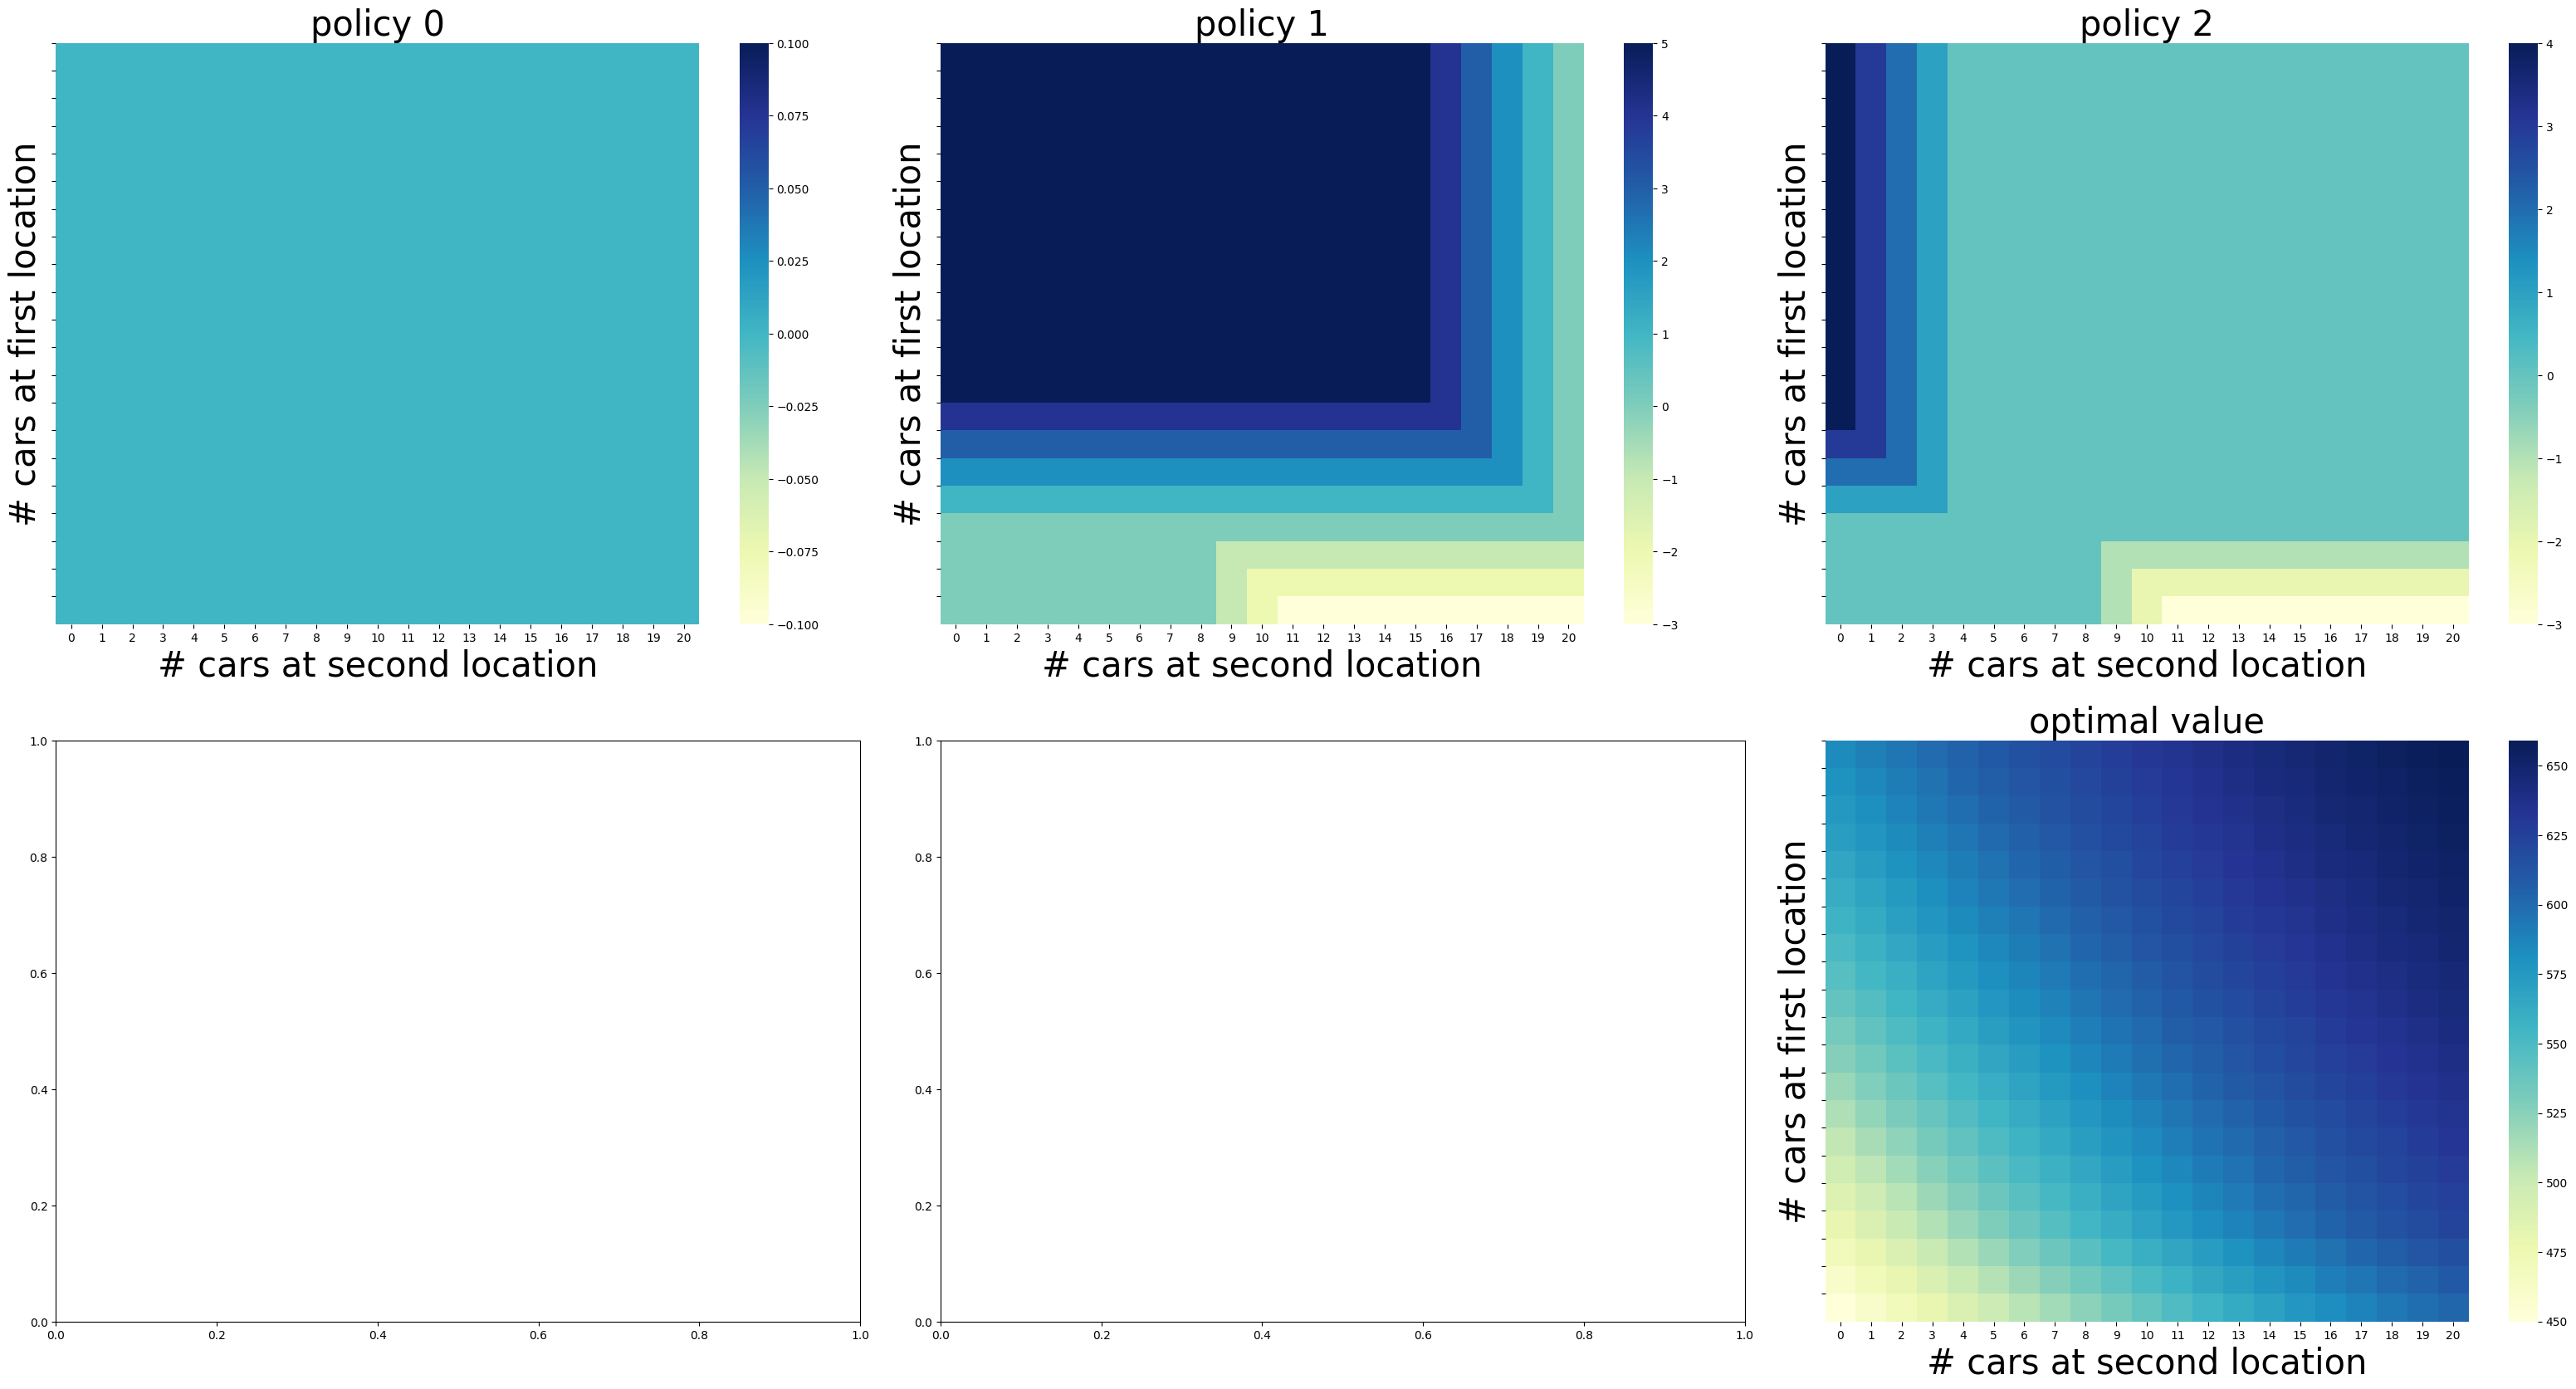

In [35]:
# 如果租车和还车数量，都是固定，才能收敛。
rental = c4.car_rental_m.JackRental(in_place=False, max_car_num=max_car_num, theta=1e-4, 
                                    constant_rent=True, constant_return=True, verbose=True)
v, pi = rental.run(fun=rental.expected_return_wrong) 

### exercise 4.7 


练习4.7（编程）杰克汽车出租问题出现了如下变化，编写一个策略迭代程序解决它。

- 杰克第一个网点的一个员工每晚乘公共汽车回家，而且家就在第二个网点的附近。她希望能免费搭一辆车到第二个网点。每一次转移车辆还是需要花费 2 美元。
- 杰克每个网点停车位有限。如果超过10个的话，多出的车辆必须停在第二个停车场，而这需要额外话费 4 美元（无论多少辆车）。

在现实问题中，经常会有像这样的非线性和有些随意的需求。除了动态规划（dynamic programming），其他优化方法往往不容易解决。为了验证你的程序，首先复现一下原始问题的结果。

2023-03-10 01:30:00,480: INFO: after 10 iteration: max value change 20.18262117404106
2023-03-10 01:30:02,347: INFO: after 20 iteration: max value change 4.625852411120604
2023-03-10 01:30:04,235: INFO: after 30 iteration: max value change 0.9933278917516191
2023-03-10 01:30:06,121: INFO: after 40 iteration: max value change 0.20739982187330952
2023-03-10 01:30:08,001: INFO: after 50 iteration: max value change 0.04265863011210058
2023-03-10 01:30:09,910: INFO: after 60 iteration: max value change 0.008700678541003981
2023-03-10 01:30:11,756: INFO: after 70 iteration: max value change 0.0017660790119293779
2023-03-10 01:30:13,615: INFO: after 80 iteration: max value change 0.00035748603448837457
2023-03-10 01:30:16,938: INFO: policy stable False
2023-03-10 01:30:19,069: INFO: after 10 iteration: max value change 0.37818953552601897
2023-03-10 01:30:20,994: INFO: after 20 iteration: max value change 0.07062549257898354
2023-03-10 01:30:22,922: INFO: after 30 iteration: max value change 

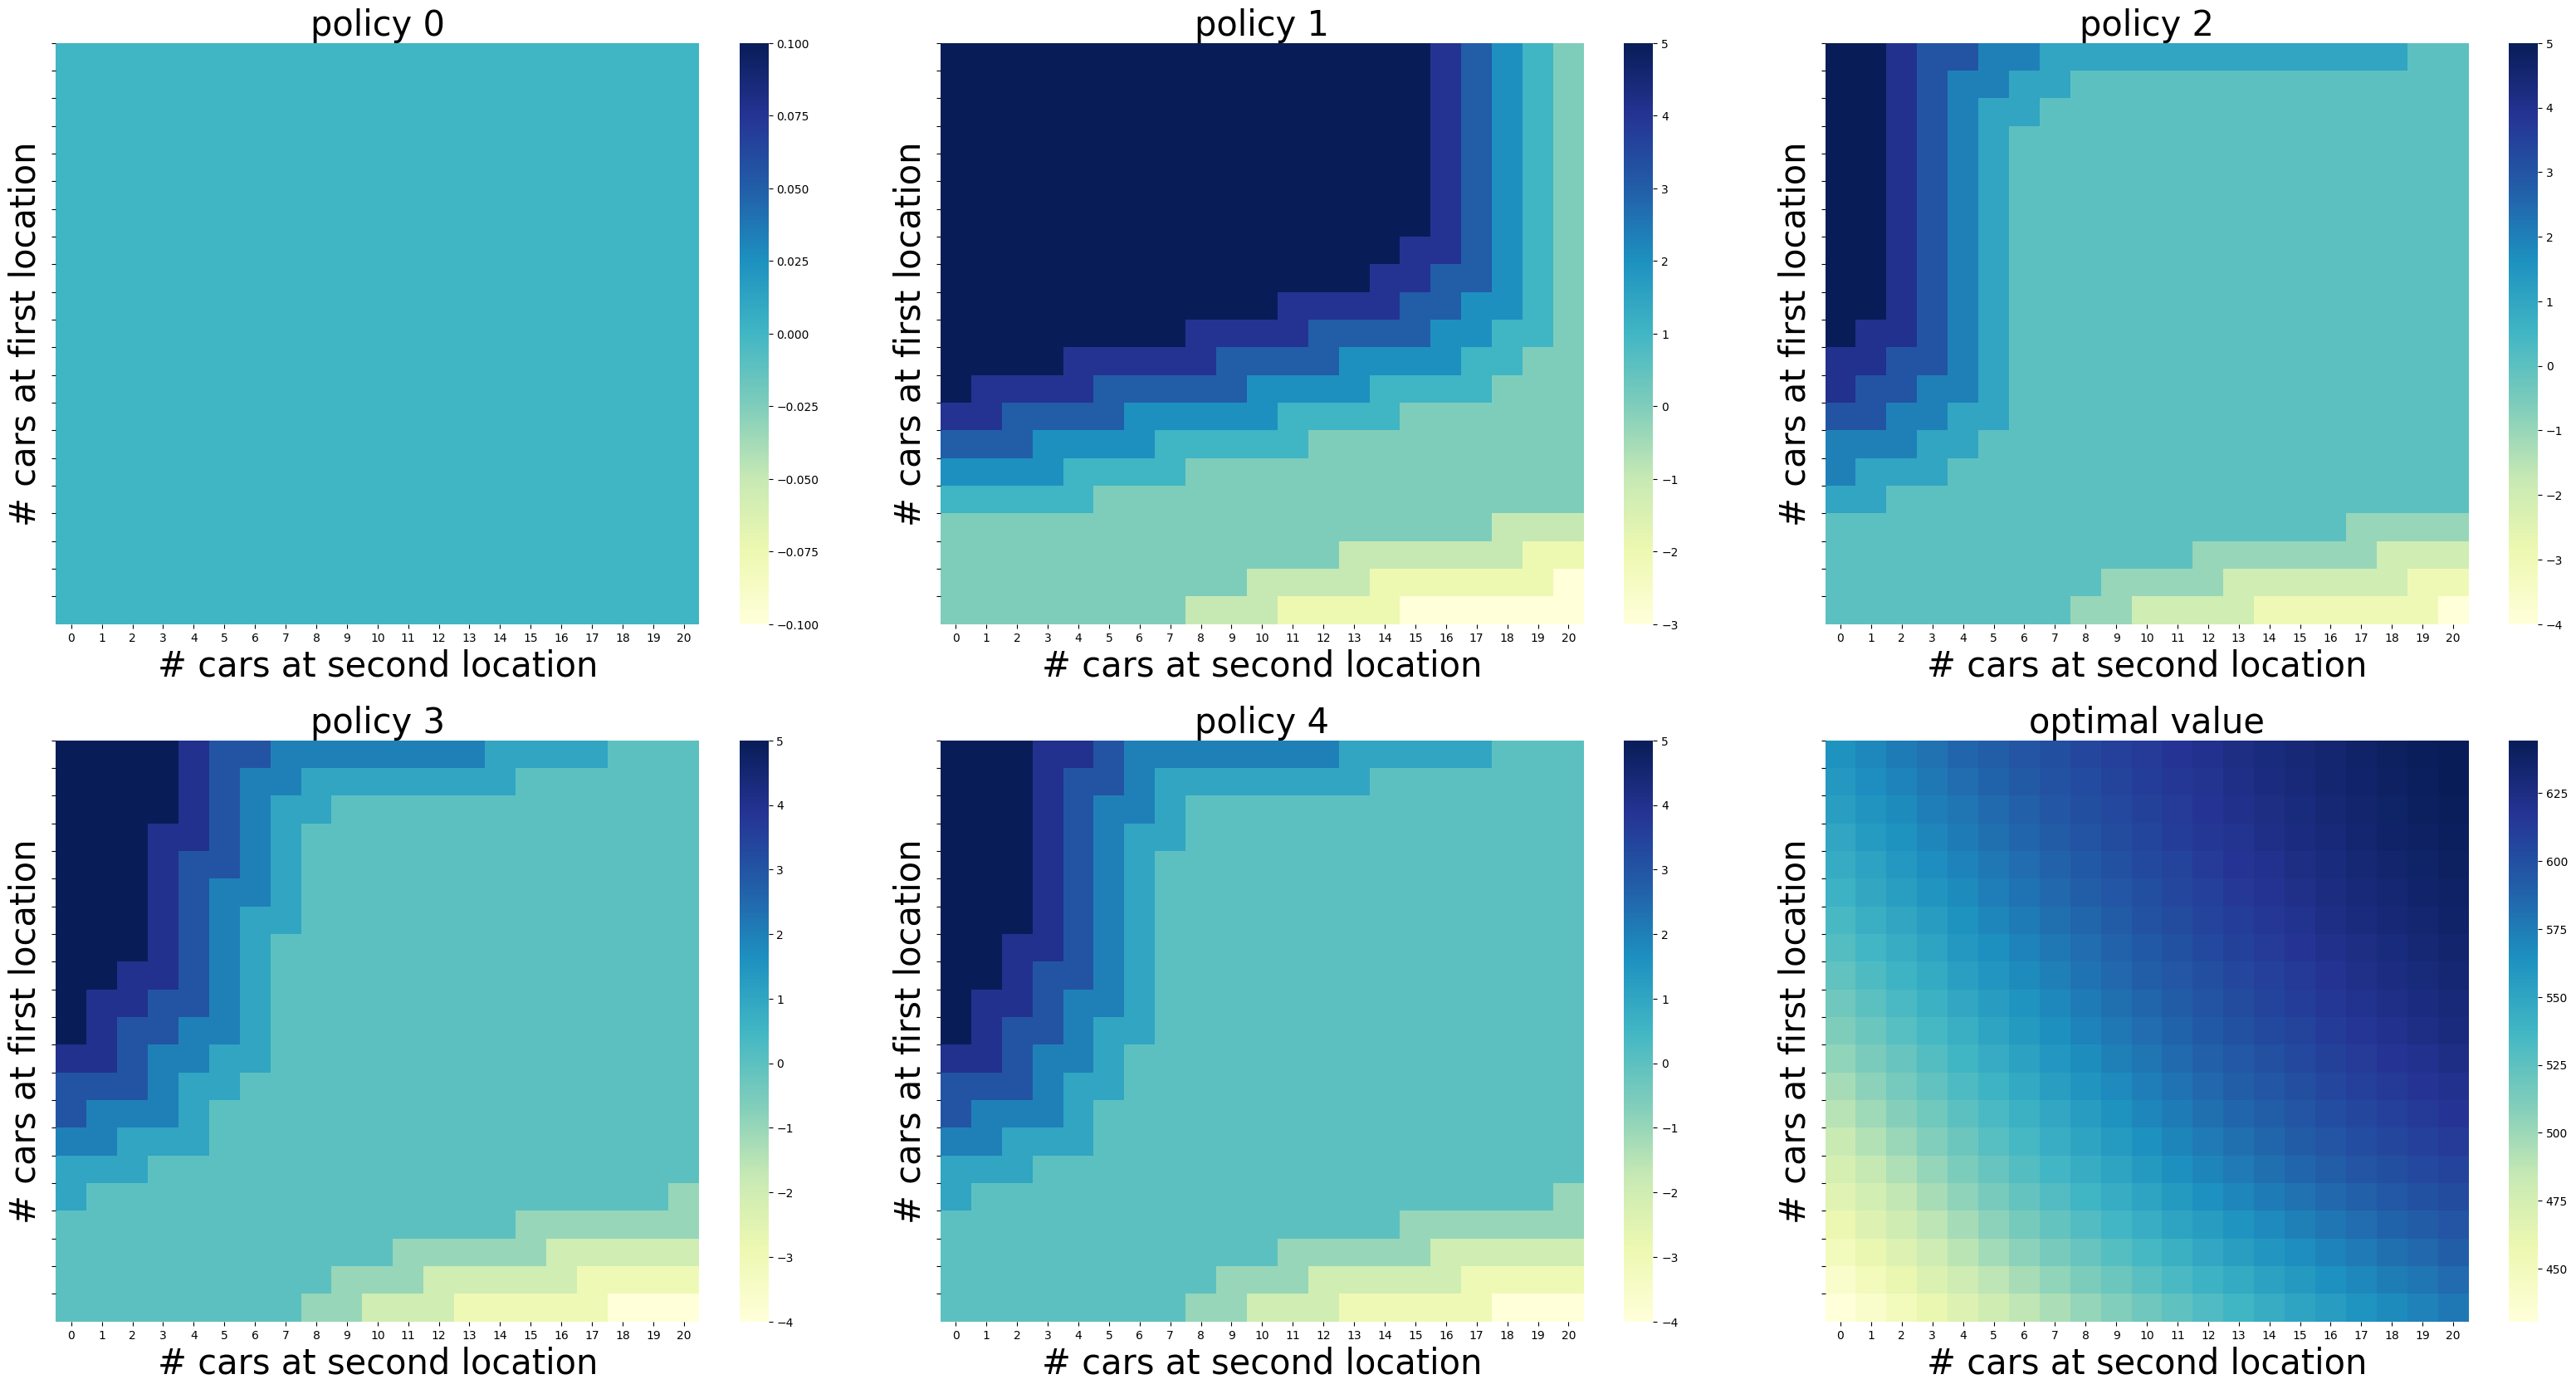

In [77]:
value, policy = c4.car_rental.figure_4_2(in_place=True, constant_returned_cars=True, show=True) 

2023-03-09 02:24:31,245: INFO: after 10 iteration: max value change 19.188365951596893
2023-03-09 02:24:32,923: INFO: after 20 iteration: max value change 4.121900770735351
2023-03-09 02:24:34,587: INFO: after 30 iteration: max value change 0.836392835832612
2023-03-09 02:24:36,232: INFO: after 40 iteration: max value change 0.16571901338255657
2023-03-09 02:24:37,881: INFO: after 50 iteration: max value change 0.03241521250549795
2023-03-09 02:24:39,522: INFO: after 60 iteration: max value change 0.006294594696839795
2023-03-09 02:24:41,155: INFO: after 70 iteration: max value change 0.0012172161611374577
2023-03-09 02:24:42,769: INFO: after 80 iteration: max value change 0.0002348063026715863
2023-03-09 02:24:45,288: INFO: policy stable False
2023-03-09 02:24:47,180: INFO: after 10 iteration: max value change 0.9298505730754414
2023-03-09 02:24:48,773: INFO: after 20 iteration: max value change 0.1917590783405103
2023-03-09 02:24:50,369: INFO: after 30 iteration: max value change 0.0

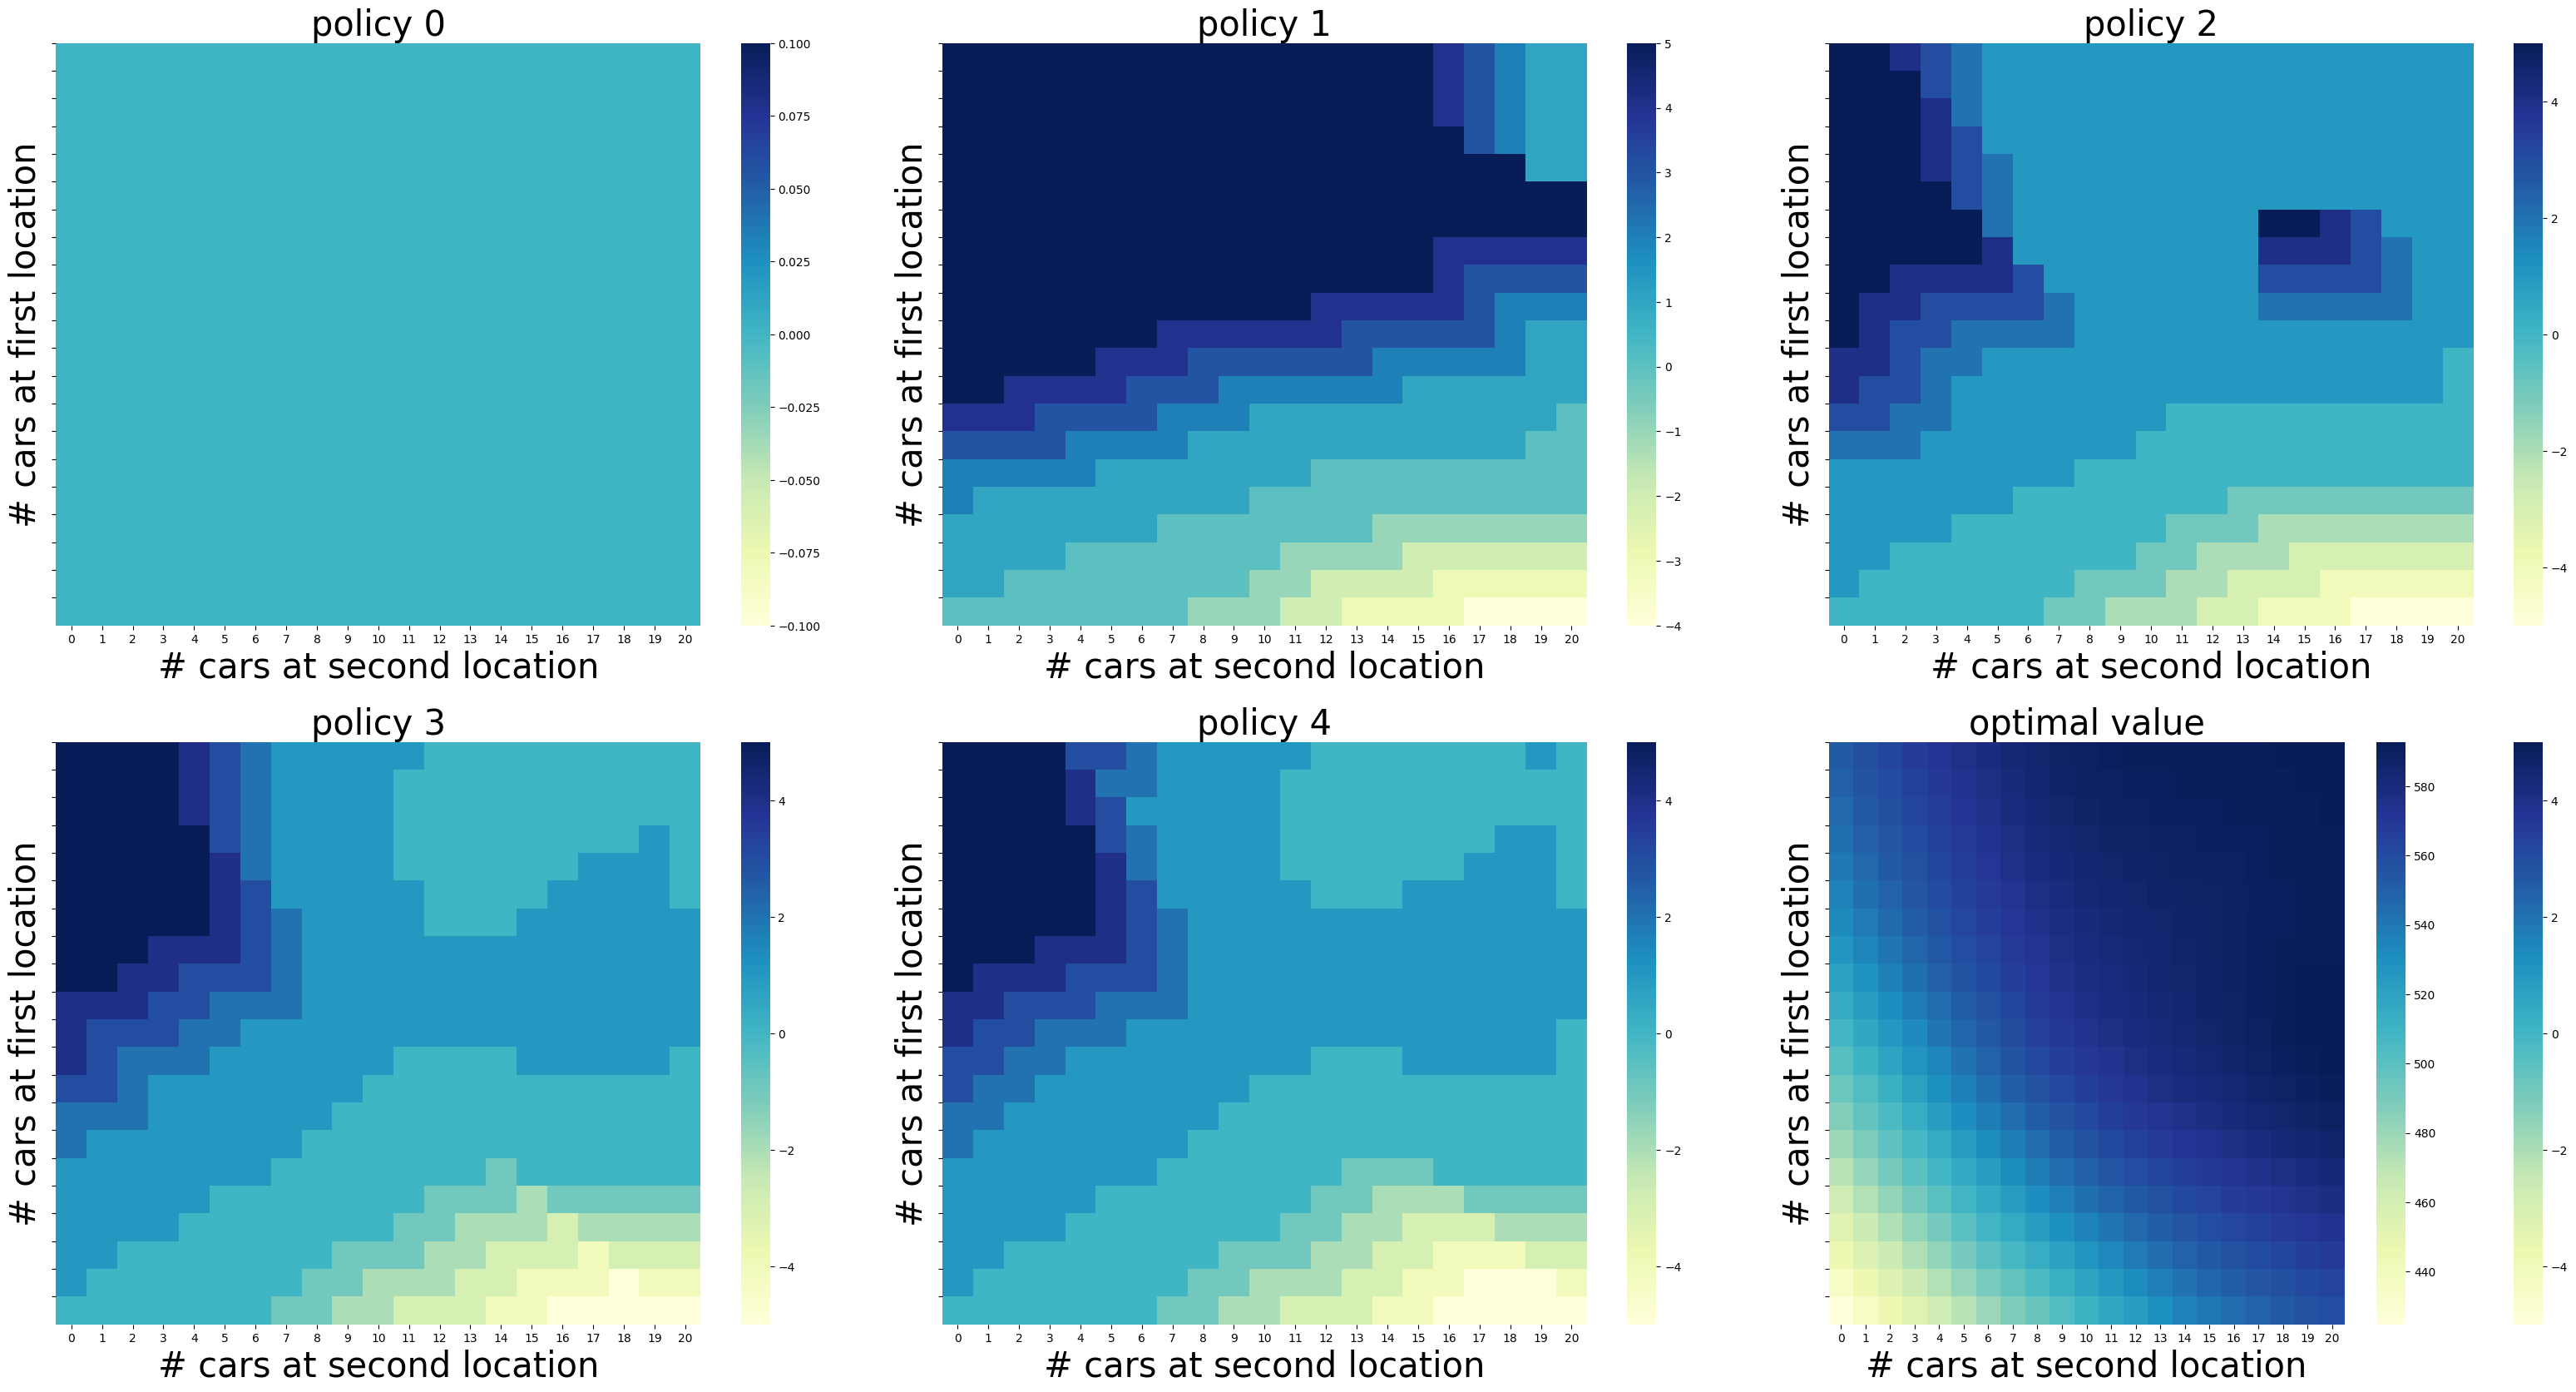

In [54]:
value, policy = c4.car_rental.exercise_4_7(in_place=True, constant_returned_cars=True, show=True) 

In [78]:
print(np.round(value[0:10, 0:10]))
print(policy)

[[431. 440. 450. 460. 469. 478. 487. 495. 503. 510.]
 [440. 450. 460. 470. 479. 488. 497. 505. 512. 519.]
 [450. 460. 470. 479. 489. 497. 506. 514. 521. 529.]
 [459. 468. 478. 488. 497. 506. 515. 523. 530. 537.]
 [466. 476. 486. 496. 505. 514. 522. 530. 538. 545.]
 [474. 484. 494. 503. 512. 521. 529. 537. 544. 551.]
 [482. 492. 501. 510. 519. 528. 536. 543. 551. 557.]
 [490. 499. 508. 517. 526. 534. 542. 549. 556. 563.]
 [497. 506. 515. 524. 532. 540. 547. 555. 561. 568.]
 [504. 513. 522. 530. 538. 545. 553. 560. 566. 573.]]
[[ 0  0  0  0  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4]
 [ 0  0  0  0  0  0  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2

## Test

In [38]:
rent_nums, rent_probs, last_nums, last_probs = c4.car_rental.compute_rental_return_probs(3, 3, 3, constant_returned_cars=True)
print(rent_nums)
print(rent_probs)
print(last_nums)
print(last_probs, np.sum(last_probs))

[0 1 2 3]
[0.04978707 0.14936121 0.22404181 0.57680992]
[6 5 4 3]
[0.04978707 0.14936121 0.22404181 0.57680992] 0.9999999999999999


In [39]:
rent_nums1, rent_probs1, last_nums1, last_probs1 = c4.car_rental.compute_rental_return_probs(3, 4, 2, constant_returned_cars=True)
print(rent_nums1)
print(rent_probs1)
print(last_nums1)
print(last_probs1, np.sum(last_probs1))
enumerate

[0 1 2 3]
[0.01831564 0.07326256 0.14652511 0.76189669]
[5 4 3 2]
[0.01831564 0.07326256 0.14652511 0.76189669] 0.9999999999999999


In [46]:
np.meshgrid(last_probs, last_probs1)

[array([[0.04978707, 0.14936121, 0.22404181, 0.57680992],
        [0.04978707, 0.14936121, 0.22404181, 0.57680992],
        [0.04978707, 0.14936121, 0.22404181, 0.57680992],
        [0.04978707, 0.14936121, 0.22404181, 0.57680992]]),
 array([[0.01831564, 0.01831564, 0.01831564, 0.01831564],
        [0.07326256, 0.07326256, 0.07326256, 0.07326256],
        [0.14652511, 0.14652511, 0.14652511, 0.14652511],
        [0.76189669, 0.76189669, 0.76189669, 0.76189669]])]

In [114]:
np.sum(np.array([7.43625653e-03, 2.23087696e-02, 3.34631544e-02, 3.34631544e-02,
               2.50973658e-02, 1.50584195e-02, 7.52920974e-03, 3.22680417e-03,
               1.21005156e-03, 4.03350522e-04, 1.21005156e-04, 3.30014063e-05,
               8.25035158e-06, 1.90392729e-06, 4.07984419e-07, 8.15968837e-08,
               1.52994157e-08, 2.69989689e-09, 5.33451253e-10]) ) 

0.14936120517723653

In [72]:
[poisson.pmf(i, 3) * i for i in range(initial_cars + 1) +  (1 - poisson.cdf(initial_cars, 3))]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [74]:
sum(poisson.pmf(i, 3) * i for i in range(initial_cars + 1))

2.9966925356096543

In [80]:
a = [poisson.pmf(i, 3) for i in range(initial_cars)] + [1- poisson.cdf(initial_cars-1, 3) ] 
a

[0.049787068367863944,
 0.14936120510359185,
 0.22404180765538775,
 0.22404180765538775,
 0.16803135574154085,
 0.10081881344492458,
 0.05040940672246224,
 0.02160403145248382,
 0.008101511794681432,
 0.002700503931560479,
 0.0011024881301154865]

In [81]:
np.sum(a)

1.0000000000000002

In [85]:
np.arrange(1, 10) 

AttributeError: module 'numpy' has no attribute 'arrange'

In [92]:
np.array([[1,2], [3,4]]).flatten()

array([1, 2, 3, 4])

In [95]:
[(i,j) for i in range(3) for j in range(2)]  

[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]

In [ ]:
compute_rental_return_reward